# Import Important Libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import psutil
import gc
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

gc.collect()
sns.set_style("darkgrid")

# Ignore Warnings

In [134]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
 
import warnings
warnings.filterwarnings(action='ignore')

# Import Dataset

In [135]:
TrainData = pd.read_csv('train_V2.csv')

# Group Data By Match Id

In [136]:
TrainData.groupby(['matchId']).mean()

assists    boosts  damageDealt     DBNOs  headshotKills  \
matchId                                                                    
0000a43bce5eec  0.357895  1.242105   142.523905  0.842105       0.178947   
0000eb01ea6cdd  0.265306  1.071429   134.407449  0.908163       0.265306   
0002912fe5ed71  0.031579  1.252632   112.595789  0.000000       0.263158   
0003b92987589e  0.220000  0.790000   112.365500  0.590000       0.210000   
0006eb8c17708d  0.236559  1.118280   134.813796  0.580645       0.215054   
...                  ...       ...          ...       ...            ...   
fffd74b5150cb4  0.216495  0.886598   140.800928  0.907216       0.195876   
fffe53015be300  0.030928  1.216495   119.394186  0.000000       0.226804   
fffe562611d981  0.234043  0.787234   120.448745  0.957447       0.265957   
fffe721f841f85  0.247423  0.701031   124.931804  0.536082       0.185567   
fffe92232706aa  0.258065  1.075269   125.176247  0.806452       0.193548   

                   heals  killPlace   killPoints     kills  killStreaks  ...  \
matchId                                                                  ...   
0000a43bce5eec  1.115789       48.0  1321.547368  0.947368     0.547368  ...   
0000eb01ea6cdd  1.122449       49.5     0.000000  0.969388     0.632653  ...   
0002912fe5ed71  1.389474       48.0     0.000000  0.894737     0.463158  ...   
0003b92987589e  0.820000       50.5     0.000000  0.950000     0.610000  ...   
0006eb8c17708d  1.494624       47.0  1224.139785  0.913978     0.559140  ...   
...                  ...        ...          ...       ...          ...  ...   
fffd74b5150cb4  1.195876       49.0  1341.226804  0.948454     0.556701  ...   
fffe53015be300  1.402062       49.0     0.000000  0.907216     0.463918  ...   
fffe562611d981  0.840426       47.5  1337.085106  0.936170     0.510638  ...   
fffe721f841f85  0.865979       49.0  1248.814433  0.958763     0.587629  ...   
fffe92232706aa  1.473118       47.0     0.000000  0.892473     0.537634  ...   

                 revives  rideDistance  roadKills  swimDistance  teamKills  \
matchId                                                                      
0000a43bce5eec  0.157895     92.631226   0.000000      3.761547   0.010526   
0000eb01ea6cdd  0.214286     81.256799   0.000000      5.538724   0.000000   
0002912fe5ed71  0.000000   1564.827368   0.021053     10.081642   0.021053   
0003b92987589e  0.110000     87.221000   0.000000     13.279286   0.010000   
0006eb8c17708d  0.129032    223.770240   0.000000      6.172333   0.000000   
...                  ...           ...        ...           ...        ...   
fffd74b5150cb4  0.216495     32.948351   0.000000      5.425680   0.010309   
fffe53015be300  0.000000    668.110324   0.000000      5.238557   0.010309   
fffe562611d981  0.255319    114.039362   0.000000      0.331755   0.000000   
fffe721f841f85  0.061856     59.542165   0.010309      0.770309   0.000000   
fffe92232706aa  0.172043   1172.373441   0.021505      3.164527   0.021505   

                vehicleDestroys  walkDistance  weaponsAcquired    winPoints  \
matchId                                                                       
0000a43bce5eec         0.021053   1253.503021         3.073684  1490.631579   
0000eb01ea6cdd         0.000000   1082.208704         3.448980     0.000000   
0002912fe5ed71         0.031579   1218.072305         4.031579     0.000000   
0003b92987589e         0.000000    973.116800         3.230000     0.000000   
0006eb8c17708d         0.000000    958.819140         3.387097  1509.225806   
...                         ...           ...              ...          ...   
fffd74b5150cb4         0.000000    832.719856         3.216495  1515.680412   
fffe53015be300         0.000000   1287.287474         4.092784     0.000000   
fffe562611d981         0.000000    823.668011         3.351064  1520.010638   
fffe721f841f85         0.000000   1093.615948         3.577320  1515.711340   
fffe92232706aa         0

# Dataset Information

In [137]:
TrainData.shape

(4446966, 29)

In [138]:
TrainData.head()

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0         0.00      0              0      0         60  ...        0   
1        91.47      0              0      0         57  ...        0   
2        68.00      0              0      0         47  ...        0   
3        32.90      0              0      0         75  ...        0   
4       100.00      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0        0.0000          0          0.00          0               0   
1        0.0045          0         11.04          0               0   
2        0.0000          0          0.00          0               0   
3        0.0000          0          0.00          0               0   
4        0.0000          0          0.00          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0        244.80                1       1466        0.4444  
1       1434.00                5          0        0.6400  
2        161.80                2          0        0.7755  
3        202.70                3          0        0.1667  
4         49.75                2          0        0.1875  

[5 rows x 29 columns]

In [139]:
TrainData.tail()

Id         groupId         matchId  assists  boosts  \
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
4446961         0.00      0              0      0         74  ...        0   
4446962        44.15      0              0      0         69  ...        0   
4446963        59.06      0              0      0         66  ...        0   
4446964       180.40      1              1      2         11  ...        2   
4446965       268.00      0              0      1         18  ...        0   

         rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
4446961        1292.0          0         0.000          0               0   
4446962           0.0          0         0.000          0               0   
4446963           0.0          0         2.184          0               0   
4446964           0.0          0         0.000          0               0   
4446965        1369.0          0         0.000          0               0   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
4446961        1019.0                3       1507        0.1786  
4446962          81.7                6          0        0.2935  
4446963         788.7                4          0        0.4815  
4446964        2748.0                8          0        0.8000  
4446965        1244.0                5          0        0.5464  

[5 rows x 29 columns]

In [140]:
TrainData.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [141]:
# Memory Optimization
for column in TrainData:
 if TrainData[column].dtype == 'float64':
    TrainData[column]=pd.to_numeric(TrainData[column], downcast='float')
 if TrainData[column].dtype == 'int64':
    TrainData[column]=pd.to_numeric(TrainData[column], downcast='integer')

In [142]:
TrainData.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float32
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float32
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float32
 21  roadKills        int8   
 22  swimDistance     float32
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float32
 26  weaponsAcquired  int16  
 27  winPoints   

In [143]:
TrainData.describe().T

count         mean          std  min          25%  \
assists          4446966.0     0.233815     0.588573  0.0     0.000000   
boosts           4446966.0     1.106908     1.715794  0.0     0.000000   
damageDealt      4446966.0   130.717194   170.780624  0.0     0.000000   
DBNOs            4446966.0     0.657876     1.145743  0.0     0.000000   
headshotKills    4446966.0     0.226820     0.602155  0.0     0.000000   
heals            4446966.0     1.370147     2.679982  0.0     0.000000   
killPlace        4446966.0    47.599350    27.462937  1.0    24.000000   
killPoints       4446966.0   505.006042   627.504896  0.0     0.000000   
kills            4446966.0     0.924783     1.558445  0.0     0.000000   
killStreaks      4446966.0     0.543955     0.710972  0.0     0.000000   
longestKill      4446966.0    22.997599    50.972622  0.0     0.000000   
matchDuration    4446966.0  1579.506440   258.739856  9.0  1367.000000   
maxPlace         4446966.0    44.504670    23.828105  1.0    28.000000   
numGroups        4446966.0    43.007593    23.289495  1.0    27.000000   
rankPoints       4446966.0   892.010457   736.647779 -1.0    -1.000000   
revives          4446966.0     0.164659     0.472167  0.0     0.000000   
rideDistance     4446966.0   606.115967  1498.343506  0.0     0.000000   
roadKills        4446966.0     0.003496     0.073373  0.0     0.000000   
swimDistance     4446966.0     4.509323    30.502199  0.0     0.000000   
teamKills        4446966.0     0.023868     0.167394  0.0     0.000000   
vehicleDestroys  4446966.0     0.007918     0.092612  0.0     0.000000   
walkDistance     4446966.0  1154.217651  1183.497070  0.0   155.100006   
weaponsAcquired  4446966.0     3.660488     2.456544  0.0     2.000000   
winPoints        4446966.0   606.460131   739.700444  0.0     0.000000   
winPlacePerc     4446965.0     0.472822     0.307405  0.0     0.200000   

                         50%          75%      max  
assists             0.000000     0.000000     22.0  
boosts              0.000000     2.000000     33.0  
damageDealt        84.239998   186.000000   6616.0  
DBNOs               0.000000     1.000000     53.0  
headshotKills       0.000000     0.000000     64.0  
heals               0.000000     2.000000     80.0  
killPlace          47.000000    71.000000    101.0  
killPoints          0.000000  1172.000000   2170.0  
kills               0.000000     1.000000     72.0  
killStreaks         0.000000     1.000000     20.0  
longestKill         0.000000    21.320000   1094.0  
matchDuration    1438.000000  1851.000000   2237.0  
maxPlace           30.000000    49.000000    100.0  
numGroups          30.000000    47.000000    100.0  
rankPoints       1443.000000  1500.000000   5910.0  
revives             0.000000     0.000000     39.0  
rideDistance        0.000000     0.190975  40710.0  
roadKills           0.000000     0.000000     18.0  
swimDistance        0.000000     0.000000   3823.0  
teamKills           0.000000     0.000000     12.0  
vehicleDestroys     0.000000     0.000000      5.0  
walkDistance      685.599976  1976.000000  25780.0  
weaponsAcquired     3.000000     5.000000    236.0  
winPoints           0.000000  1495.000000   2013.0  
winPlacePerc        0.458300     0.740700      1.0

In [144]:
TrainData.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [145]:
TrainData.nunique()

Id                 4446966
groupId            2026745
matchId              47965
assists                 20
boosts                  27
damageDealt          29916
DBNOs                   39
headshotKills           34
heals                   63
killPlace              101
killPoints            1707
kills                   58
killStreaks             18
longestKill          28284
matchDuration         1267
matchType               16
maxPlace               100
numGroups              100
rankPoints            2262
revives                 25
rideDistance         33562
roadKills               14
swimDistance         28345
teamKills               11
vehicleDestroys          6
walkDistance         38599
weaponsAcquired         97
winPoints             1447
winPlacePerc          3000
dtype: int64

# Data Correlation

In [146]:
TrainData.corr().abs()

assists    boosts  damageDealt     DBNOs  headshotKills  \
assists          1.000000  0.307683     0.406726  0.301057       0.198289   
boosts           0.307683  1.000000     0.521947  0.358907       0.334661   
damageDealt      0.406726  0.521947     1.000000  0.735763       0.613409   
DBNOs            0.301057  0.358907     0.735763  1.000000       0.469923   
headshotKills    0.198289  0.334661     0.613409  0.469923       1.000000   
heals            0.228556  0.535854     0.342987  0.265485       0.199918   
killPlace        0.290062  0.554844     0.677398  0.555289       0.469829   
killPoints       0.039066  0.008347     0.049904  0.042616       0.023988   
kills            0.319690  0.502024     0.888783  0.707848       0.674275   
killStreaks      0.243471  0.405327     0.703599  0.646872       0.512882   
longestKill      0.261425  0.423290     0.563837  0.451422       0.447261   
matchDuration    0.019450  0.072108     0.006755  0.014485       0.017657   
maxPlace         0.147916  0.013686     0.040707  0.267709       0.009211   
numGroups        0.146804  0.012929     0.040078  0.265788       0.009389   
rankPoints       0.016407  0.023202     0.001460  0.003451       0.005118   
revives          0.198320  0.253125     0.256951  0.300999       0.150145   
rideDistance     0.110644  0.328855     0.140883  0.102537       0.076495   
roadKills        0.011903  0.035124     0.052487  0.036093       0.013369   
swimDistance     0.023372  0.107993     0.036729  0.017320       0.028531   
teamKills        0.006081  0.013068     0.015468  0.069430       0.008658   
vehicleDestroys  0.057921  0.087387     0.081182  0.060210       0.039200   
walkDistance     0.290306  0.640150     0.398199  0.284660       0.250982   
weaponsAcquired  0.243882  0.406609     0.353249  0.218161       0.217552   
winPoints        0.024014  0.007644     0.017762  0.011108       0.004982   
winPlacePerc     0.299441  0.634234     0.440507  0.279970       0.277722   

                    heals  killPlace  killPoints     kills  killStreaks  ...  \
assists          0.228556   0.290062    0.039066  0.319690     0.243471  ...   
boosts           0.535854   0.554844    0.008347  0.502024     0.405327  ...   
damageDealt      0.342987   0.677398    0.049904  0.888783     0.703599  ...   
DBNOs            0.265485   0.555289    0.042616  0.707848     0.646872  ...   
headshotKills    0.199918   0.469829    0.023988  0.674275     0.512882  ...   
heals            1.000000   0.386032    0.002585  0.311781     0.270412  ...   
killPlace        0.386032   1.000000    0.023277  0.730498     0.810516  ...   
killPoints       0.002585   0.023277    1.000000  0.036192     0.037091  ...   
kills            0.311781   0.730498    0.036192  1.000000     0.802500  ...   
killStreaks      0.270412   0.810516    0.037091  0.802500     1.000000  ...   
longestKill      0.263278   0.541146    0.014084  0.602936     0.515097  ...   
matchDuration    0.108901   0.005804    0.099540  0.030687     0.034644  ...   
maxPlace         0.064759   0.016792    0.044802  0.004847     0.037338  ...   
numGroups        0.064204   0.018786    0.042366  0.004060     0.036054  ...   
rankPoints       0.019142   0.014805    0.975555  0.008199     0.003426  ...   
revives          0.236680   0.269804    0.012041  0.253323     0.241695  ...   
rideDistance     0.297484   0.236202    0.029316  0.114750     0.098420  ...   
roadKills        0.024619   0.057356    0.004156  0.063651     0.065575  ...   
swimDistance     0.079587   0.089396    0.004604  0.039127     0.034588  ...   
teamKills        0.035386   0.037797    0.039739  0.017601     0.027612  ...   
vehicleDestroys  0.062870   0.073569    0.009658  0.079991     0.064374  ...   
walkDistance     0.430266   0.590236    0.004630  0.374774     0.327639  ...   
weaponsAcquired  0.309071   0.490143    0.003978  0.336414     0.275373  ...   
winPoints        0.010990   0.002415    0.983417  0.006929     0.008552  ...   
winPlacePerc   

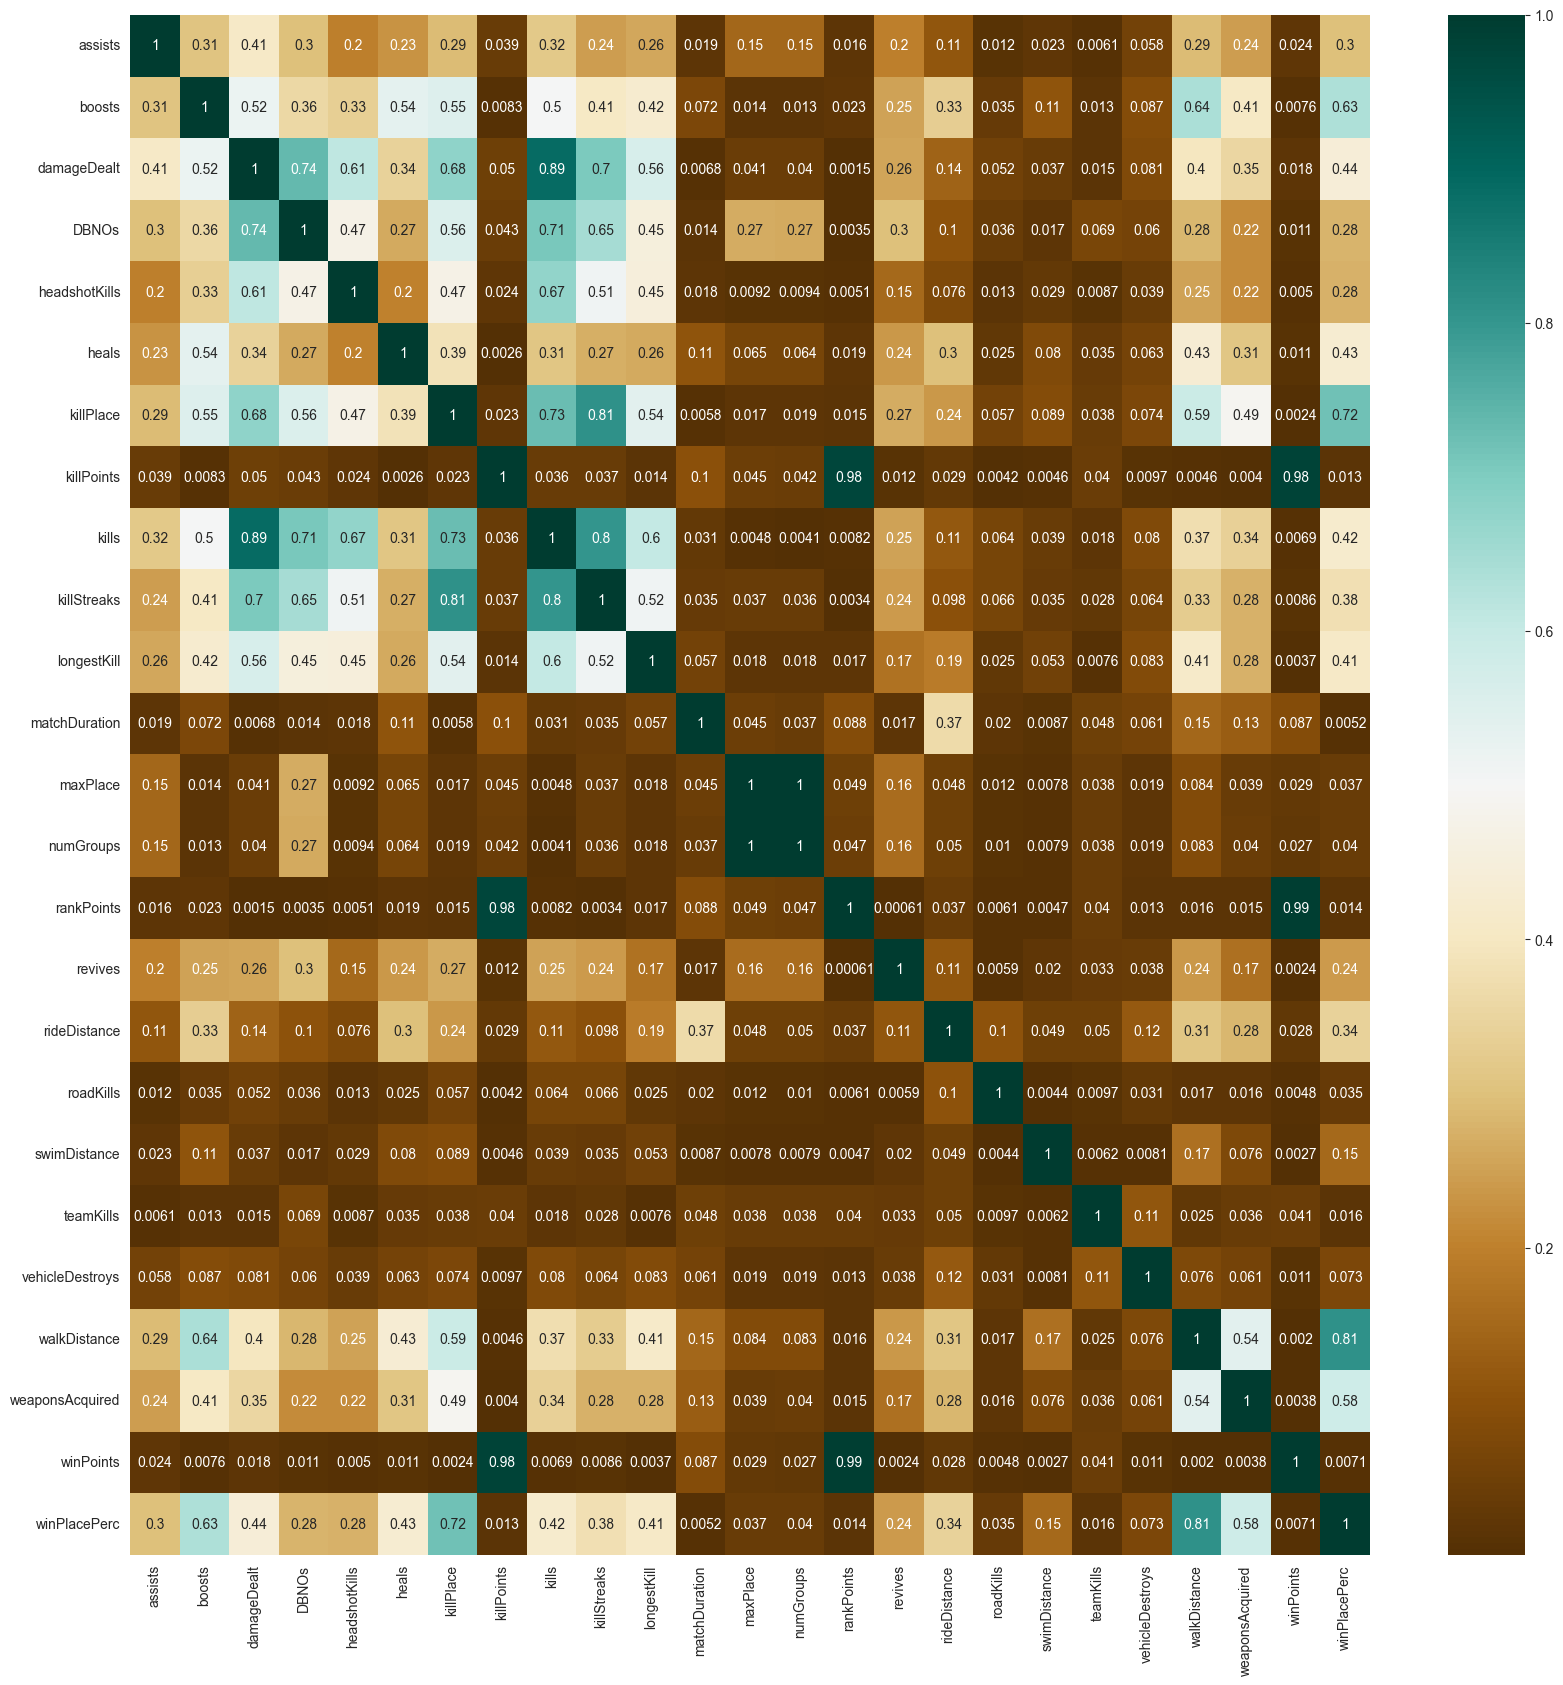

In [147]:
# Colerration Matrix
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(TrainData.corr().abs(),annot=True, cmap="BrBG", ax=ax);

# Dealing With Missing Values

In [148]:
TrainData.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [149]:
TrainData.dropna(inplace=True)

# Detect Duplicated Data

In [150]:
TrainData.duplicated().sum()

0

# Stripplot

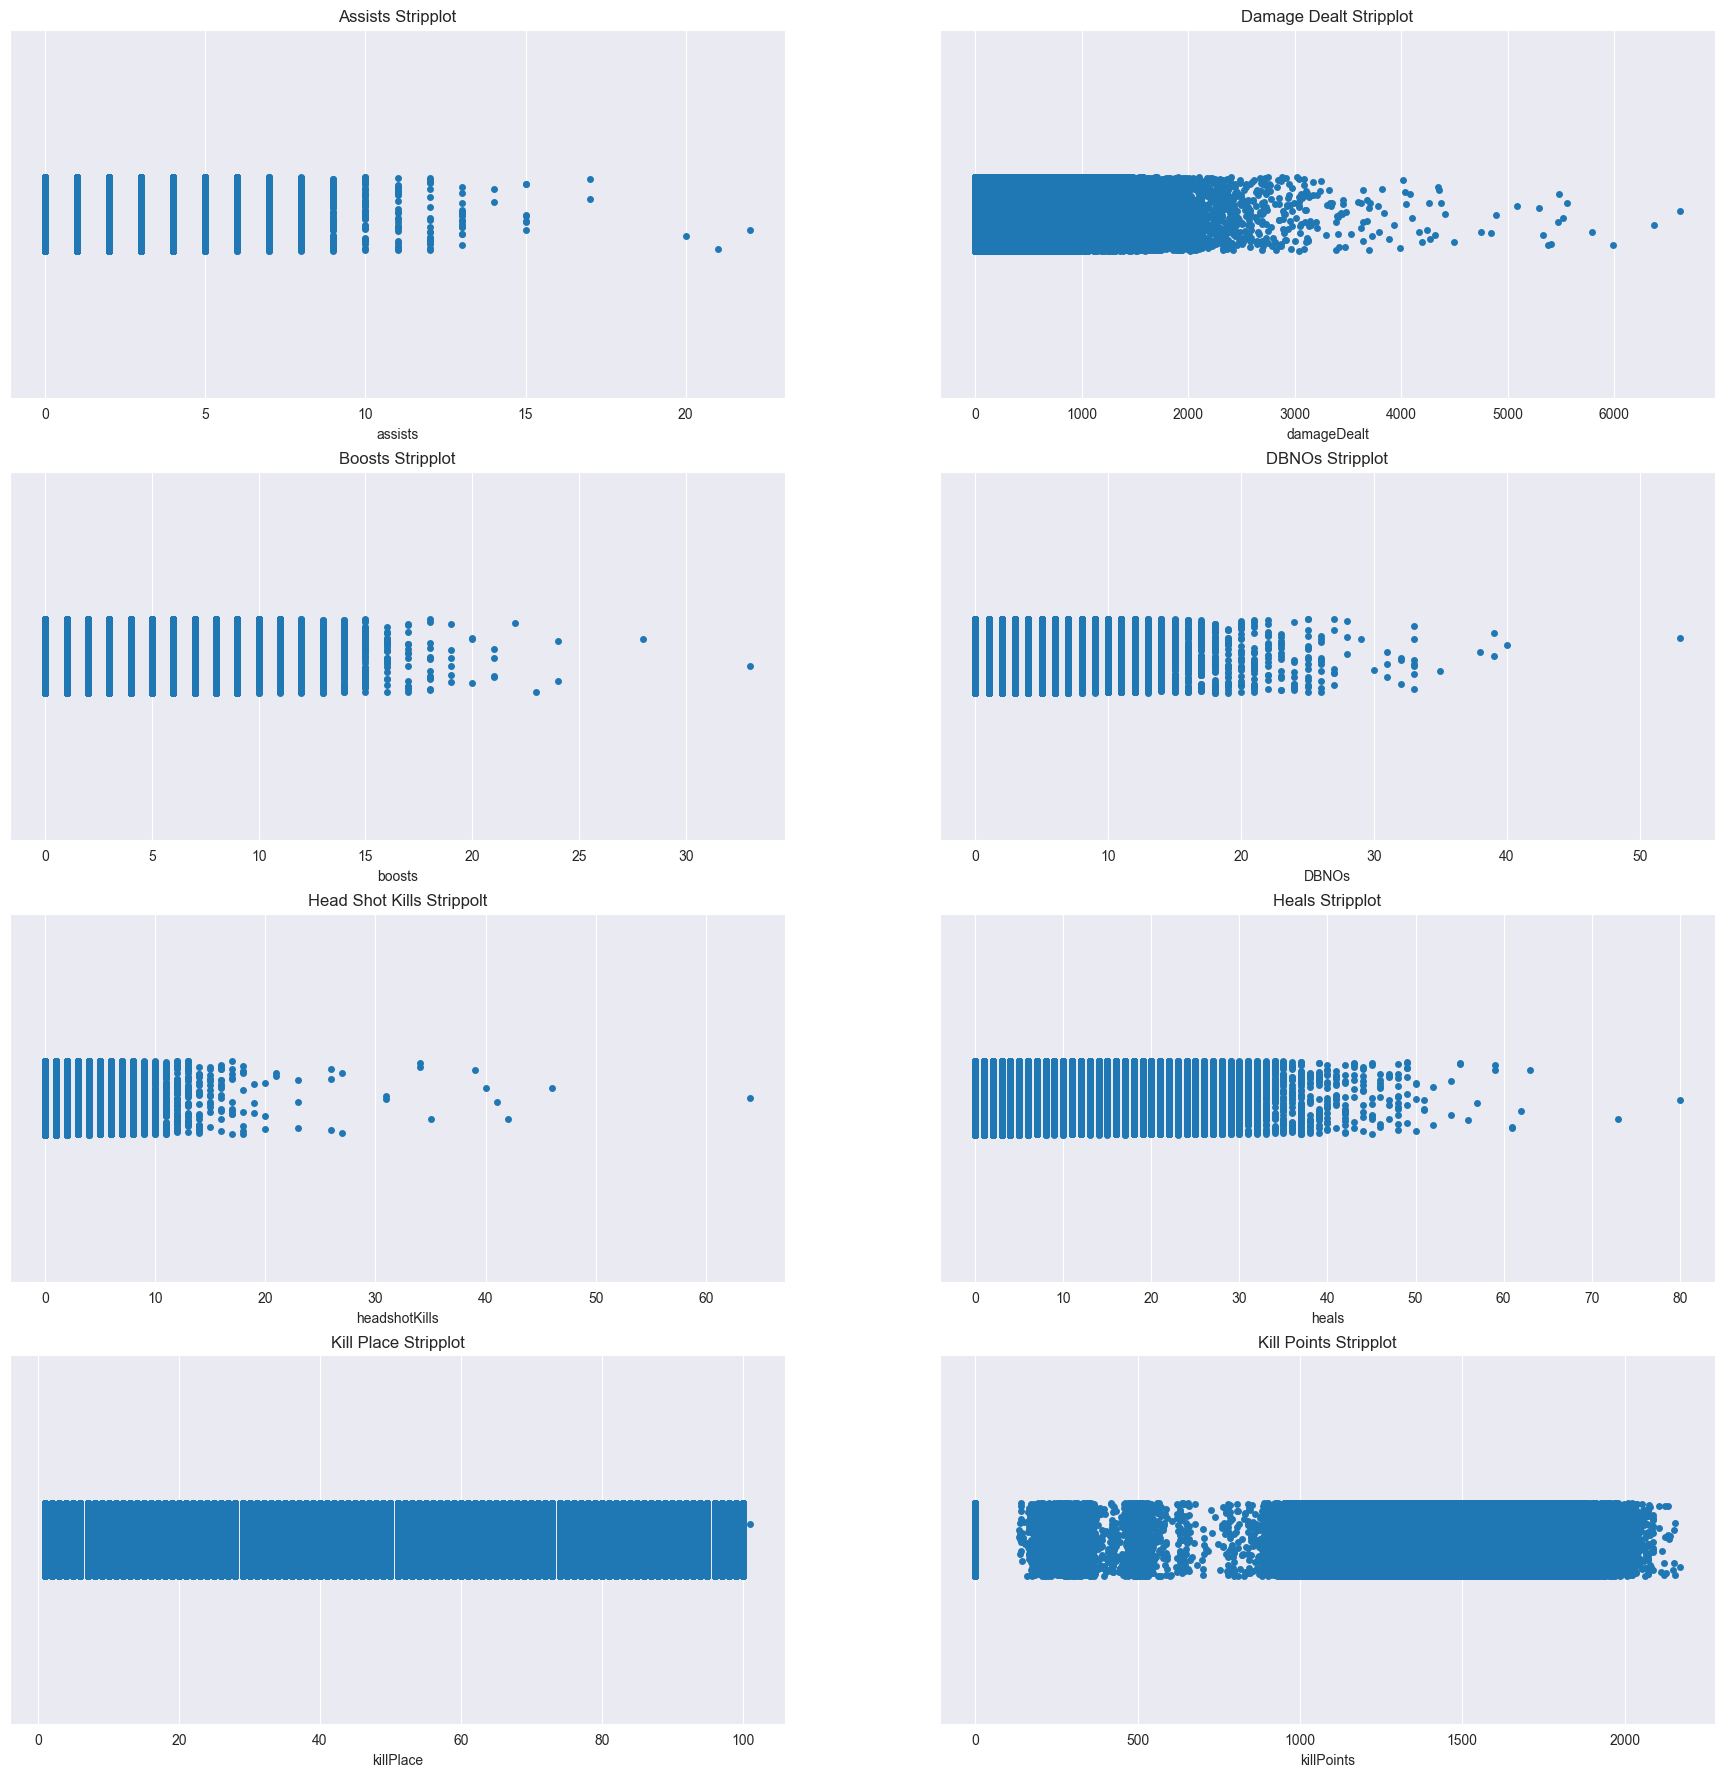

In [151]:
fig,((ax1, ax2), (ax3, ax4), (ax5, ax6),(ax7, ax8))= plt.subplots(ncols=2, nrows=4, figsize=(22,22))

sns.stripplot(data=TrainData, x='assists', ax=ax1).set_title("Assists Stripplot");

sns.stripplot(data=TrainData, x= 'damageDealt', ax=ax2).set_title("Damage Dealt Stripplot");

sns.stripplot(data= TrainData, x= 'boosts', ax=ax3).set_title('Boosts Stripplot');

sns.stripplot(data=TrainData, x='DBNOs', ax=ax4).set_title('DBNOs Stripplot');

sns.stripplot(data=TrainData, x='headshotKills', ax=ax5).set_title('Head Shot Kills Strippolt');

sns.stripplot(data= TrainData, x='heals', ax=ax6).set_title('Heals Stripplot');

sns.stripplot(data=TrainData, x='killPlace', ax=ax7).set_title('Kill Place Stripplot');

sns.stripplot(data=TrainData, x='killPoints', ax=ax8).set_title('Kill Points Stripplot');

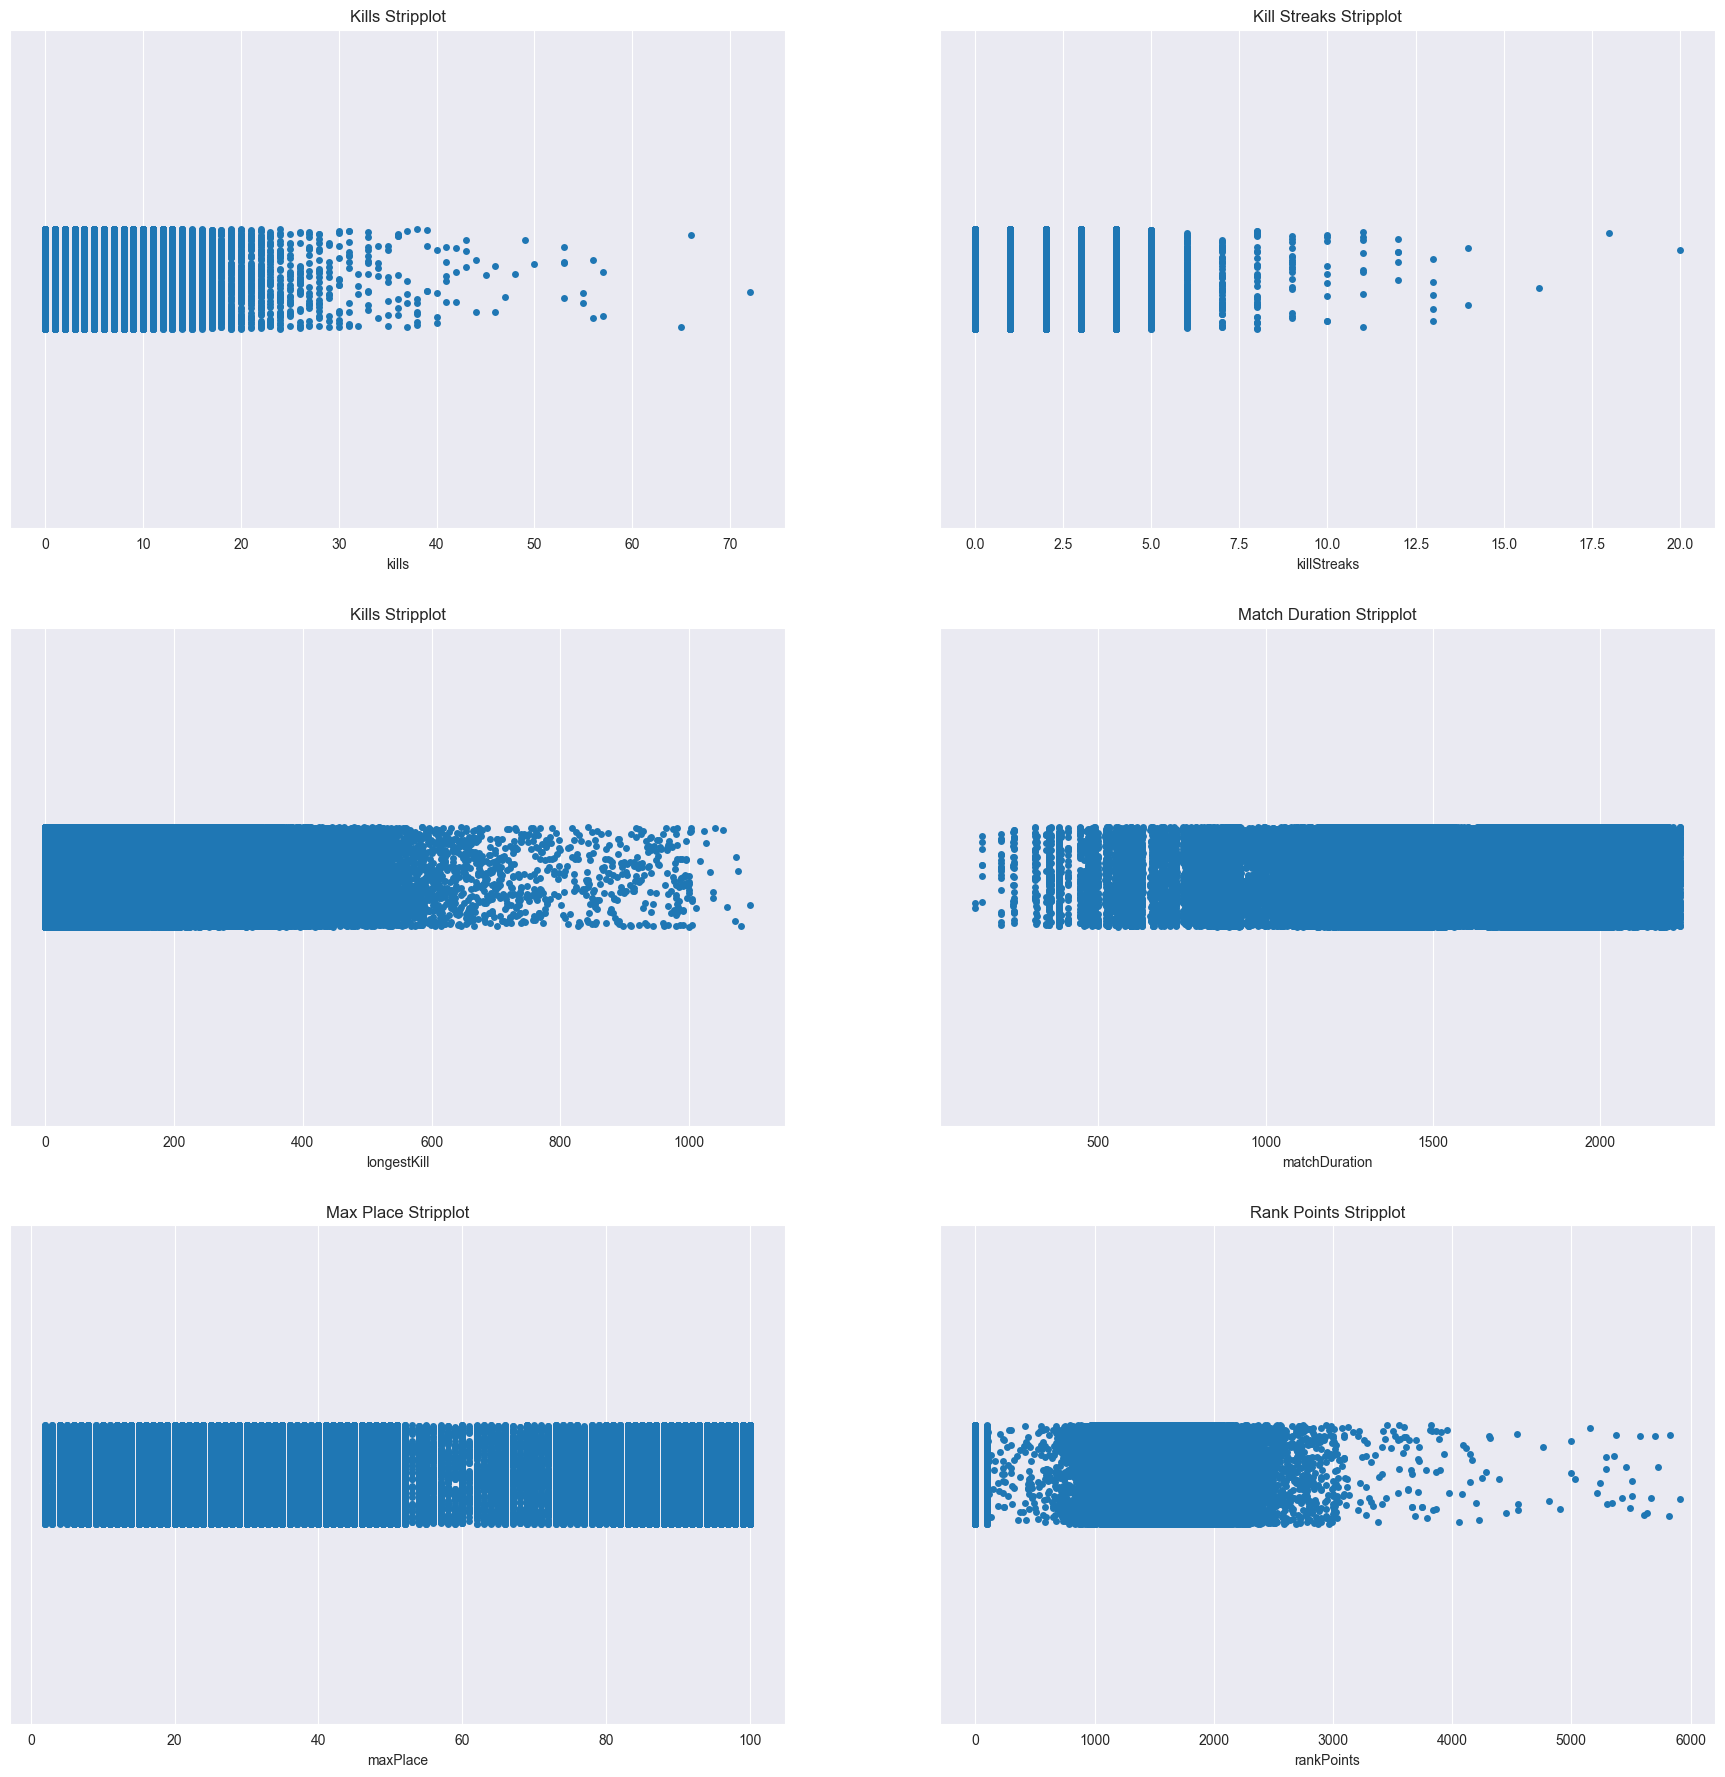

In [152]:
fig,((ax9, ax10),(ax11, ax12),(ax13, ax14))= plt.subplots(ncols=2, nrows=3, figsize=(22, 22))

sns.stripplot(data=TrainData, x='kills', ax=ax9).set_title('Kills Stripplot');

sns.stripplot(data=TrainData, x='killStreaks', ax=ax10).set_title('Kill Streaks Stripplot');

sns.stripplot(data=TrainData, x = 'longestKill', ax=ax11).set_title('Kills Stripplot');

sns.stripplot(data=TrainData, x='matchDuration', ax=ax12).set_title('Match Duration Stripplot');

sns.stripplot(data=TrainData, x = 'maxPlace', ax=ax13).set_title('Max Place Stripplot');

sns.stripplot(data=TrainData, x= 'rankPoints', ax=ax14).set_title('Rank Points Stripplot');

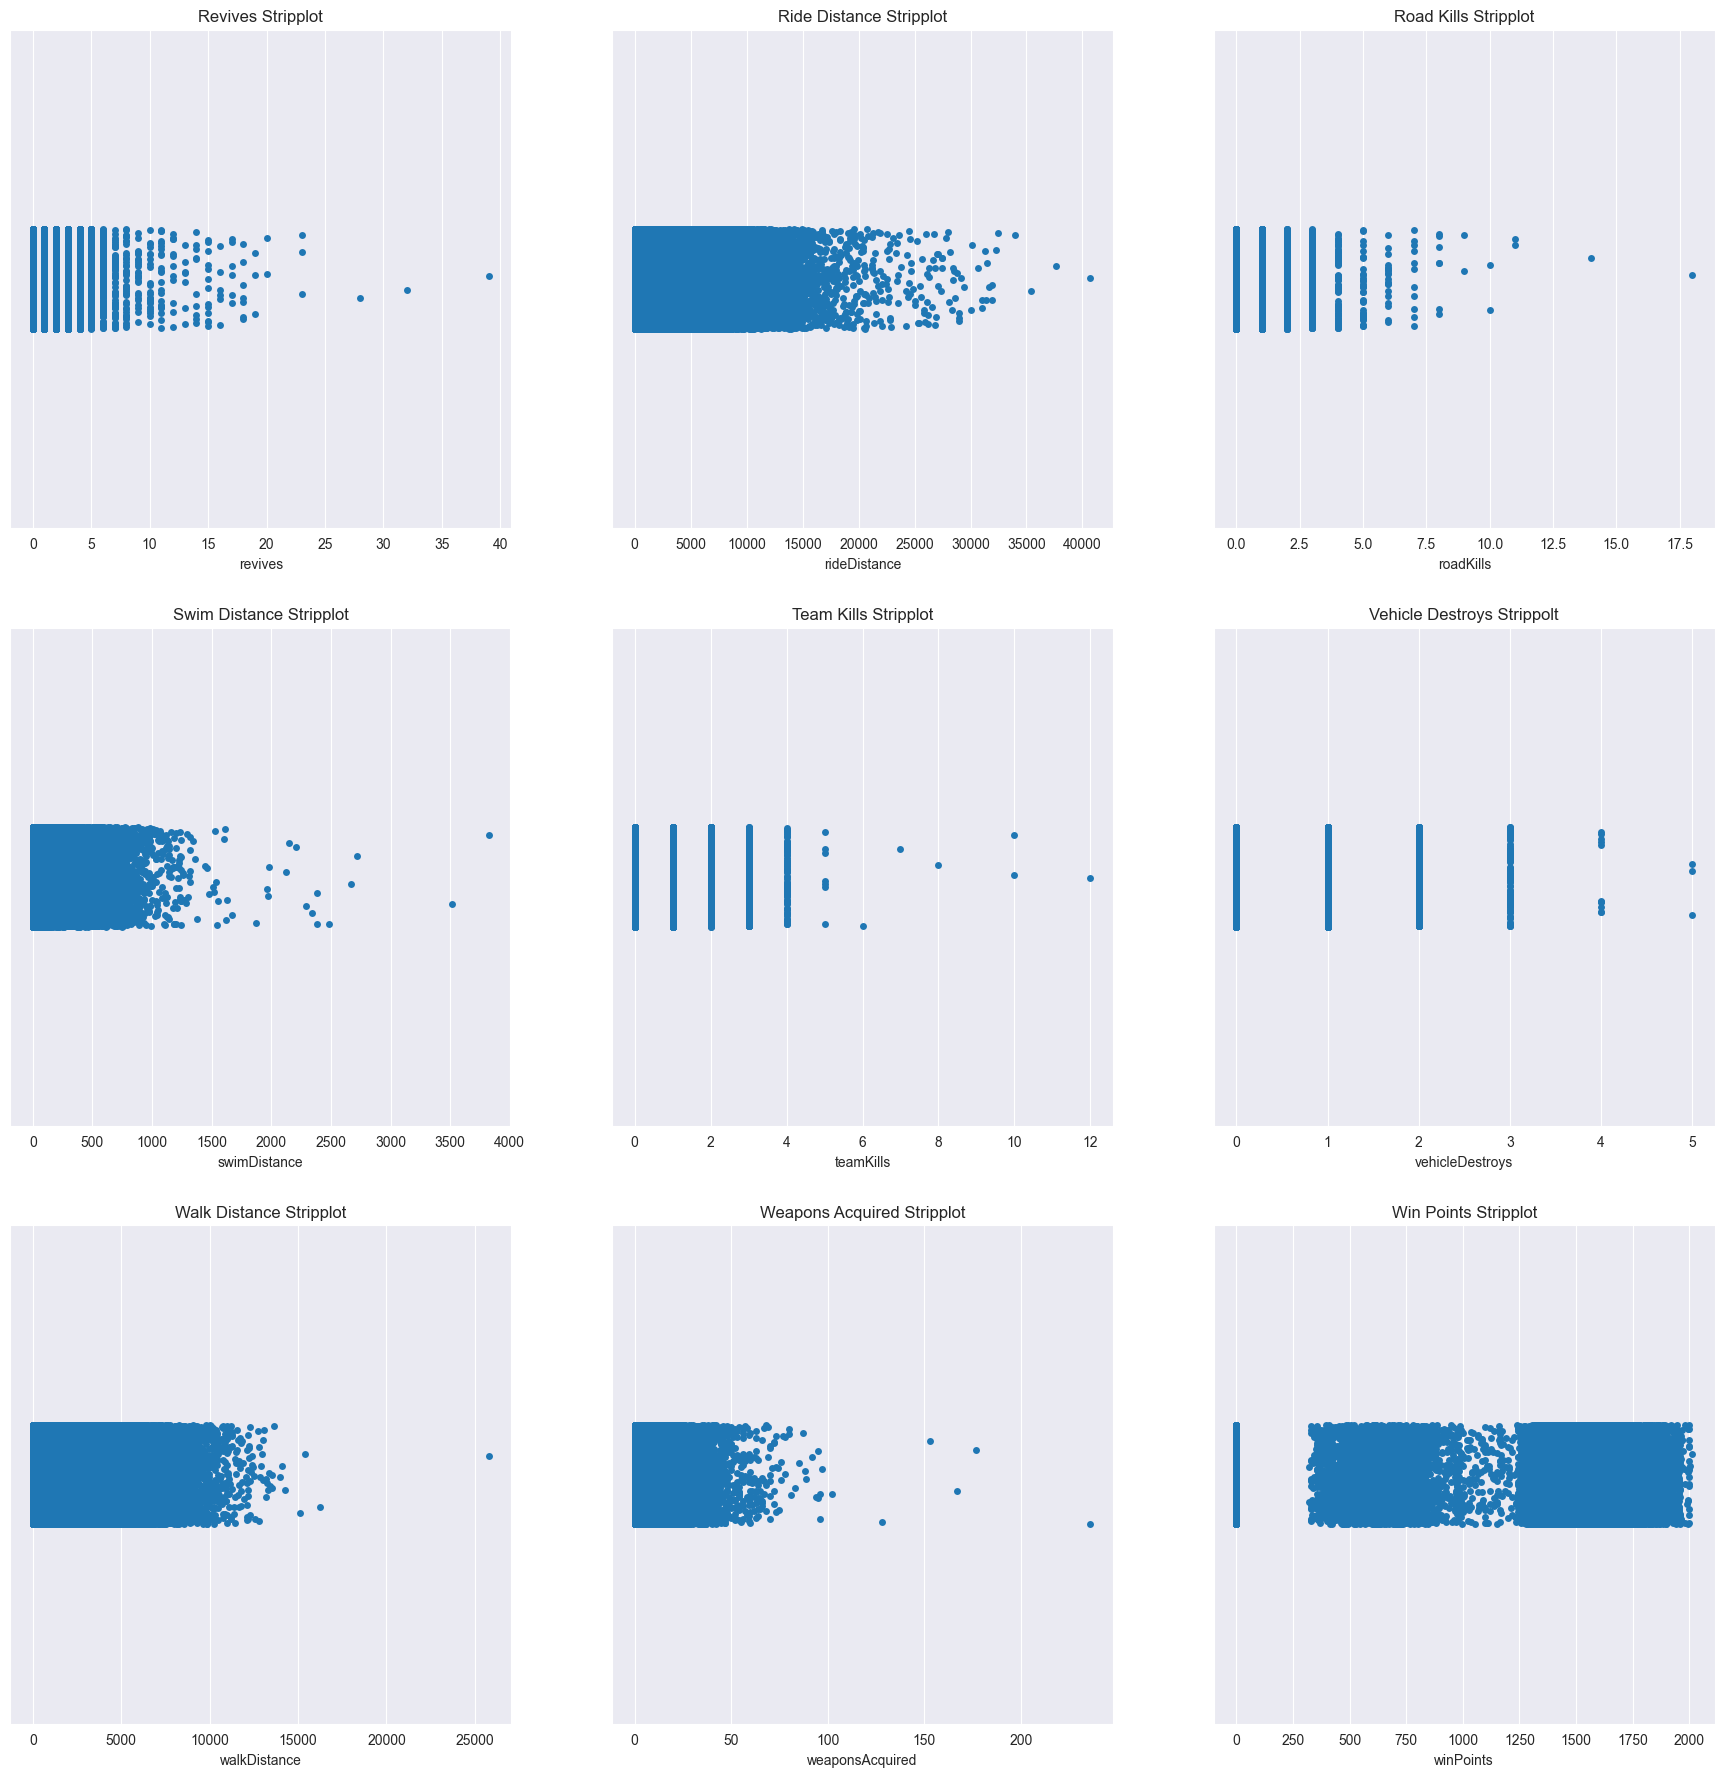

In [153]:
fig,( (ax15,ax16, ax17), (ax18, ax19, ax20), (ax21, ax22, ax23))= plt.subplots(ncols=3, nrows=3, figsize=(22,22))

sns.stripplot(data=TrainData, x='revives', ax=ax15).set_title('Revives Stripplot');

sns.stripplot(data=TrainData, x='rideDistance', ax=ax16).set_title("Ride Distance Stripplot");

sns.stripplot(data=TrainData, x= 'roadKills', ax=ax17).set_title("Road Kills Stripplot");

sns.stripplot(data= TrainData, x= 'swimDistance', ax=ax18).set_title('Swim Distance Stripplot');

sns.stripplot(data=TrainData, x='teamKills', ax=ax19).set_title('Team Kills Stripplot');

sns.stripplot(data=TrainData, x='vehicleDestroys', ax=ax20).set_title('Vehicle Destroys Strippolt');

sns.stripplot(data= TrainData, x='walkDistance', ax=ax21).set_title('Walk Distance Stripplot');

sns.stripplot(data=TrainData, x='weaponsAcquired', ax=ax22).set_title('Weapons Acquired Stripplot');

sns.stripplot(data=TrainData, x='winPoints', ax=ax23).set_title('Win Points Stripplot');

# Count Plot

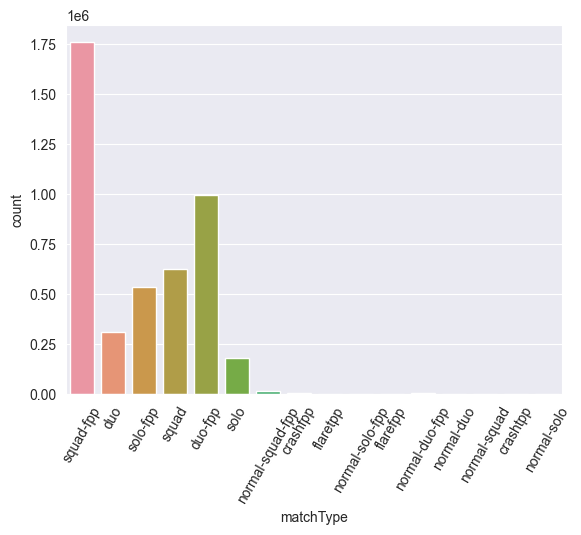

In [154]:
sns.countplot(data=TrainData, x='matchType');
plt.xticks(rotation=60);

# Scatter Plot

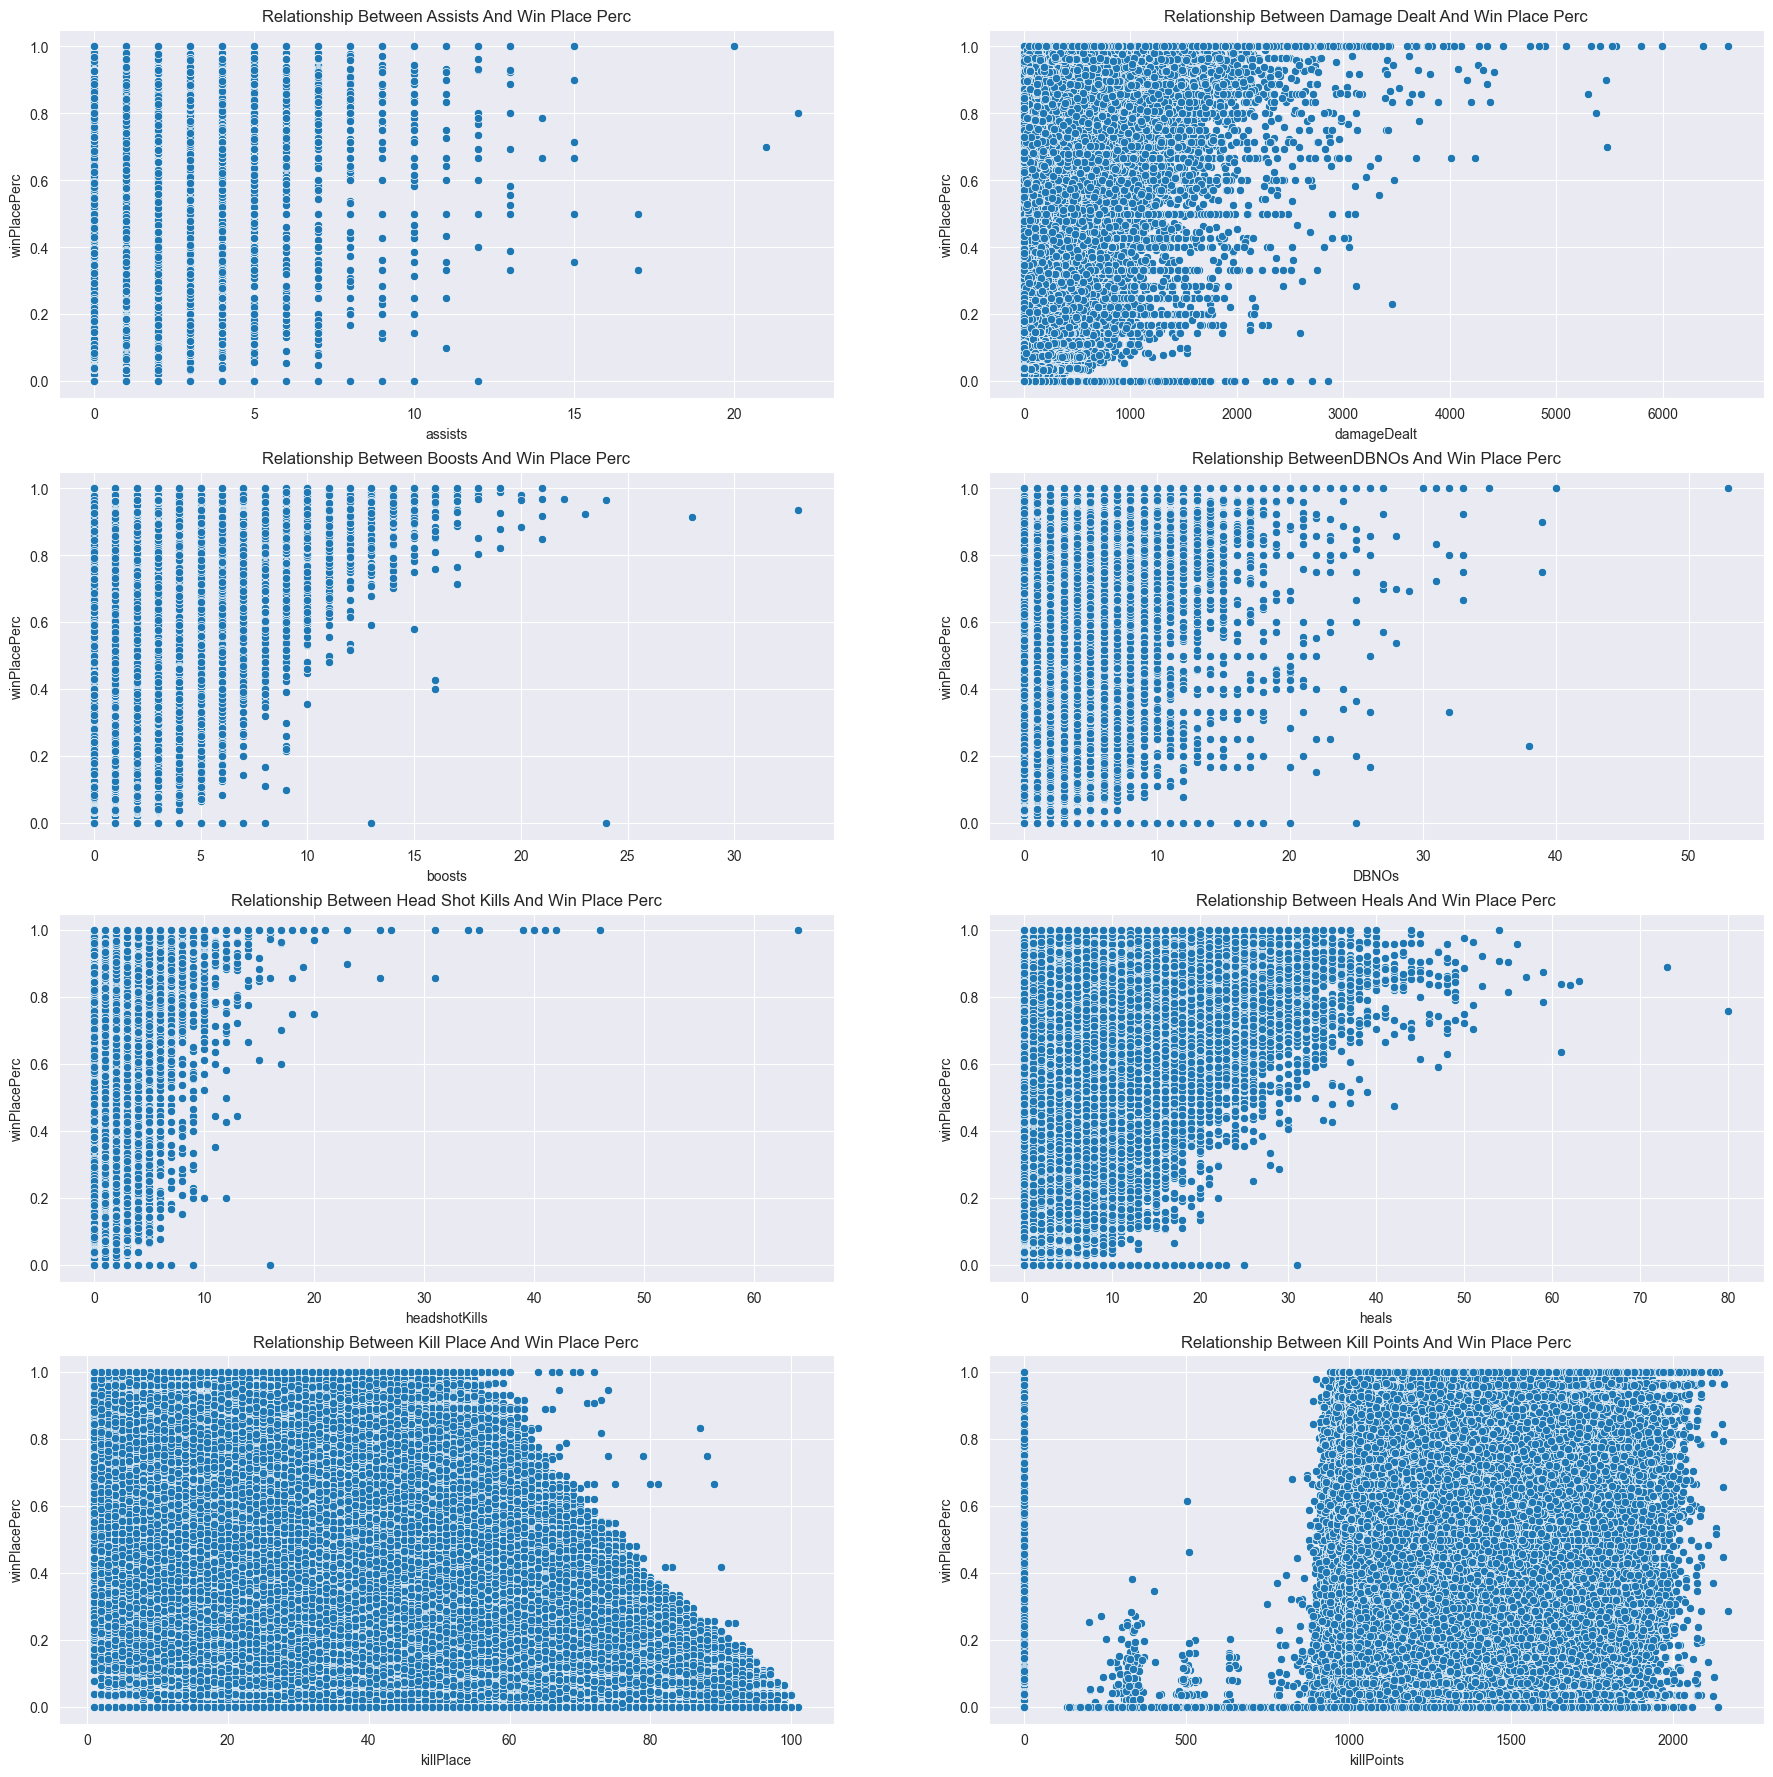

In [155]:
fig,((ax1, ax2), (ax3, ax4), (ax5, ax6),(ax7, ax8))= plt.subplots(ncols=2, nrows=4, figsize=(22,22))

sns.scatterplot(data=TrainData, x='assists', y='winPlacePerc', ax=ax1).set_title("Relationship Between Assists And Win Place Perc");

sns.scatterplot(data=TrainData, x= 'damageDealt',  y='winPlacePerc', ax=ax2).set_title("Relationship Between Damage Dealt And Win Place Perc");

sns.scatterplot(data= TrainData, x= 'boosts',  y='winPlacePerc', ax=ax3).set_title("Relationship Between Boosts And Win Place Perc");

sns.scatterplot(data=TrainData, x='DBNOs',  y='winPlacePerc', ax=ax4).set_title("Relationship BetweenDBNOs And Win Place Perc");

sns.scatterplot(data=TrainData, x='headshotKills',  y='winPlacePerc', ax=ax5).set_title("Relationship Between Head Shot Kills And Win Place Perc");

sns.scatterplot(data= TrainData, x='heals',  y='winPlacePerc', ax=ax6).set_title("Relationship Between Heals And Win Place Perc");

sns.scatterplot(data=TrainData, x='killPlace',  y='winPlacePerc', ax=ax7).set_title("Relationship Between Kill Place And Win Place Perc");

sns.scatterplot(data=TrainData, x='killPoints',  y='winPlacePerc', ax=ax8).set_title("Relationship Between Kill Points And Win Place Perc");

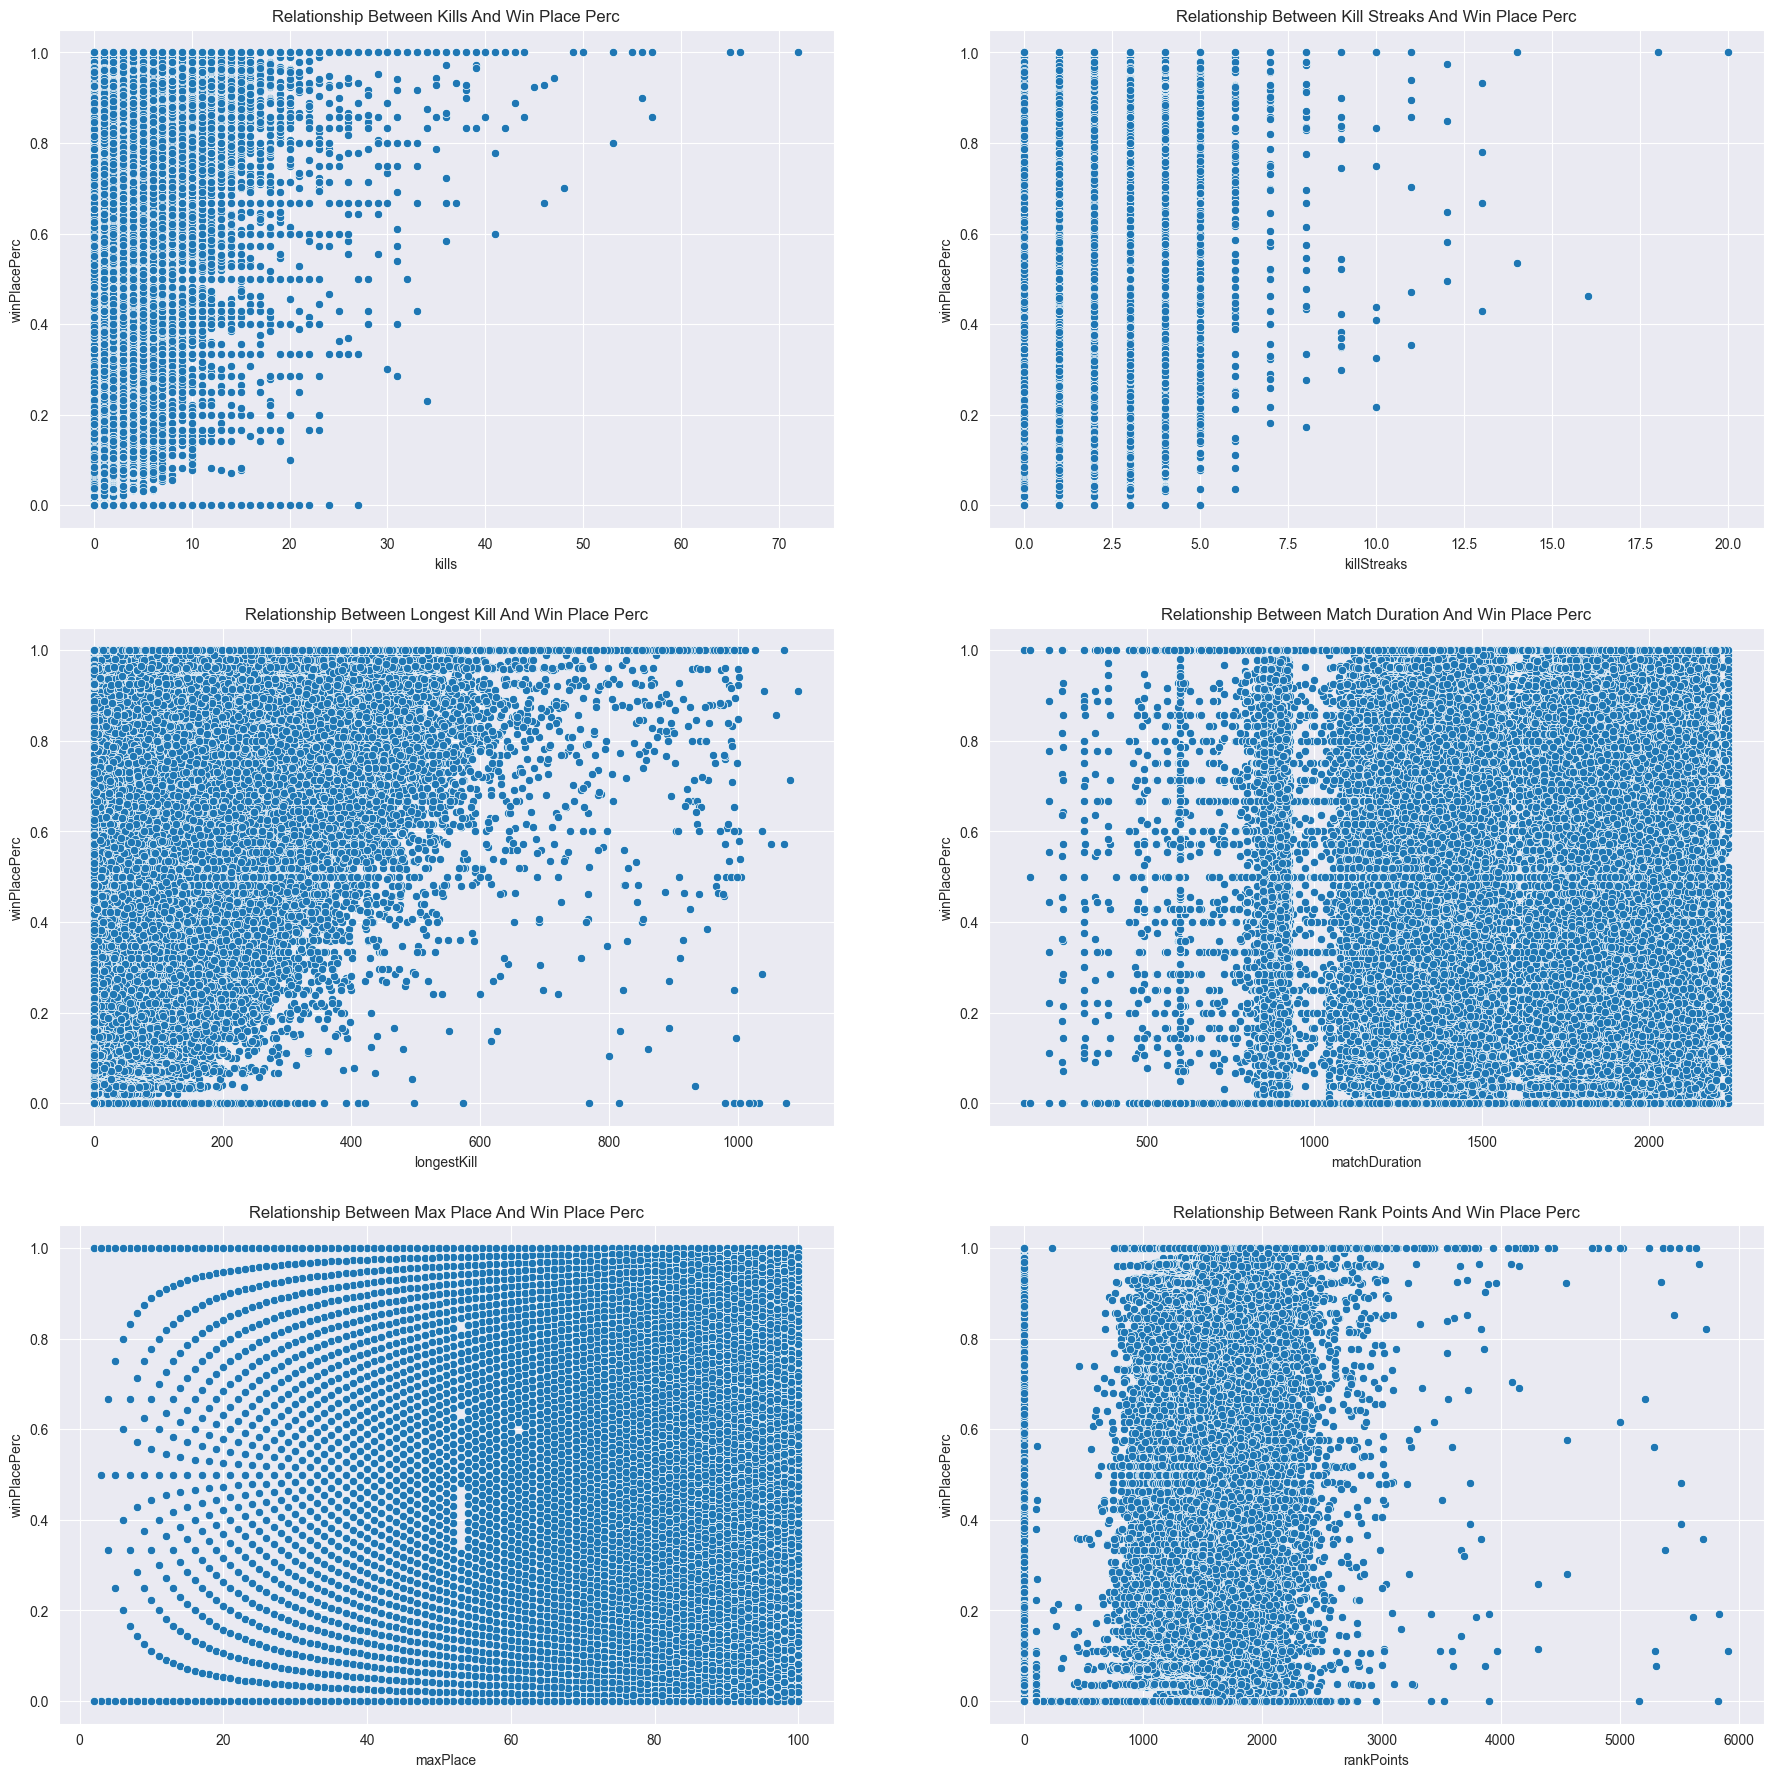

In [156]:
fig, ((ax9, ax10), (ax11, ax12), (ax13, ax14)) = plt.subplots(ncols=2, nrows=3, figsize=(22, 22))

sns.scatterplot(data=TrainData, x='kills', y='winPlacePerc', ax=ax9).set_title("Relationship Between Kills And Win Place Perc");

sns.scatterplot(data=TrainData, x='killStreaks', y='winPlacePerc',  ax=ax10).set_title("Relationship Between Kill Streaks And Win Place Perc");

sns.scatterplot(data=TrainData, x = 'longestKill',y='winPlacePerc',  ax=ax11).set_title("Relationship Between Longest Kill And Win Place Perc");

sns.scatterplot(data=TrainData, x='matchDuration', y='winPlacePerc',  ax=ax12).set_title("Relationship Between Match Duration And Win Place Perc");

sns.scatterplot(data=TrainData, x = 'maxPlace', y='winPlacePerc', ax=ax13).set_title("Relationship Between Max Place And Win Place Perc");

sns.scatterplot(data=TrainData, x= 'rankPoints', y='winPlacePerc', ax=ax14).set_title("Relationship Between Rank Points And Win Place Perc");


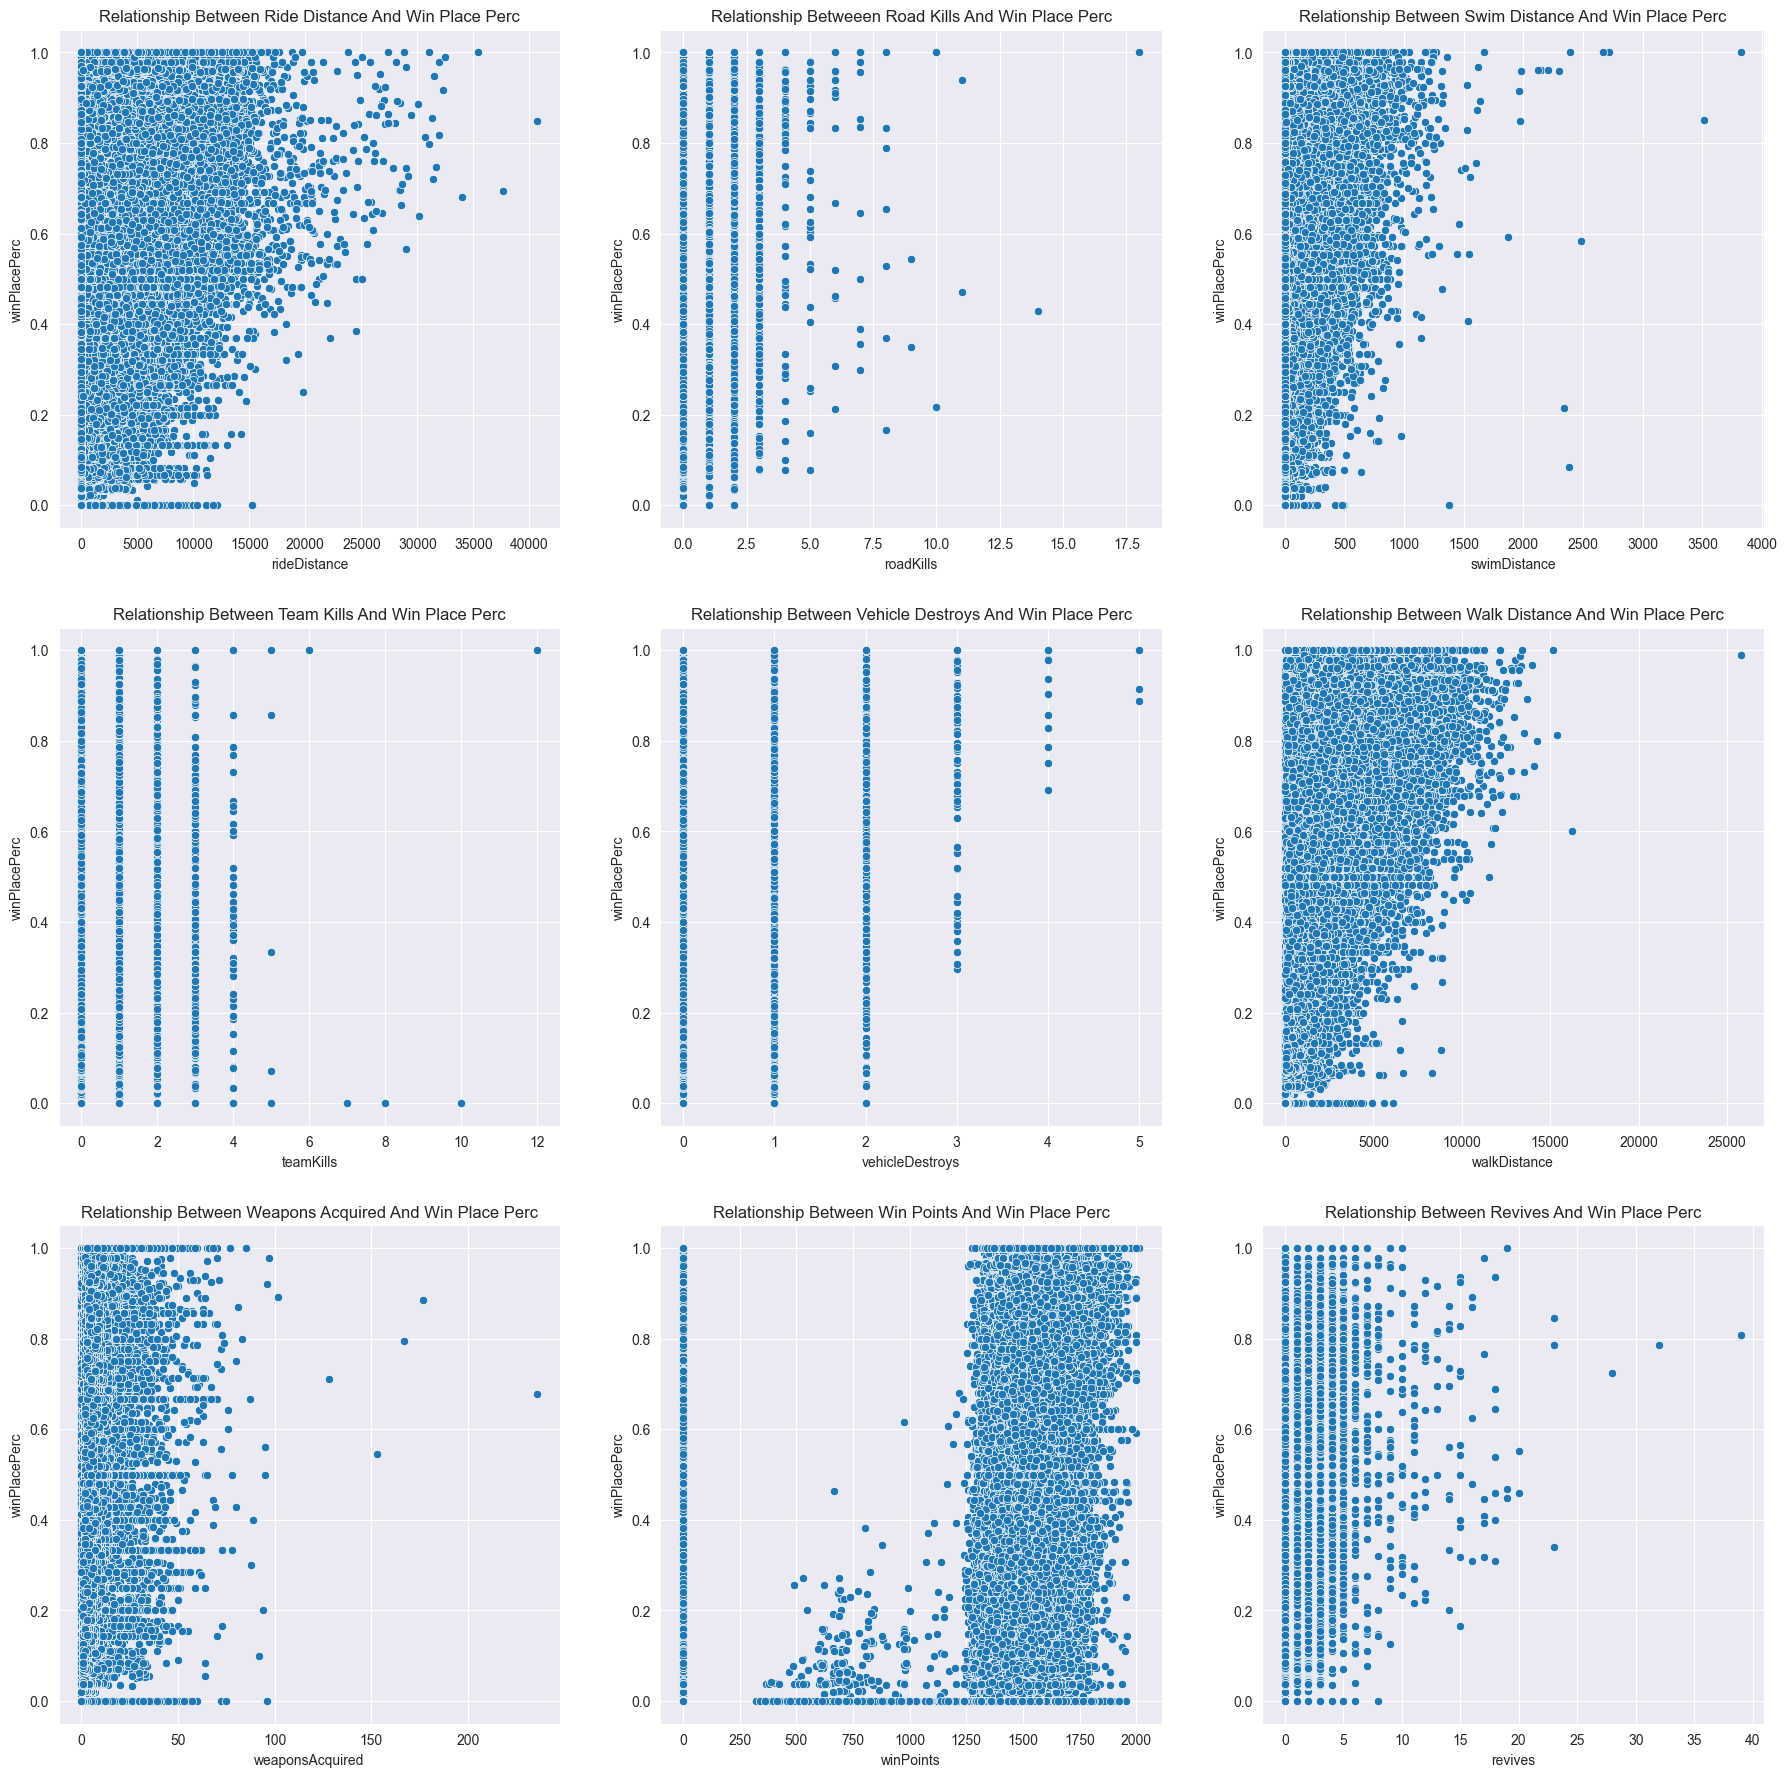

In [157]:
fig, ((ax15, ax16, ax17), (ax18, ax19, ax20), (ax21, ax22, ax23)) = plt.subplots(nrows=3, ncols=3, figsize=(22, 22));

sns.scatterplot(data=TrainData, x='rideDistance', y='winPlacePerc', ax=ax15).set_title('Relationship Between Ride Distance And Win Place Perc');

sns.scatterplot(data=TrainData, x='roadKills', y='winPlacePerc', ax=ax16).set_title('Relationship Betweeen Road Kills And Win Place Perc');

sns.scatterplot(data=TrainData, x='swimDistance', y='winPlacePerc', ax=ax17).set_title('Relationship Between Swim Distance And Win Place Perc');

sns.scatterplot(data=TrainData, x='teamKills', y='winPlacePerc', ax=ax18).set_title('Relationship Between Team Kills And Win Place Perc');

sns.scatterplot(data=TrainData, x='vehicleDestroys', y='winPlacePerc', ax=ax19).set_title('Relationship Between Vehicle Destroys And Win Place Perc');

sns.scatterplot(data=TrainData, x='walkDistance', y='winPlacePerc', ax=ax20).set_title('Relationship Between Walk Distance And Win Place Perc');

sns.scatterplot(data=TrainData, x='weaponsAcquired', y='winPlacePerc', ax=ax21).set_title('Relationship Between Weapons Acquired And Win Place Perc');

sns.scatterplot(data=TrainData, x='winPoints', y='winPlacePerc', ax=ax22).set_title('Relationship Between Win Points And Win Place Perc');

sns.scatterplot(data=TrainData, x='revives', y='winPlacePerc', ax=ax23).set_title("Relationship Between Revives And Win Place Perc");

# Player Travel Distance

In [158]:
walk = TrainData["walkDistance"] == 0
ride = TrainData["rideDistance"] == 0
swim = TrainData["swimDistance"] == 0
print("{} of Players walk for 0 meter, {} players drive for 0 meter and {} swim for 0 meter." .format(walk.sum(),ride.sum(),swim.sum()))

99602 of Players walk for 0 meter, 3309428 players drive for 0 meter and 4157693 swim for 0 meter.


# Player Using Heals

In [159]:
heals = TrainData["heals"] > 0
print("{} of Players use heals ." .format(heals.sum()))

1798768 of Players use heals .


# Player Killd With Head Shot

In [160]:
headshot = TrainData["headshotKills"] > 0
print("{} of Players killed with headshot ." .format(headshot.sum()))

750850 of Players killed with headshot .


# Kills

In [161]:
kills = TrainData["kills"] > 1
print("{} of player kill at least one enemy ." .format(kills.sum()))

989165 of player kill at least one enemy .


# Weapons Acquired

In [162]:
weapon = TrainData["weaponsAcquired"] > 1
print("{} of player picked up at least one weapon ." .format(weapon.sum()))

3639437 of player picked up at least one weapon .


# Head Shot Rate

In [163]:
HeadShotRate =( sum(TrainData['headshotKills']) / sum(TrainData['kills'])) 
HeadShotRate

0.24526781893164223

# Longest Kill Rate

In [164]:
LongestKillRate =( sum(TrainData['longestKill']) / sum(TrainData['kills'])) 
LongestKillRate

24.868089901678328

# Analyzing Winner Players

In [165]:
Winner = TrainData[TrainData['winPlacePerc']==1]

# Winner Players Data Correlation

In [166]:
Winner.corr().abs()

assists    boosts  damageDealt     DBNOs  headshotKills  \
assists          1.000000  0.111755     0.289864  0.238505       0.077293   
boosts           0.111755  1.000000     0.341598  0.210833       0.209610   
damageDealt      0.289864  0.341598     1.000000  0.681648       0.649357   
DBNOs            0.238505  0.210833     0.681648  1.000000       0.446891   
headshotKills    0.077293  0.209610     0.649357  0.446891       1.000000   
heals            0.108902  0.339531     0.167266  0.140129       0.070238   
killPlace        0.142800  0.350595     0.612287  0.495225       0.418474   
killPoints       0.030488  0.001906     0.038351  0.046171       0.023926   
kills            0.177510  0.332963     0.906550  0.658810       0.686924   
killStreaks      0.147045  0.253758     0.620667  0.593709       0.447811   
longestKill      0.136175  0.186190     0.445202  0.386785       0.379237   
matchDuration    0.014349  0.159823     0.018525  0.006159       0.030731   
maxPlace         0.173640  0.270344     0.188142  0.212686       0.174887   
numGroups        0.166246  0.275377     0.189883  0.204932       0.174868   
rankPoints       0.006882  0.028184     0.013117  0.004313       0.002328   
revives          0.118901  0.110939     0.120453  0.206687       0.053516   
rideDistance     0.032802  0.145546     0.033147  0.028561       0.002505   
roadKills        0.000249  0.014568     0.039839  0.026296       0.005210   
swimDistance     0.034737  0.004172     0.023278  0.030803       0.004225   
teamKills        0.010682  0.038385     0.004075  0.001888       0.006380   
vehicleDestroys  0.055782  0.063196     0.076569  0.056663       0.030598   
walkDistance     0.100559  0.257446     0.098658  0.120325       0.064790   
weaponsAcquired  0.157991  0.051254     0.234108  0.097636       0.140618   
winPoints        0.017428  0.015557     0.009247  0.013741       0.009153   
winPlacePerc          NaN       NaN          NaN       NaN            NaN   

                    heals  killPlace  killPoints     kills  killStreaks  ...  \
assists          0.108902   0.142800    0.030488  0.177510     0.147045  ...   
boosts           0.339531   0.350595    0.001906  0.332963     0.253758  ...   
damageDealt      0.167266   0.612287    0.038351  0.906550     0.620667  ...   
DBNOs            0.140129   0.495225    0.046171  0.658810     0.593709  ...   
headshotKills    0.070238   0.418474    0.023926  0.686924     0.447811  ...   
heals            1.000000   0.138569    0.012573  0.139557     0.106316  ...   
killPlace        0.138569   1.000000    0.018233  0.680577     0.706025  ...   
killPoints       0.012573   0.018233    1.000000  0.033750     0.042644  ...   
kills            0.139557   0.680577    0.033750  1.000000     0.701253  ...   
killStreaks      0.106316   0.706025    0.042644  0.701253     1.000000  ...   
longestKill      0.079415   0.482591    0.000281  0.456252     0.363225  ...   
matchDuration    0.180719   0.030260    0.089590  0.047596     0.057542  ...   
maxPlace         0.014343   0.204462    0.018208  0.213797     0.022298  ...   
numGroups        0.018918   0.195970    0.011571  0.216903     0.030795  ...   
rankPoints       0.018323   0.032460    0.966842  0.015111     0.002095  ...   
revives          0.142401   0.135906    0.006091  0.126129     0.141080  ...   
rideDistance     0.191985   0.029913    0.053039  0.006829     0.005452  ...   
roadKills        0.009095   0.038460    0.008017  0.047426     0.059550  ...   
swimDistance     0.007745   0.008390    0.004460  0.017211     0.007200  ...   
teamKills        0.000889   0.036592    0.041684  0.000680     0.011259  ...   
vehicleDestroys  0.036794   0.064403    0.026730  0.074579     0.067698  ...   
walkDistance     0.110329   0.175995    0.030780  0.102222     0.156685  ...   
weaponsAcquired  0.095782   0.102812    0.022398  0.236593     0.118482  ...   
winPoints        0.017255   0.012464    0.984245  0.005581     0.014800  ...   
winPlacePerc   

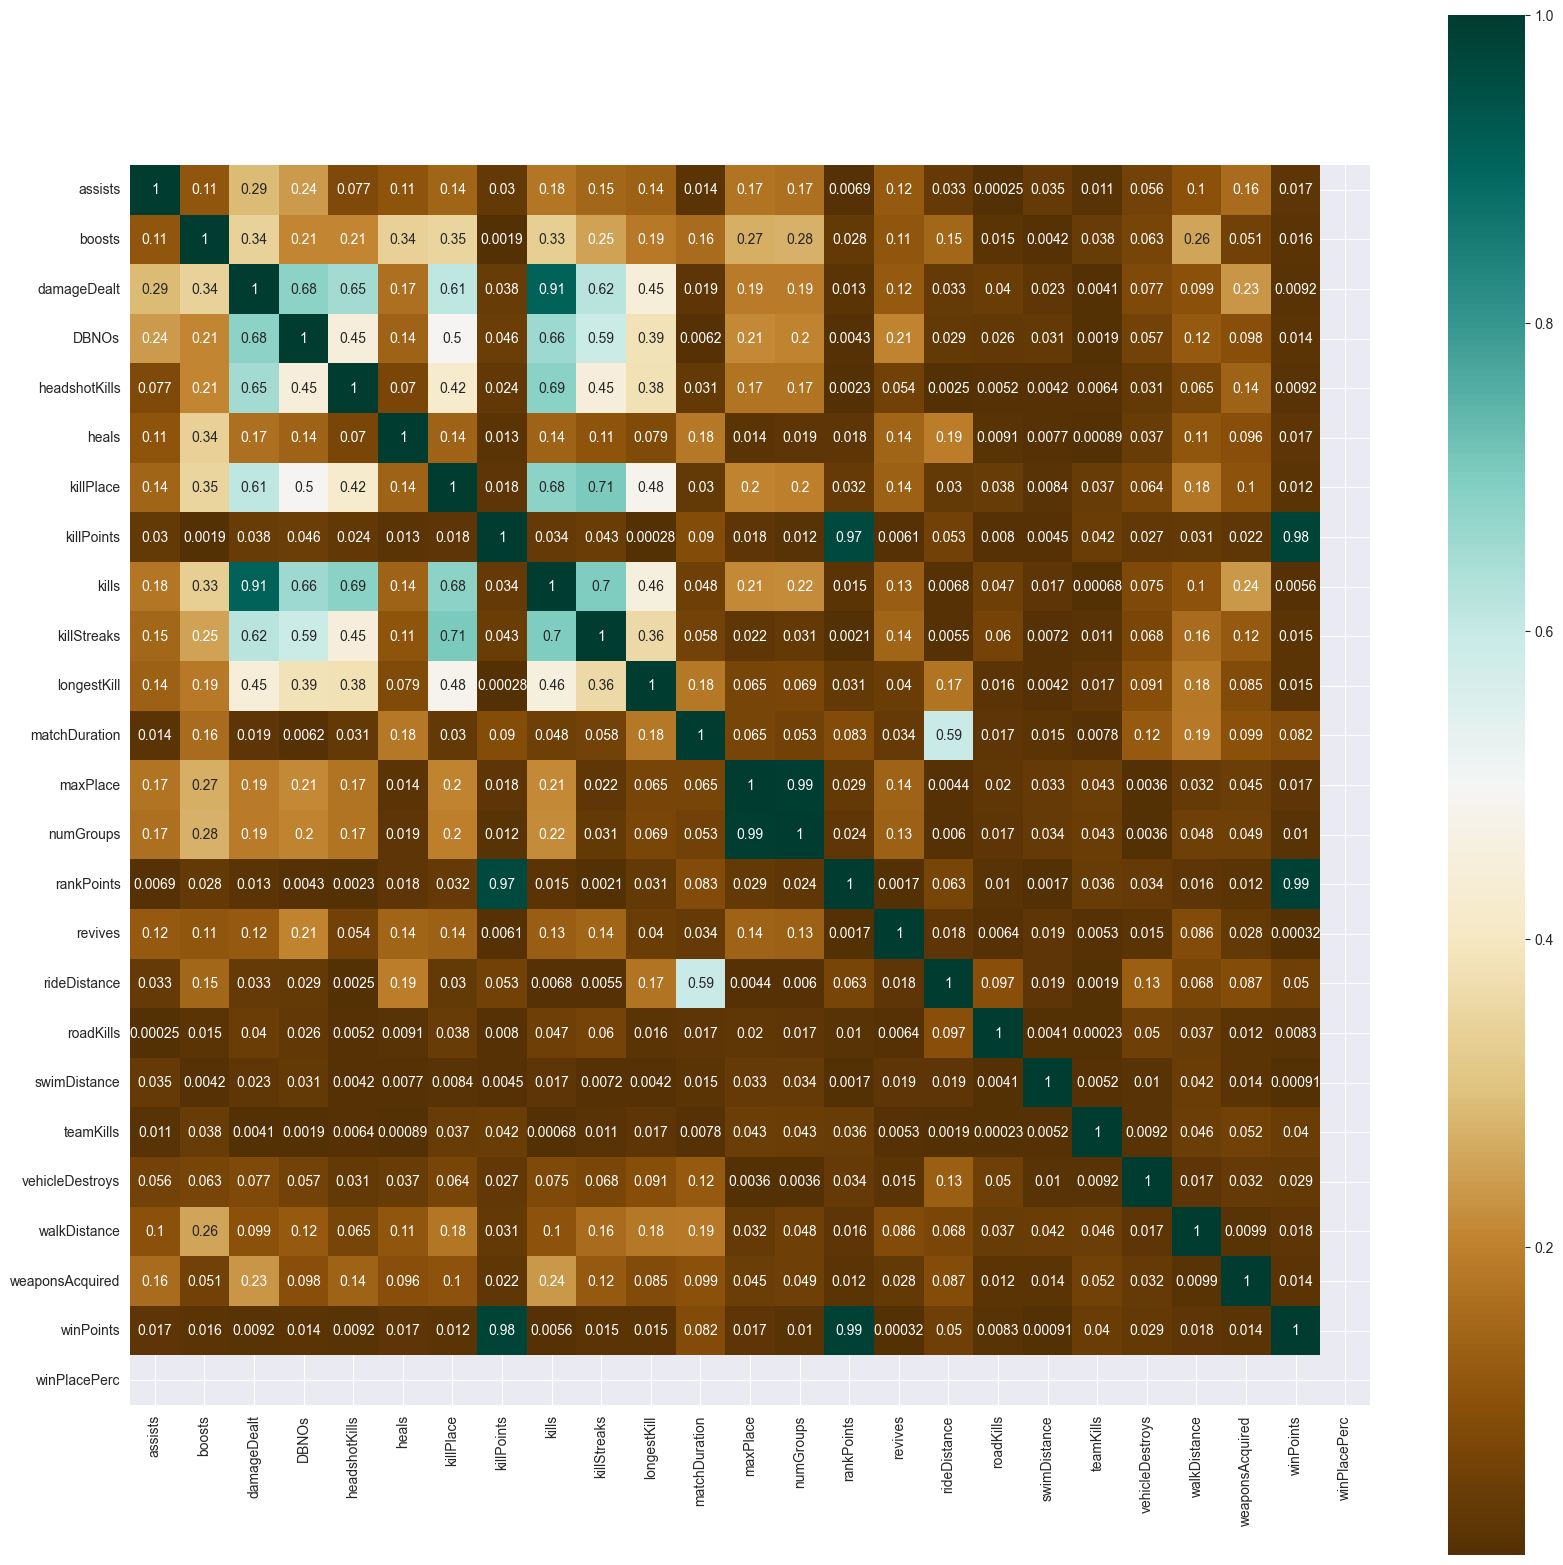

In [167]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(Winner.corr().abs(), square=True,annot=True, cmap="BrBG", ax=ax);

# Winner Player Visualization

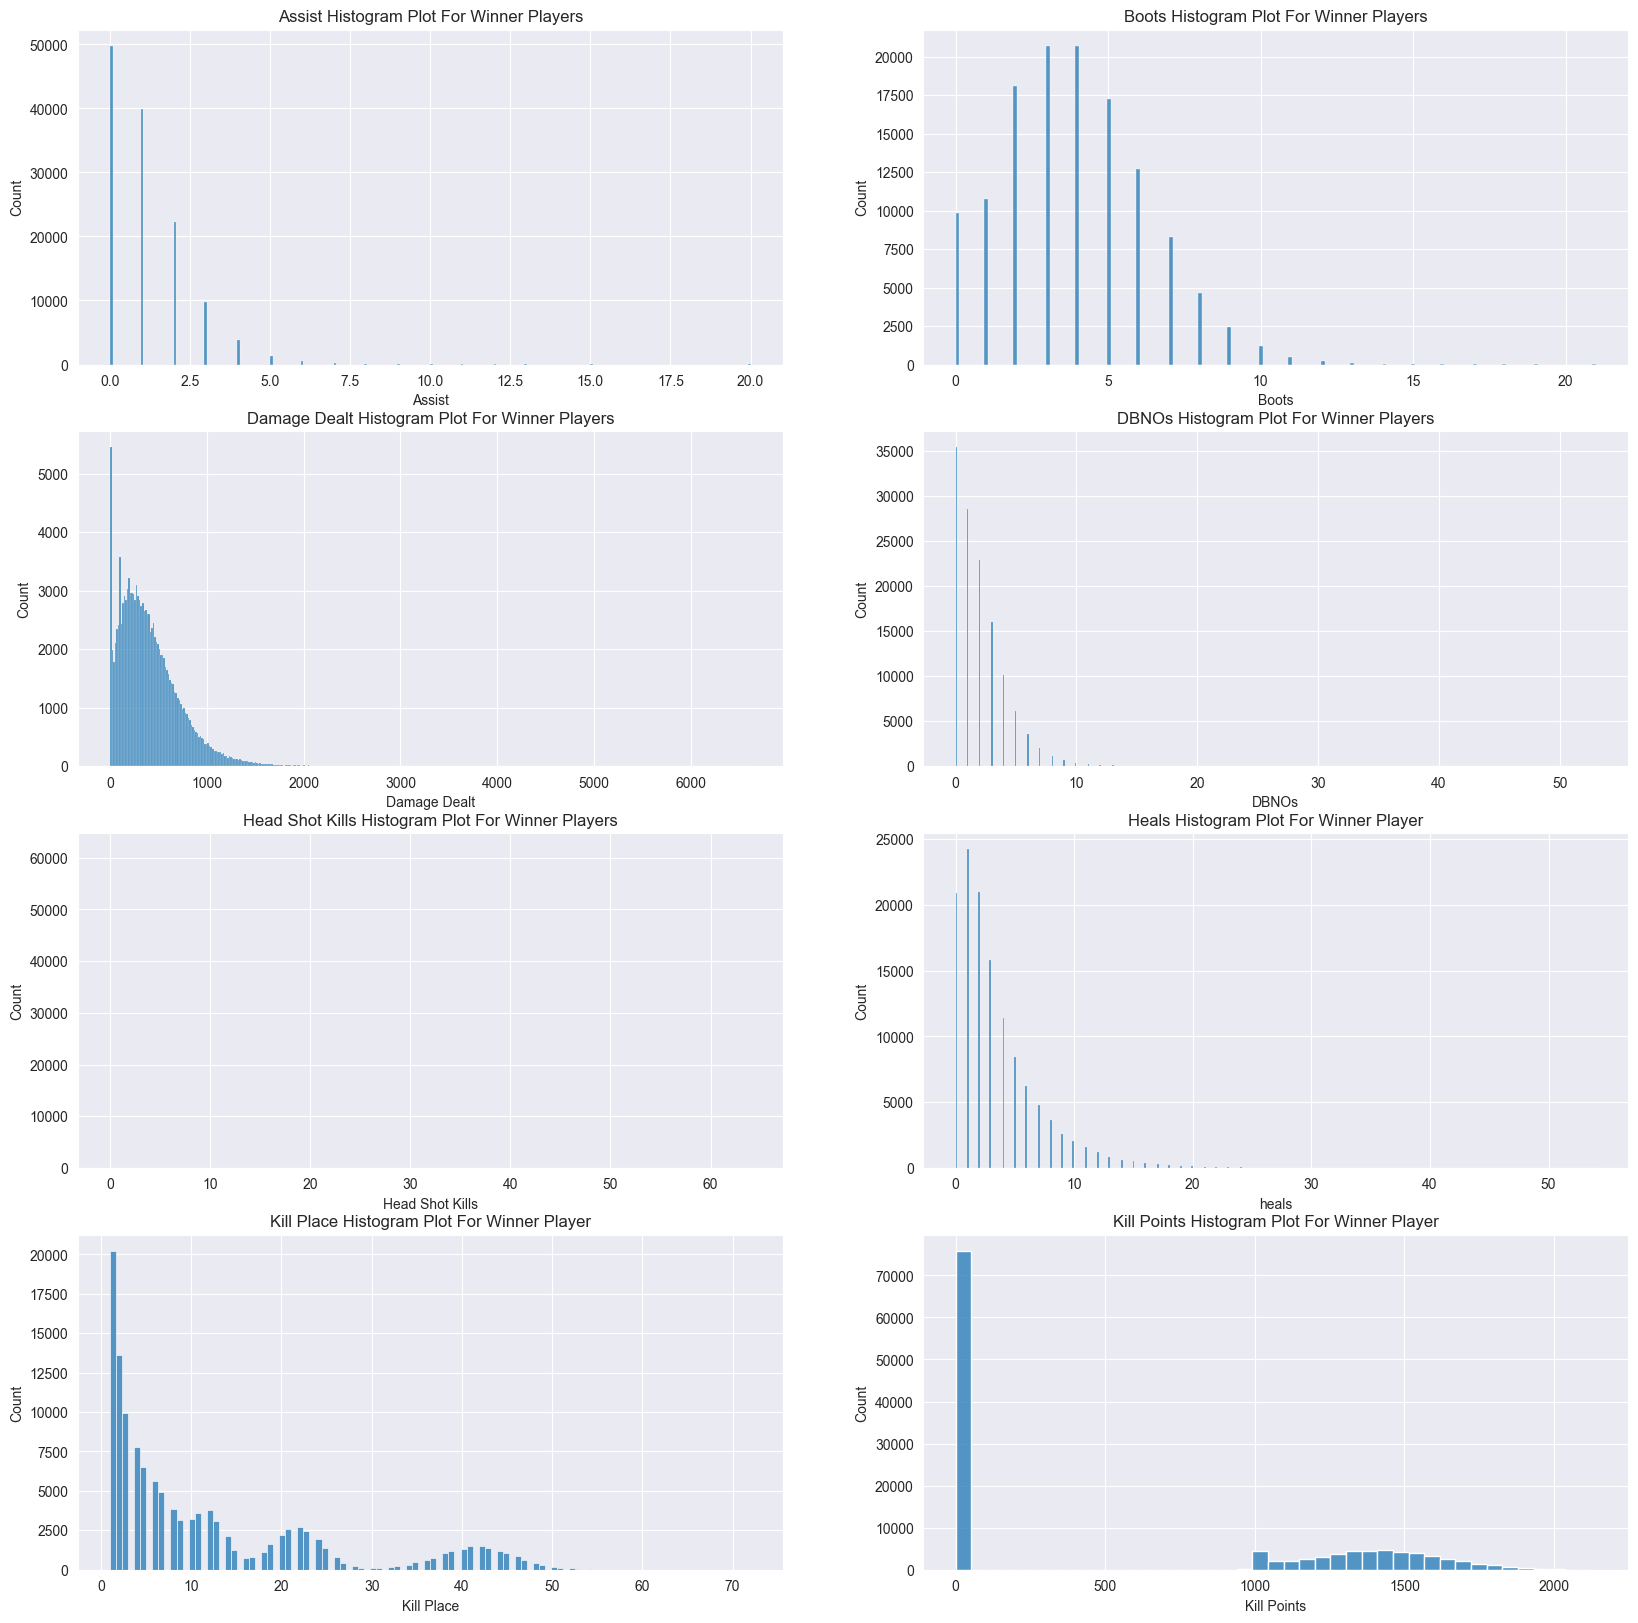

In [168]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(20,20))

sns.histplot(Winner['assists'], ax=ax1);
ax1.set(title = 'Assist Histogram Plot For Winner Players', xlabel='Assist', ylabel='Count');

sns.histplot(Winner['boosts'],ax=ax2)
ax2.set(title = 'Boots Histogram Plot For Winner Players', xlabel = 'Boots', ylabel='Count');

sns.histplot(Winner['damageDealt'],ax=ax3)
ax3.set(title = 'Damage Dealt Histogram Plot For Winner Players', xlabel='Damage Dealt', ylabel='Count');

sns.histplot(Winner['DBNOs'],ax=ax4)
ax4.set(title='DBNOs Histogram Plot For Winner Players', xlabel='DBNOs', ylabel='Count');

sns.histplot(Winner['headshotKills'],ax=ax5)
ax5.set(title='Head Shot Kills Histogram Plot For Winner Players', xlabel='Head Shot Kills', ylabel='Count');

sns.histplot(Winner['heals'],ax=ax6)
ax6.set(title='Heals Histogram Plot For Winner Player', xlabel='heals', ylabel='Count');

sns.histplot(Winner['killPlace'],ax=ax7)
ax7.set(title='Kill Place Histogram Plot For Winner Player', xlabel='Kill Place', ylabel='Count');

sns.histplot(Winner['killPoints'],ax=ax8)
ax8.set(title='Kill Points Histogram Plot For Winner Player', xlabel='Kill Points', ylabel='Count');


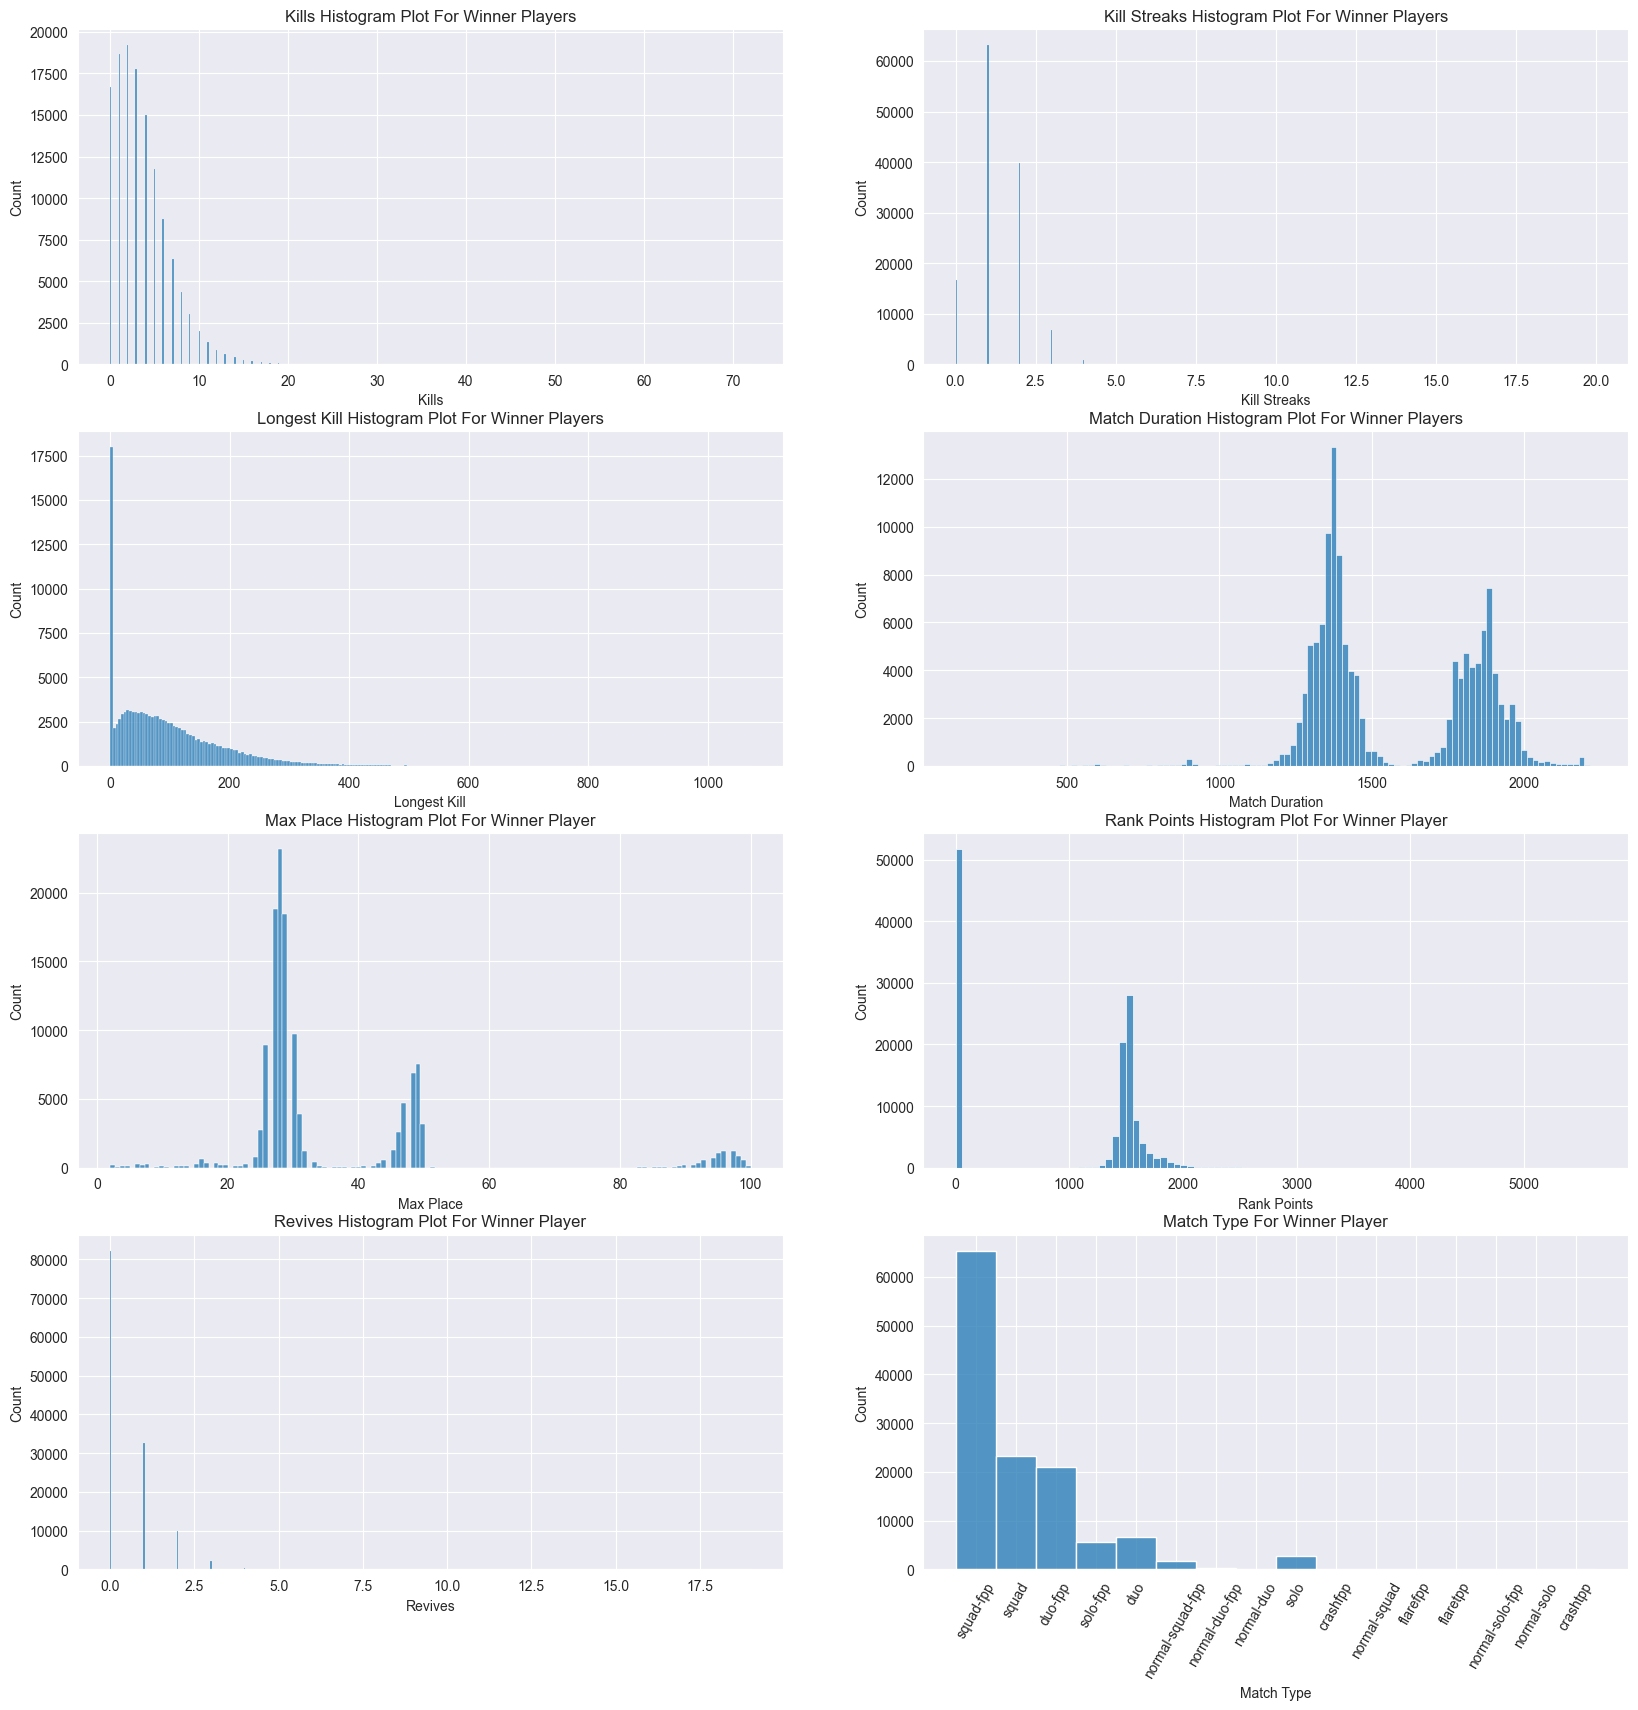

In [169]:
fig, ((ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16)) = plt.subplots(nrows=4, ncols=2, figsize=(20,20))

sns.histplot(Winner['kills'], ax=ax9);
ax9.set(title = 'Kills Histogram Plot For Winner Players', xlabel='Kills', ylabel='Count');

sns.histplot(Winner['killStreaks'],ax=ax10)
ax10.set(title = 'Kill Streaks Histogram Plot For Winner Players', xlabel = 'Kill Streaks', ylabel='Count');

sns.histplot(Winner['longestKill'],ax=ax11)
ax11.set(title = 'Longest Kill Histogram Plot For Winner Players', xlabel='Longest Kill', ylabel='Count');

sns.histplot(Winner['matchDuration'],ax=ax12)
ax12.set(title='Match Duration Histogram Plot For Winner Players', xlabel='Match Duration', ylabel='Count');

sns.histplot(Winner['maxPlace'],ax=ax13)
ax13.set(title='Max Place Histogram Plot For Winner Player', xlabel='Max Place', ylabel='Count');

sns.histplot(Winner['rankPoints'],ax=ax14)
ax14.set(title='Rank Points Histogram Plot For Winner Player', xlabel='Rank Points', ylabel='Count');

sns.histplot(Winner['revives'],ax=ax15)
ax15.set(title='Revives Histogram Plot For Winner Player', xlabel='Revives', ylabel='Count');

sns.histplot(Winner['matchType'],ax=ax16)
ax16.set(title='Match Type For Winner Player', xlabel='Match Type', ylabel='Count');

plt.xticks(rotation=60);

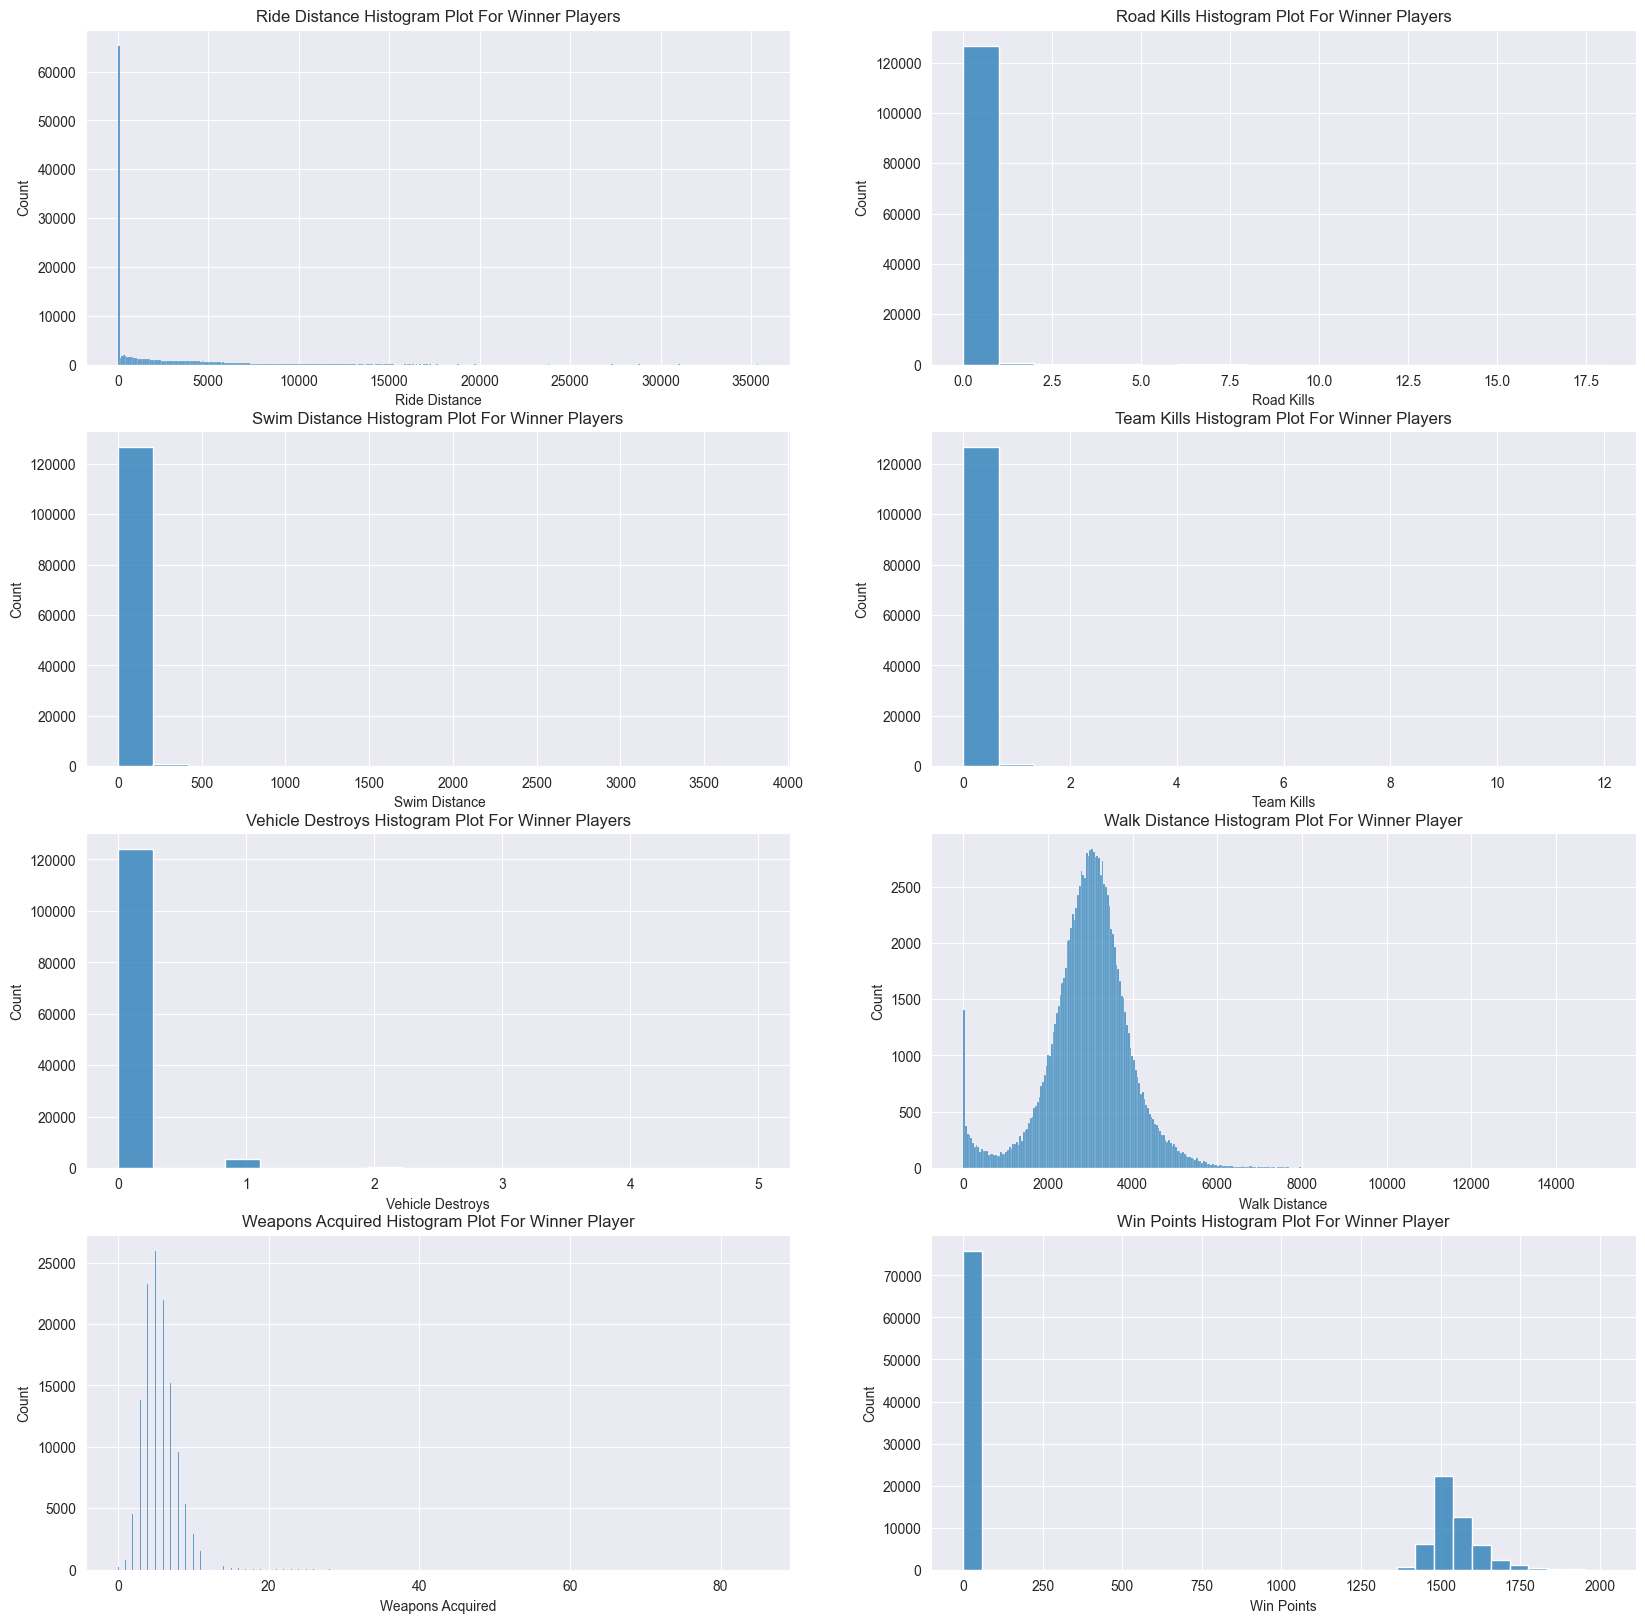

In [170]:
fig, ((ax17, ax18), (ax19, ax20), (ax21, ax22), (ax23, ax24)) = plt.subplots(nrows=4, ncols=2, figsize=(20,20))

sns.histplot(Winner['rideDistance'], ax=ax17);
ax17.set(title = 'Ride Distance Histogram Plot For Winner Players', xlabel='Ride Distance', ylabel='Count');

sns.histplot(Winner['roadKills'],ax=ax18)
ax18.set(title = 'Road Kills Histogram Plot For Winner Players', xlabel = 'Road Kills', ylabel='Count');

sns.histplot(Winner['swimDistance'],ax=ax19)
ax19.set(title = 'Swim Distance Histogram Plot For Winner Players', xlabel=' Swim Distance', ylabel='Count');

sns.histplot(Winner['teamKills'],ax=ax20)
ax20.set(title='Team Kills Histogram Plot For Winner Players', xlabel='Team Kills', ylabel='Count');

sns.histplot(Winner['vehicleDestroys'],ax=ax21)
ax21.set(title='Vehicle Destroys Histogram Plot For Winner Players', xlabel='Vehicle Destroys', ylabel='Count');

sns.histplot(Winner['walkDistance'],ax=ax22)
ax22.set(title='Walk Distance Histogram Plot For Winner Player', xlabel='Walk Distance', ylabel='Count');

sns.histplot(Winner['weaponsAcquired'],ax=ax23)
ax23.set(title='Weapons Acquired Histogram Plot For Winner Player', xlabel='Weapons Acquired', ylabel='Count');

sns.histplot(Winner['winPoints'],ax=ax24)
ax24.set(title='Win Points Histogram Plot For Winner Player', xlabel='Win Points', ylabel='Count');


# Player Win Without Acquired Any Weapons

In [171]:
weapon = Winner['weaponsAcquired'] == 0
print("{} of Players win without acquired any weapon " .format(weapon.sum()))

201 of Players win without acquired any weapon 


# Player Win Without Kill Any One

In [172]:
Kill = Winner['kills'] == 0
print("{} of Players win without kill anyone" .format(Kill.sum()))

16666 of Players win without kill anyone


# Player Win Without Use Any Heals

In [173]:
heals = Winner['heals'] == 0
print("{} of Players win without using heals" .format(heals.sum()))

20889 of Players win without using heals


# Player Win Without Travel

In [174]:
walk1 = Winner["walkDistance"] == 0
ride1 = Winner["rideDistance"] == 0
swim1 = Winner["swimDistance"] == 0
print("{} of Players win without walk at all, {} players win without drive and {} win without swim." .format(walk1.sum(),ride1.sum(),swim1.sum()))

965 of Players win without walk at all, 63103 players win without drive and 108351 win without swim.


# Analyzing Losser Player 

In [175]:
Losser = TrainData[TrainData['winPlacePerc']==0]

# Losser Player Data Correlation

In [176]:
Losser.corr().abs()

assists    boosts  damageDealt     DBNOs  headshotKills  \
assists          1.000000  0.070280     0.420783  0.230926       0.214656   
boosts           0.070280  1.000000     0.136894  0.067422       0.101182   
damageDealt      0.420783  0.136894     1.000000  0.647462       0.461822   
DBNOs            0.230926  0.067422     0.647462  1.000000       0.422774   
headshotKills    0.214656  0.101182     0.461822  0.422774       1.000000   
heals            0.277725  0.297846     0.335529  0.167137       0.222627   
killPlace        0.114238  0.137177     0.503223  0.456272       0.351370   
killPoints       0.030034  0.010117     0.012927  0.032839       0.014929   
kills            0.394040  0.129312     0.723707  0.629878       0.641178   
killStreaks      0.184355  0.078175     0.557979  0.688443       0.524025   
longestKill      0.276305  0.119755     0.436361  0.312950       0.388822   
matchDuration    0.084399  0.014912     0.056904  0.047792       0.052270   
maxPlace         0.078502  0.069616     0.186065  0.131633       0.079780   
numGroups        0.070998  0.074285     0.198437  0.116273       0.072686   
rankPoints       0.027441  0.010454     0.010340  0.011925       0.008059   
revives          0.136297  0.084818     0.146496  0.228384       0.110856   
rideDistance     0.078550  0.210781     0.085989  0.040758       0.045277   
roadKills        0.005141  0.006177     0.018445  0.033028       0.001220   
swimDistance     0.019114  0.013893     0.009830  0.001152       0.021117   
teamKills        0.062636  0.007976     0.067666  0.060265       0.036419   
vehicleDestroys  0.001721  0.030976     0.007208  0.006889       0.001843   
walkDistance     0.228824  0.281641     0.286950  0.201264       0.182026   
weaponsAcquired  0.401773  0.157198     0.561988  0.264334       0.310444   
winPoints        0.032940  0.007532     0.002736  0.019888       0.011989   
winPlacePerc          NaN       NaN          NaN       NaN            NaN   

                    heals  killPlace  killPoints     kills  killStreaks  ...  \
assists          0.277725   0.114238    0.030034  0.394040     0.184355  ...   
boosts           0.297846   0.137177    0.010117  0.129312     0.078175  ...   
damageDealt      0.335529   0.503223    0.012927  0.723707     0.557979  ...   
DBNOs            0.167137   0.456272    0.032839  0.629878     0.688443  ...   
headshotKills    0.222627   0.351370    0.014929  0.641178     0.524025  ...   
heals            1.000000   0.154342    0.005780  0.384309     0.159888  ...   
killPlace        0.154342   1.000000    0.074971  0.534957     0.663861  ...   
killPoints       0.005780   0.074971    1.000000  0.020915     0.030609  ...   
kills            0.384309   0.534957    0.020915  1.000000     0.800231  ...   
killStreaks      0.159888   0.663861    0.030609  0.800231     1.000000  ...   
longestKill      0.261382   0.291469    0.008916  0.572417     0.417735  ...   
matchDuration    0.030978   0.053699    0.101703  0.091005     0.057346  ...   
maxPlace         0.081861   0.275133    0.025524  0.125352     0.120990  ...   
numGroups        0.081835   0.353368    0.003506  0.114335     0.107644  ...   
rankPoints       0.002910   0.080822    0.954993  0.012565     0.013030  ...   
revives          0.154869   0.089865    0.001998  0.174148     0.117668  ...   
rideDistance     0.162005   0.106639    0.012473  0.080675     0.035473  ...   
roadKills        0.004893   0.032953    0.000512  0.030004     0.041478  ...   
swimDistance     0.009383   0.014576    0.000321  0.010419     0.001643  ...   
teamKills        0.086112   0.017153    0.051694  0.086728     0.023119  ...   
vehicleDestroys  0.014322   0.009096    0.004037  0.005129     0.007078  ...   
walkDistance     0.280202   0.194833    0.004724  0.286164     0.192524  ...   
weaponsAcquired  0.368711   0.409222    0.020970  0.516975     0.272963  ...   
winPoints        0.000433   0.077189    0.981486  0.018691     0.019735  ...   
winPlacePerc   

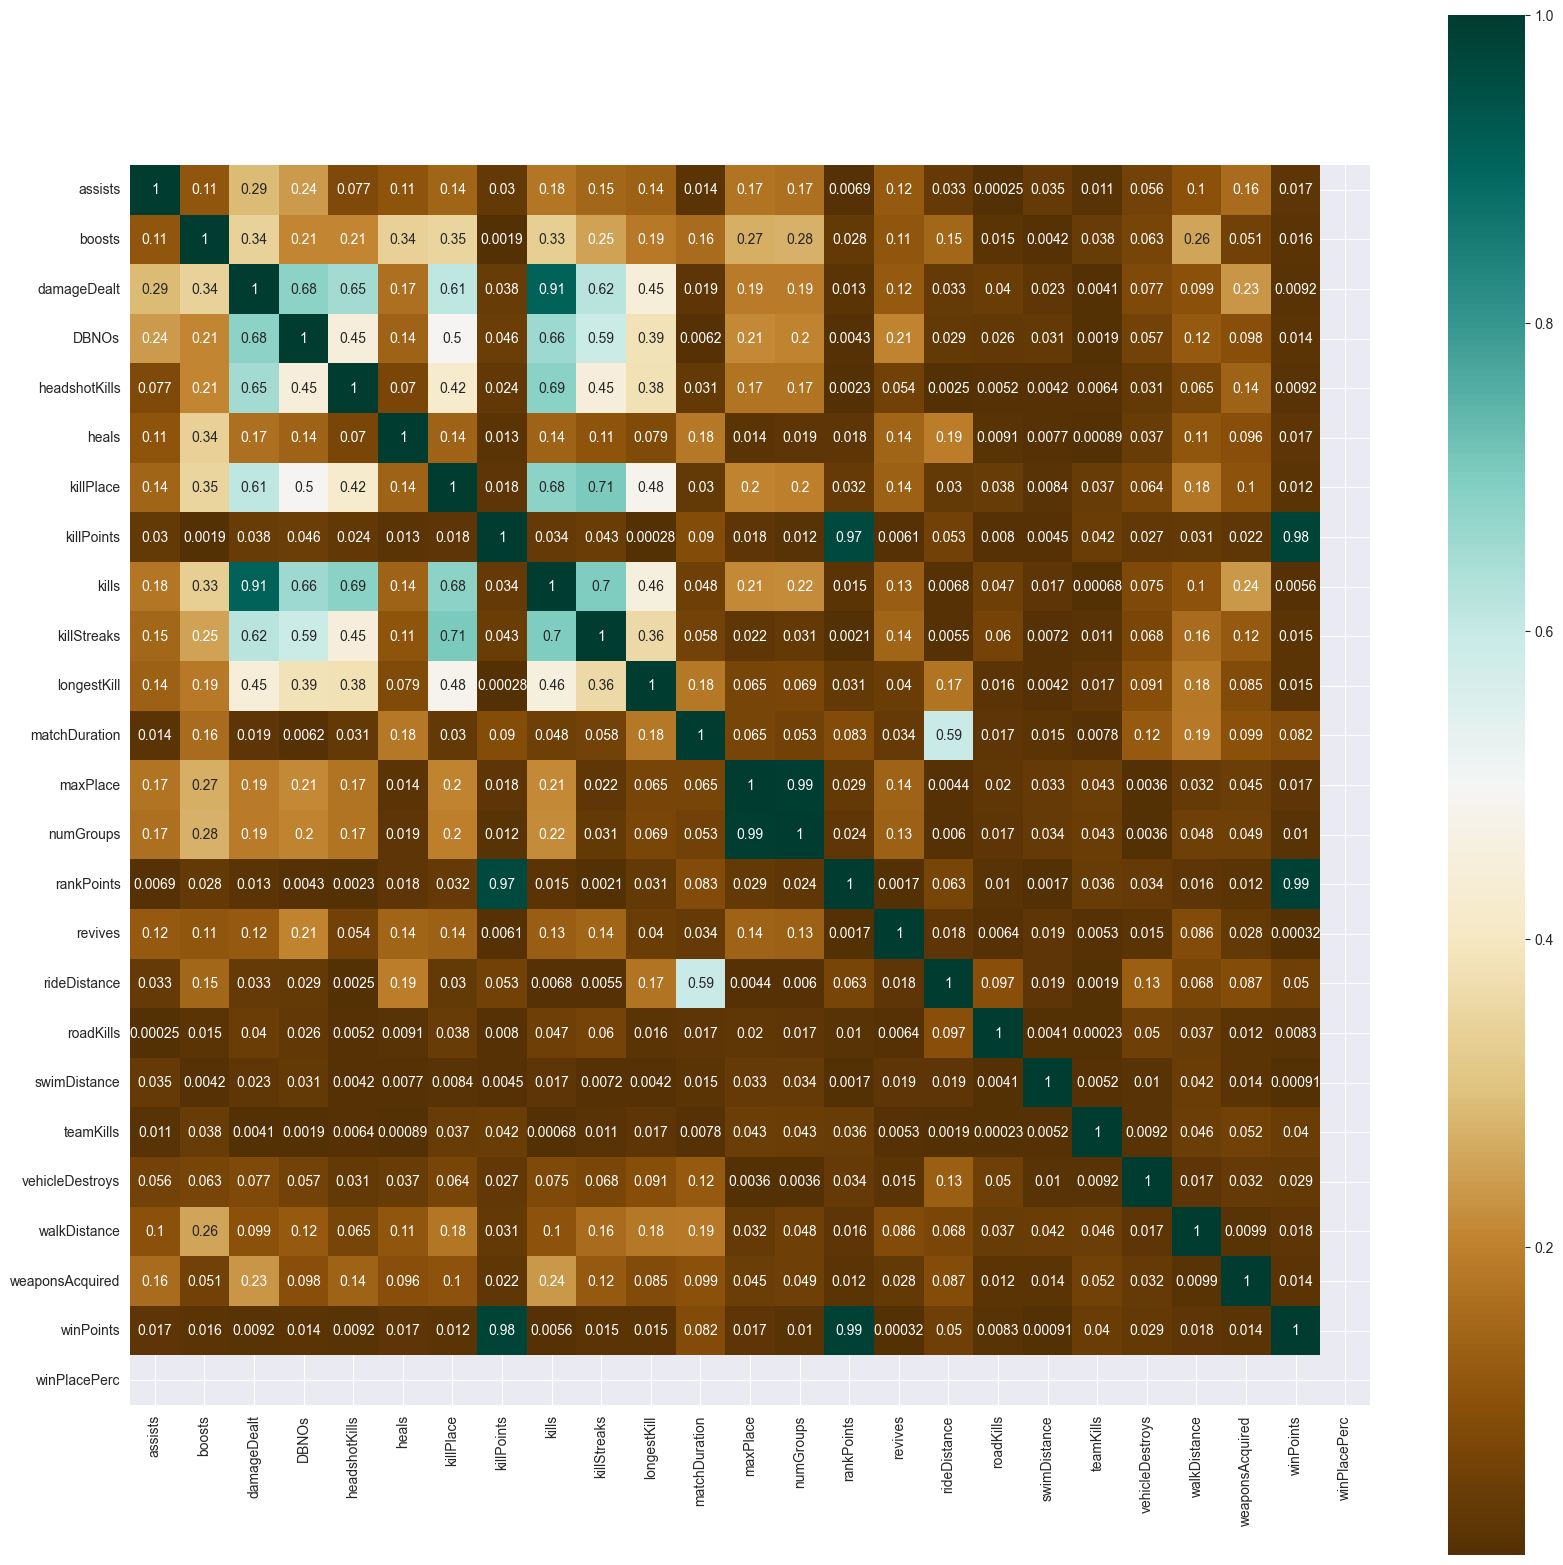

In [177]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(Winner.corr().abs(), square=True,annot=True, cmap="BrBG", ax=ax);

# Losser Player Data Visualization

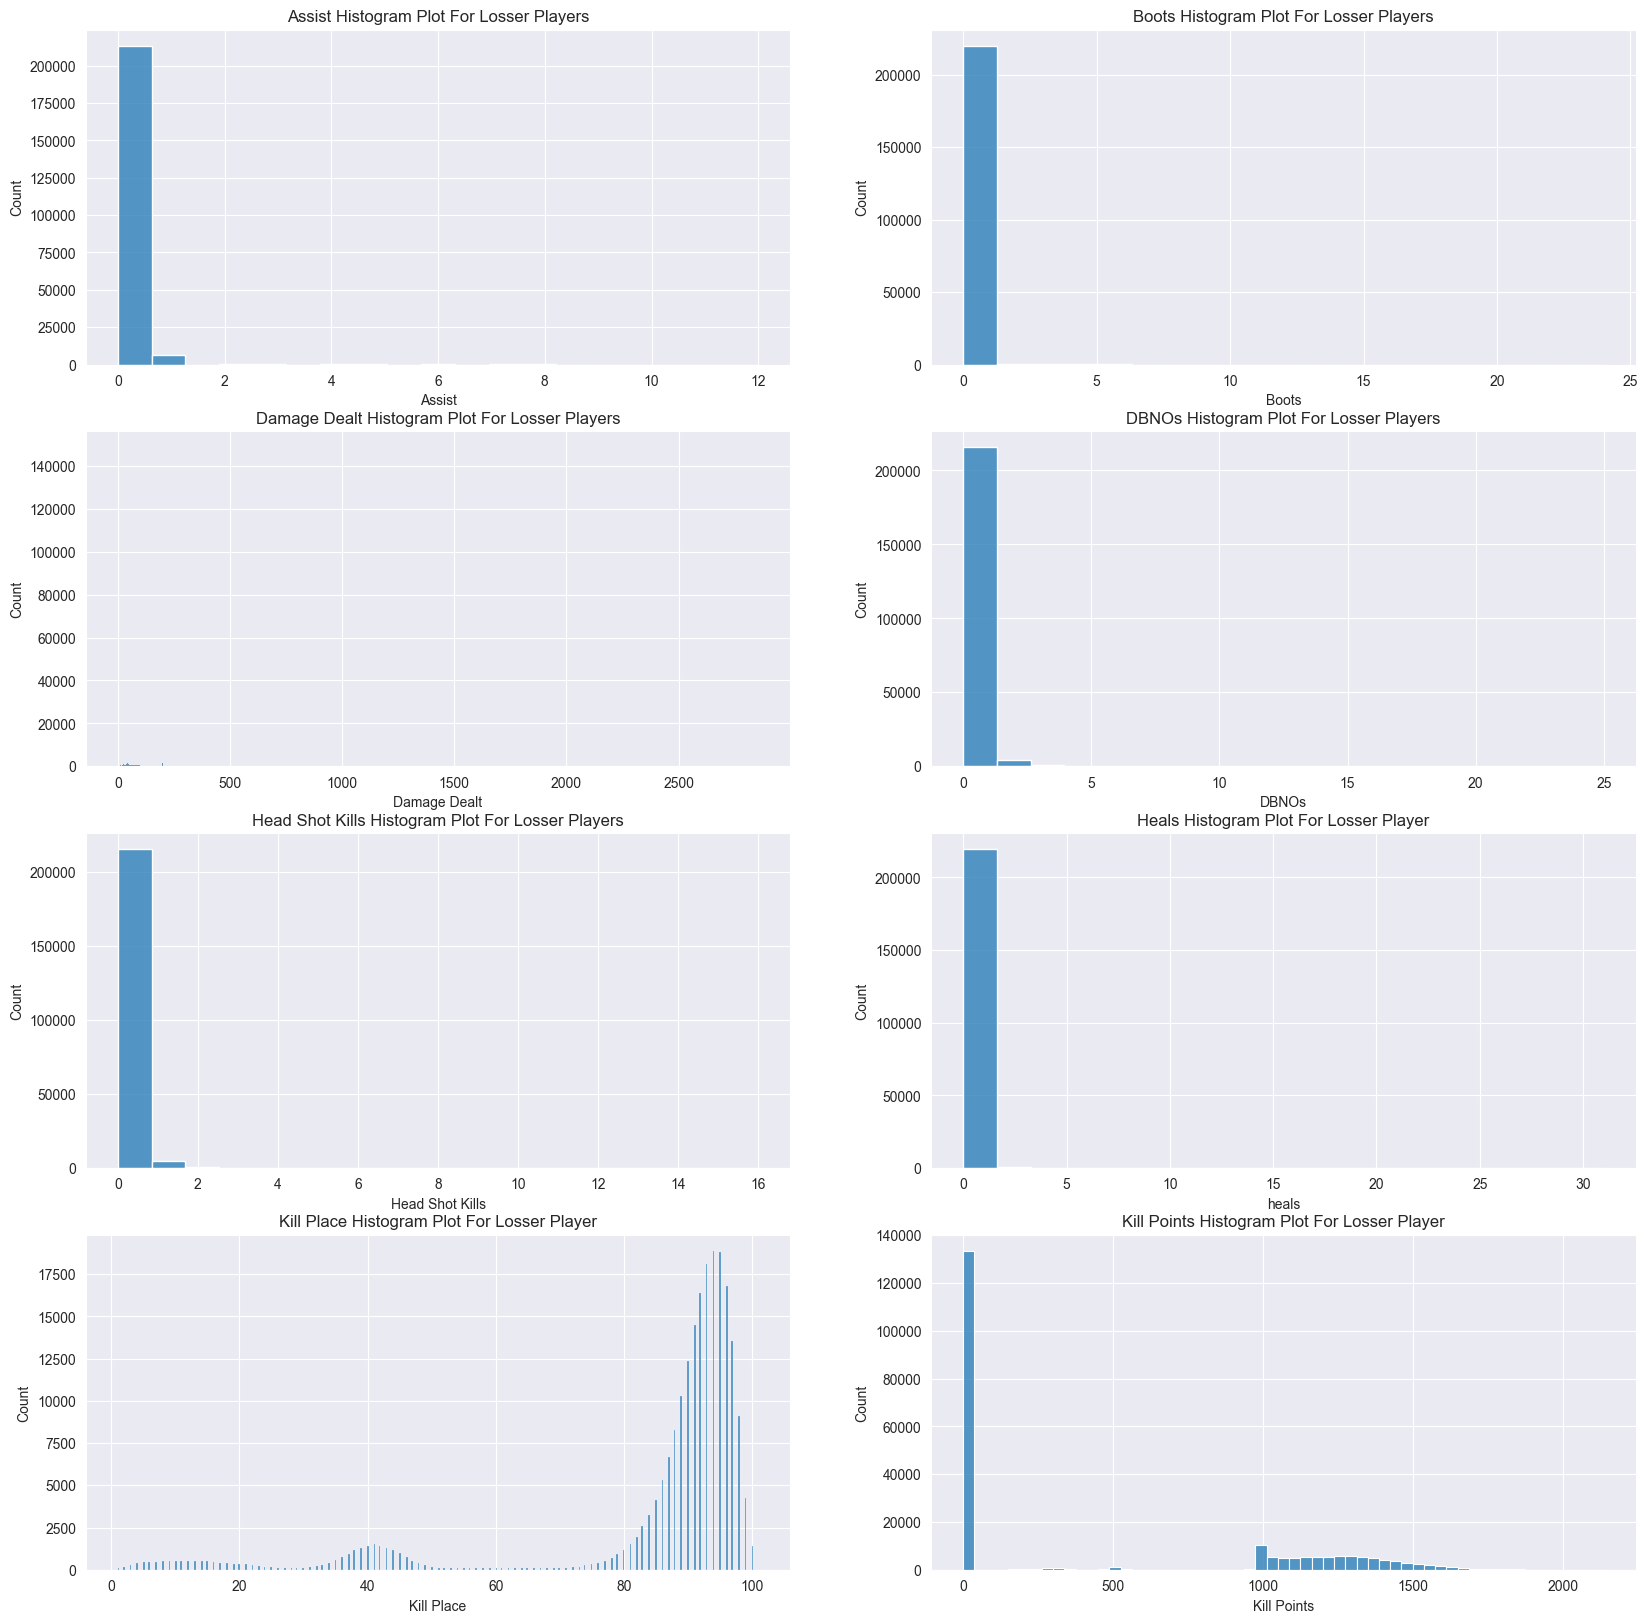

In [178]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(20,20))

sns.histplot(Losser['assists'], ax=ax1);
ax1.set(title = 'Assist Histogram Plot For Losser Players', xlabel='Assist', ylabel='Count');

sns.histplot(Losser['boosts'],ax=ax2)
ax2.set(title = 'Boots Histogram Plot For Losser Players', xlabel = 'Boots', ylabel='Count');

sns.histplot(Losser['damageDealt'],ax=ax3)
ax3.set(title = 'Damage Dealt Histogram Plot For Losser Players', xlabel='Damage Dealt', ylabel='Count');

sns.histplot(Losser['DBNOs'],ax=ax4)
ax4.set(title='DBNOs Histogram Plot For Losser Players', xlabel='DBNOs', ylabel='Count');

sns.histplot(Losser['headshotKills'],ax=ax5)
ax5.set(title='Head Shot Kills Histogram Plot For Losser Players', xlabel='Head Shot Kills', ylabel='Count');

sns.histplot(Losser['heals'],ax=ax6)
ax6.set(title='Heals Histogram Plot For Losser Player', xlabel='heals', ylabel='Count');

sns.histplot(Losser['killPlace'],ax=ax7)
ax7.set(title='Kill Place Histogram Plot For Losser Player', xlabel='Kill Place', ylabel='Count');

sns.histplot(Losser['killPoints'],ax=ax8)
ax8.set(title='Kill Points Histogram Plot For Losser Player', xlabel='Kill Points', ylabel='Count');


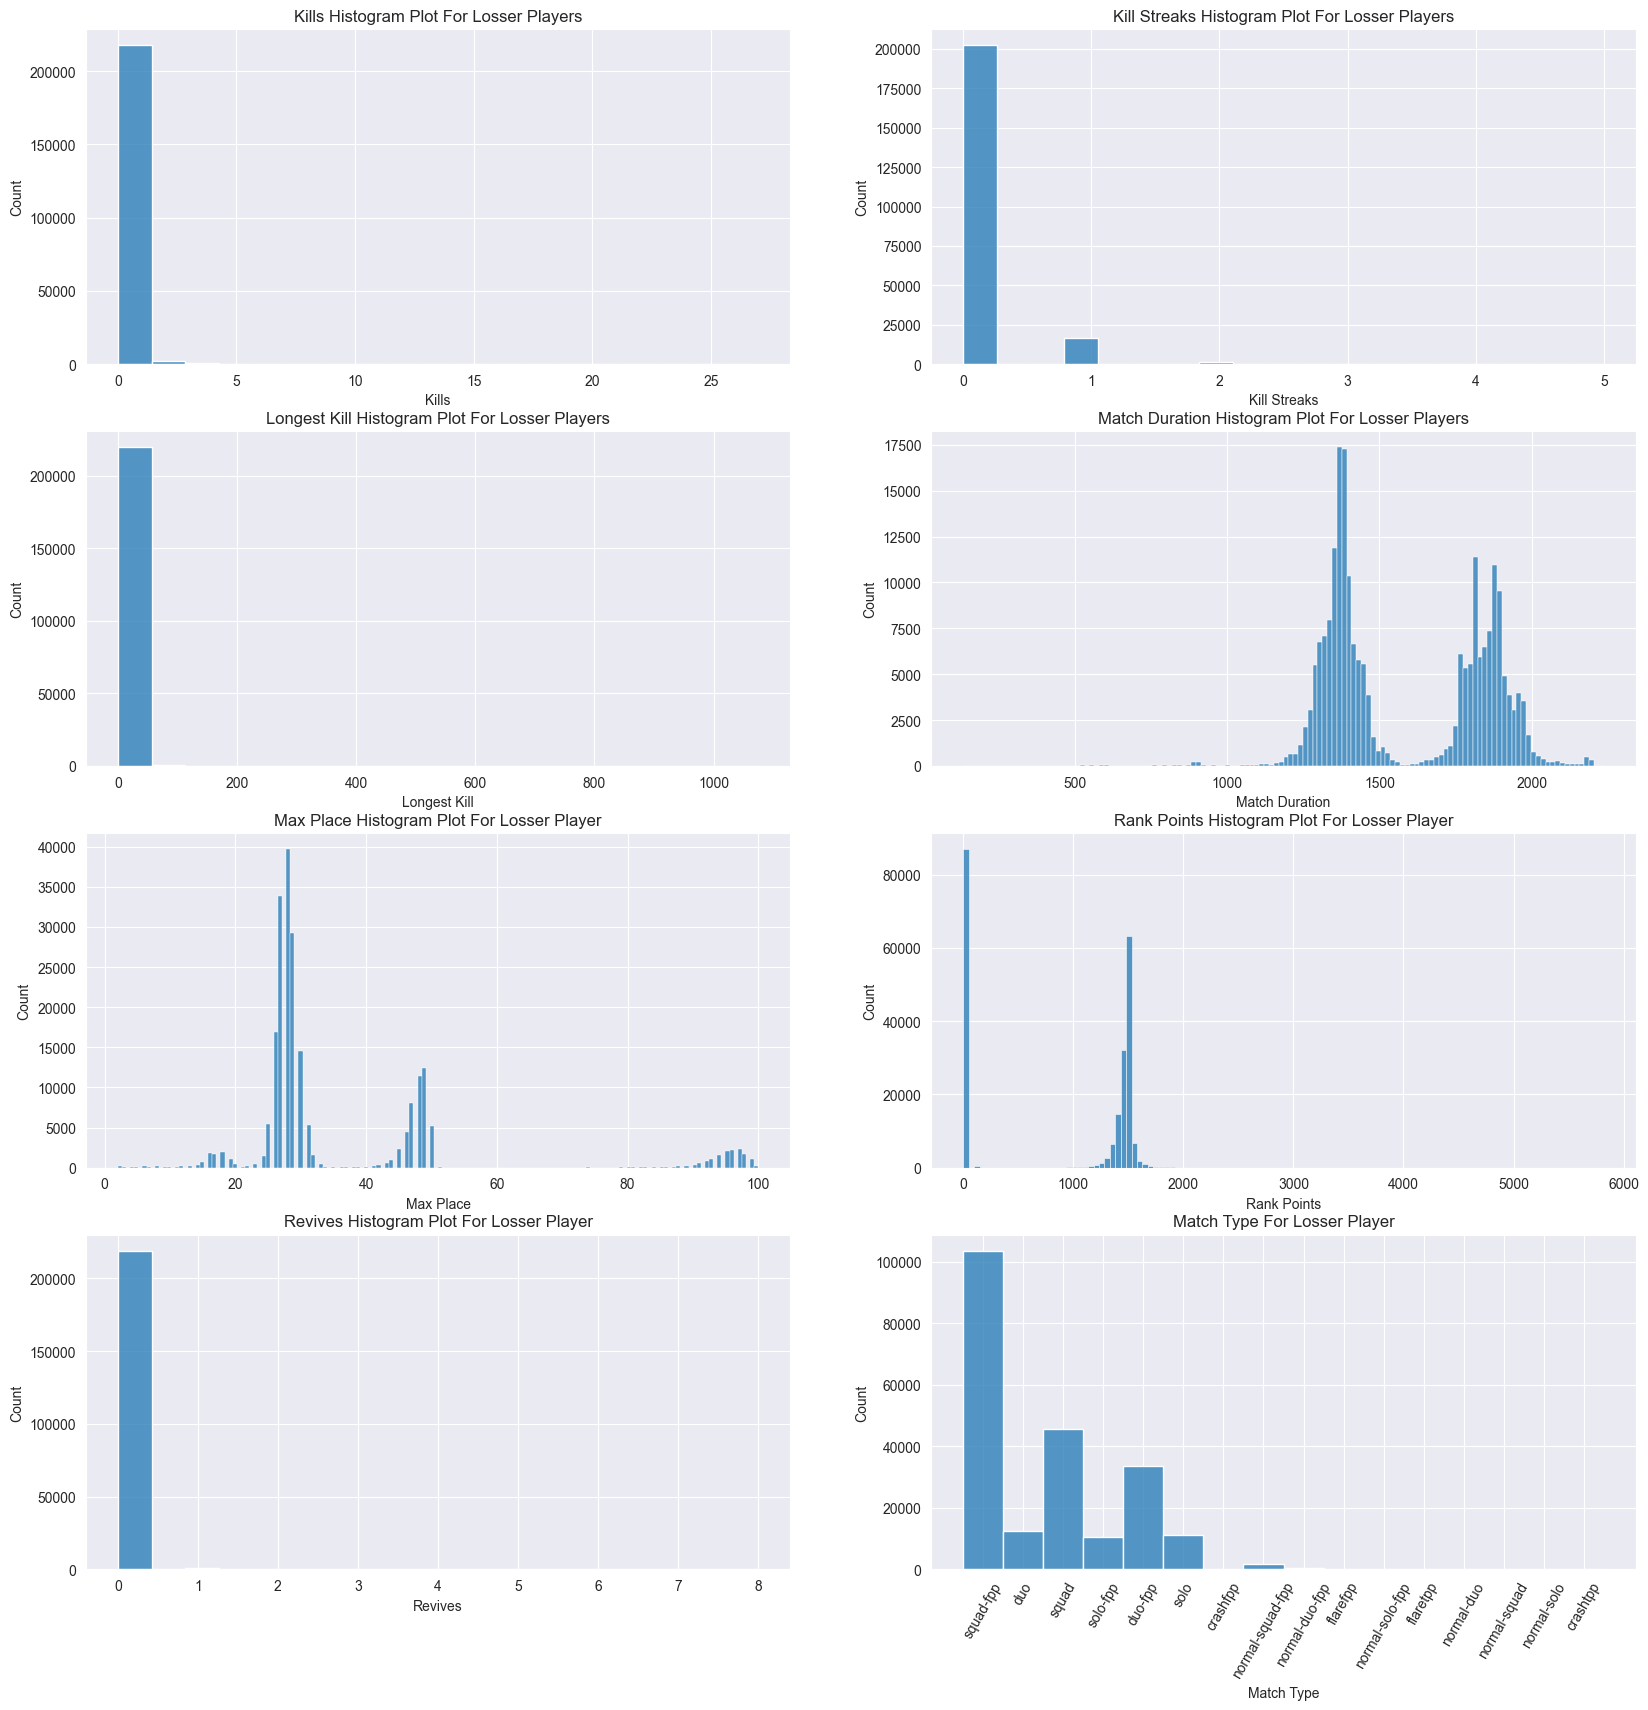

In [179]:
fig, ((ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16)) = plt.subplots(nrows=4, ncols=2, figsize=(20,20))

sns.histplot(Losser['kills'], ax=ax9,);
ax9.set(title = 'Kills Histogram Plot For Losser Players', xlabel='Kills', ylabel='Count');

sns.histplot(Losser['killStreaks'],ax=ax10)
ax10.set(title = 'Kill Streaks Histogram Plot For Losser Players', xlabel = 'Kill Streaks', ylabel='Count');

sns.histplot(Losser['longestKill'],ax=ax11)
ax11.set(title = 'Longest Kill Histogram Plot For Losser Players', xlabel='Longest Kill', ylabel='Count');

sns.histplot(Losser['matchDuration'],ax=ax12)
ax12.set(title='Match Duration Histogram Plot For Losser Players', xlabel='Match Duration', ylabel='Count');

sns.histplot(Losser['maxPlace'],ax=ax13)
ax13.set(title='Max Place Histogram Plot For Losser Player', xlabel='Max Place', ylabel='Count');

sns.histplot(Losser['rankPoints'],ax=ax14)
ax14.set(title='Rank Points Histogram Plot For Losser Player', xlabel='Rank Points', ylabel='Count');

sns.histplot(Losser['revives'],ax=ax15)
ax15.set(title='Revives Histogram Plot For Losser Player', xlabel='Revives', ylabel='Count');

sns.histplot(Losser['matchType'],ax=ax16)
ax16.set(title='Match Type For Losser Player', xlabel='Match Type', ylabel='Count');

plt.xticks(rotation=60);

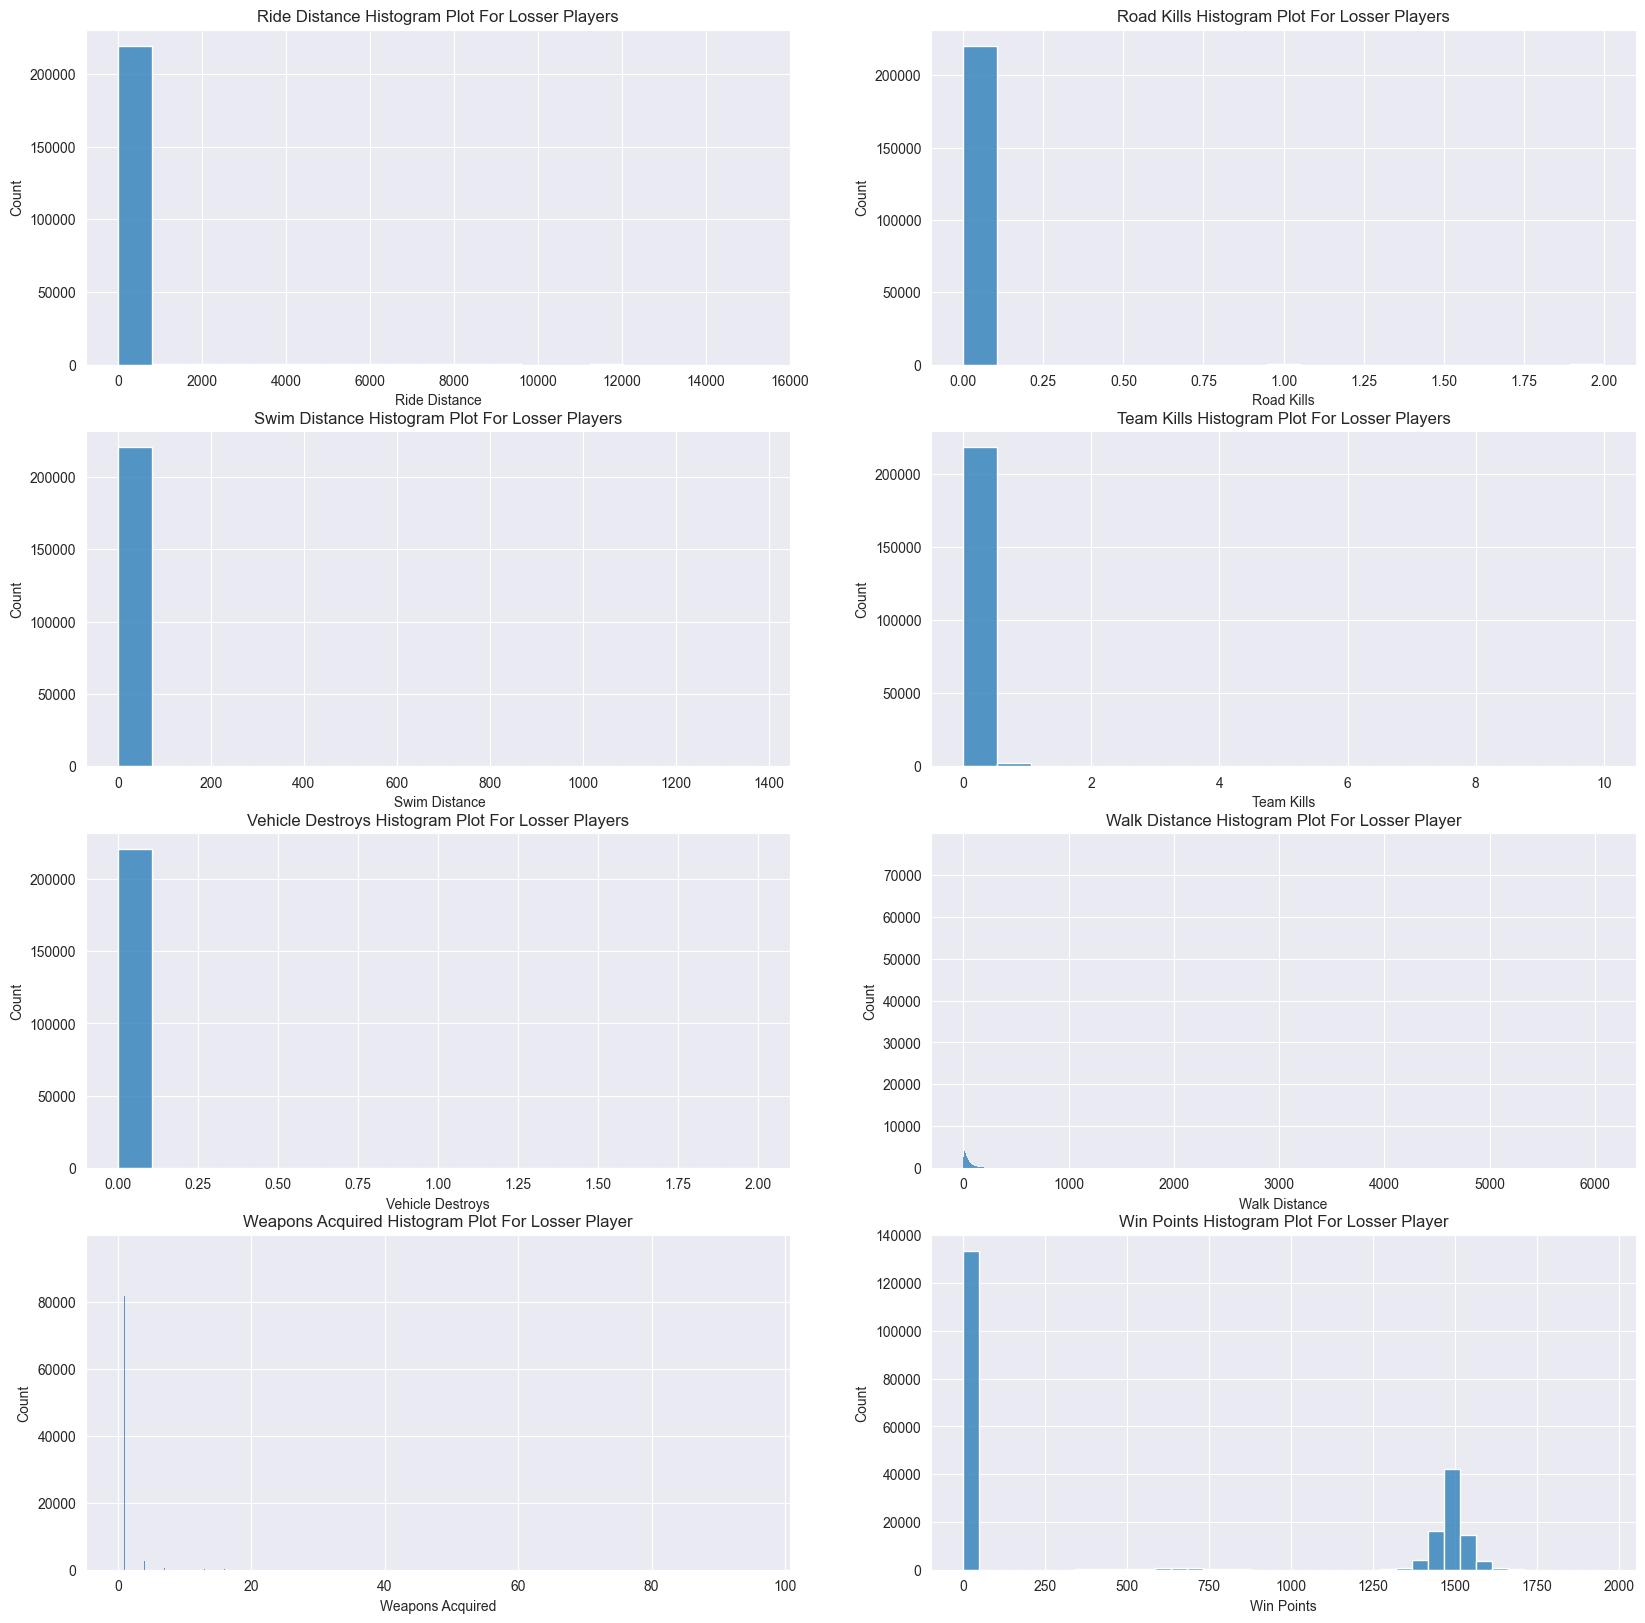

In [180]:
fig, ((ax17, ax18), (ax19, ax20), (ax21, ax22), (ax23, ax24)) = plt.subplots(nrows=4, ncols=2, figsize=(20,20))

sns.histplot(Losser['rideDistance'], ax=ax17);
ax17.set(title = 'Ride Distance Histogram Plot For Losser Players', xlabel='Ride Distance', ylabel='Count');

sns.histplot(Losser['roadKills'],ax=ax18)
ax18.set(title = 'Road Kills Histogram Plot For Losser Players', xlabel = 'Road Kills', ylabel='Count');

sns.histplot(Losser['swimDistance'],ax=ax19)
ax19.set(title = 'Swim Distance Histogram Plot For Losser Players', xlabel=' Swim Distance', ylabel='Count');

sns.histplot(Losser['teamKills'],ax=ax20)
ax20.set(title='Team Kills Histogram Plot For Losser Players', xlabel='Team Kills', ylabel='Count');

sns.histplot(Losser['vehicleDestroys'],ax=ax21)
ax21.set(title='Vehicle Destroys Histogram Plot For Losser Players', xlabel='Vehicle Destroys', ylabel='Count');

sns.histplot(Losser['walkDistance'],ax=ax22)
ax22.set(title='Walk Distance Histogram Plot For Losser Player', xlabel='Walk Distance', ylabel='Count');

sns.histplot(Losser['weaponsAcquired'],ax=ax23)
ax23.set(title='Weapons Acquired Histogram Plot For Losser Player', xlabel='Weapons Acquired', ylabel='Count');

sns.histplot(Losser['winPoints'],ax=ax24)
ax24.set(title='Win Points Histogram Plot For Losser Player', xlabel='Win Points', ylabel='Count');


# Analyzing Kills 

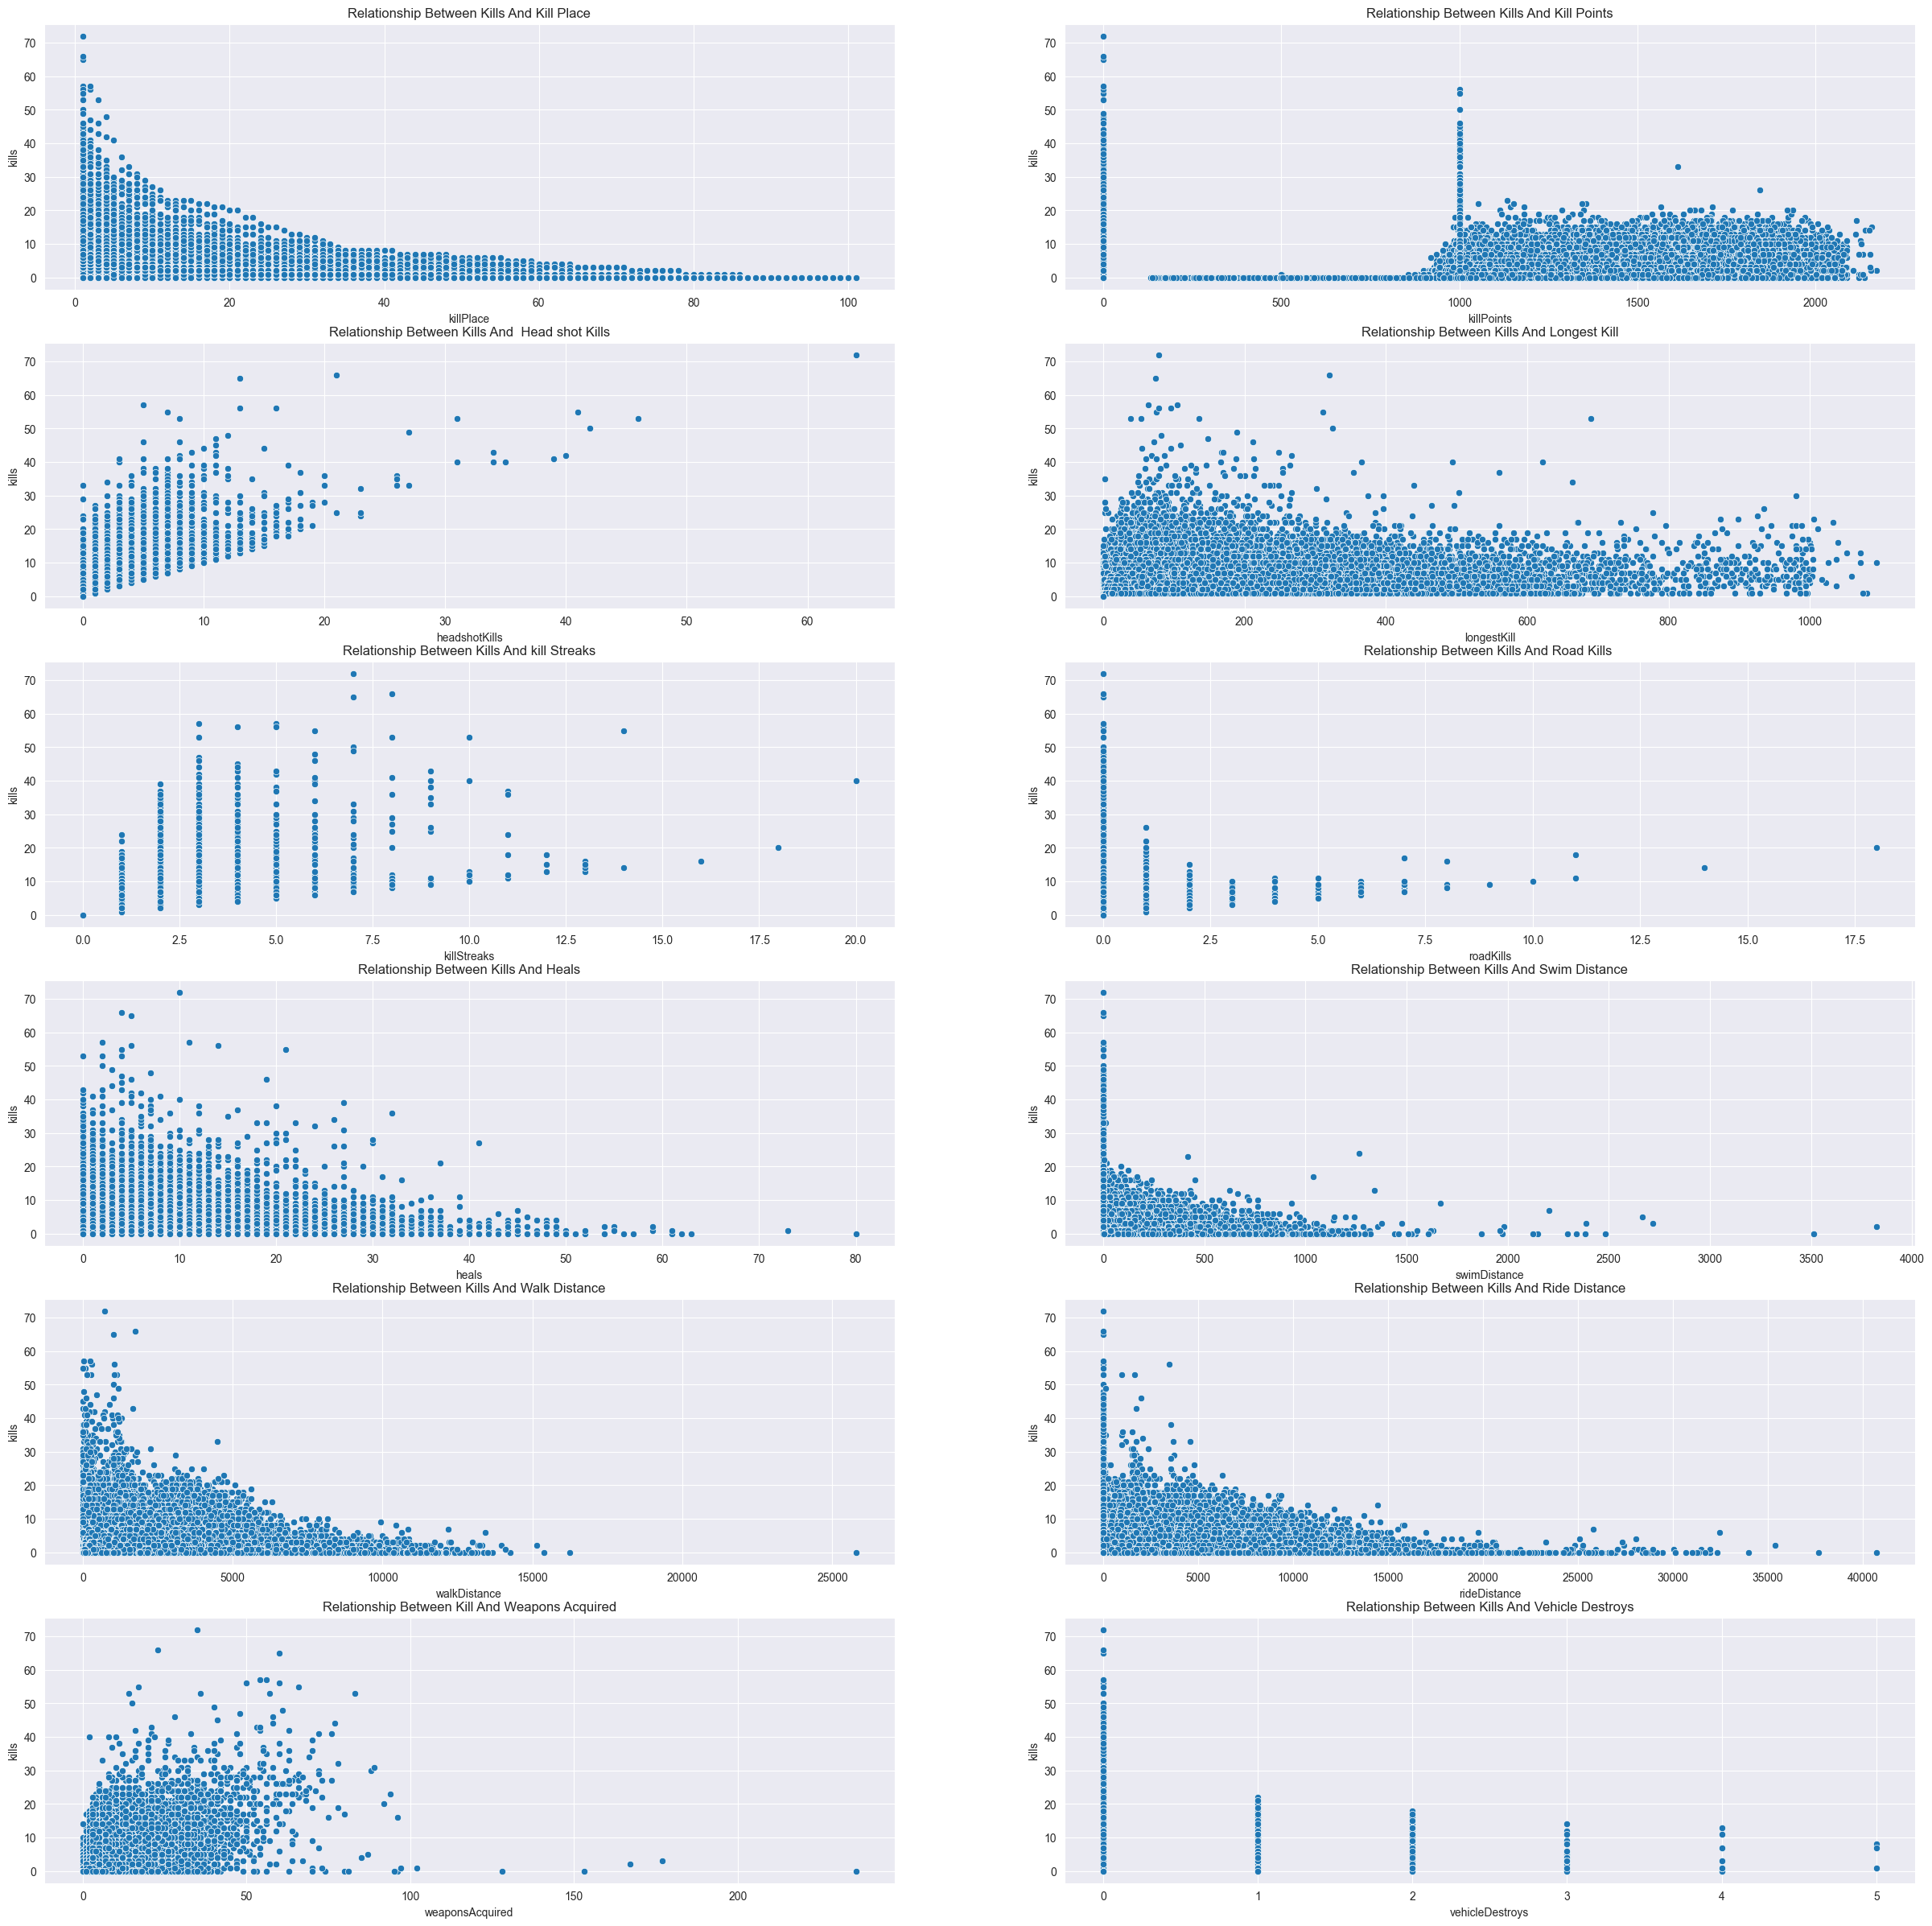

In [181]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7,ax8), (ax9,ax10), (ax11, ax12)) = plt.subplots(nrows=6, ncols=2, figsize=(30,30))

sns.scatterplot(data=TrainData, x='killPlace', y='kills', ax=ax1).set_title('Relationship Between Kills And Kill Place');

sns.scatterplot(data=TrainData, x='killPoints', y='kills', ax=ax2).set_title('Relationship Between Kills And Kill Points');

sns.scatterplot(data=TrainData, x='headshotKills', y='kills', ax=ax3).set_title('Relationship Between Kills And  Head shot Kills');

sns.scatterplot(data=TrainData, x='longestKill', y='kills', ax=ax4).set_title('Relationship Between Kills And Longest Kill');

sns.scatterplot(data=TrainData, x='killStreaks', y='kills', ax=ax5).set_title('Relationship Between Kills And kill Streaks');

sns.scatterplot(data=TrainData, x='roadKills', y='kills', ax=ax6).set_title('Relationship Between Kills And Road Kills ');

sns.scatterplot(data=TrainData, x='heals', y='kills', ax=ax7).set_title('Relationship Between Kills And Heals');

sns.scatterplot(data=TrainData, x='swimDistance', y='kills', ax=ax8).set_title('Relationship Between Kills And Swim Distance');

sns.scatterplot(data=TrainData, x='walkDistance', y='kills', ax=ax9).set_title('Relationship Between Kills And Walk Distance');

sns.scatterplot(data=TrainData, x='rideDistance', y='kills', ax=ax10).set_title('Relationship Between Kills And Ride Distance');

sns.scatterplot(data=TrainData, x='weaponsAcquired', y='kills', ax=ax11).set_title('Relationship Between Kill And Weapons Acquired');

sns.scatterplot(data=TrainData, x='vehicleDestroys', y='kills', ax=ax12).set_title('Relationship Between Kills And Vehicle Destroys');

# Drop Features

In [182]:
TrainData.drop(['Id', 'groupId', 'matchId', 'numGroups'], inplace=True, axis=1)

# Label Encoding

In [183]:
LabelEncoder = LabelEncoder()
TrainData['matchType'] = LabelEncoder.fit_transform(TrainData['matchType'] )

# Normalization

In [184]:
Norm = MinMaxScaler()
TrainData['assists'] = Norm.fit_transform(np.array(TrainData['assists']).reshape(-1,1))
TrainData['boosts'] = Norm.fit_transform(np.array(TrainData['boosts']).reshape(-1,1))
TrainData['damageDealt'] = Norm.fit_transform(np.array(TrainData['damageDealt']).reshape(-1, 1))
TrainData['DBNOs'] = Norm.fit_transform(np.array(TrainData['DBNOs']).reshape(-1, 1))
TrainData['headshotKills'] = Norm.fit_transform(np.array(TrainData['headshotKills']).reshape(-1,1))
TrainData['heals'] = Norm.fit_transform(np.array(TrainData['heals']).reshape(-1,1))
TrainData['killPlace'] = Norm.fit_transform(np.array(TrainData['killPlace']).reshape(-1,1))
TrainData['killPoints'] = Norm.fit_transform(np.array(TrainData['killPoints']).reshape(-1, 1))
TrainData['kills'] = Norm.fit_transform(np.array(TrainData['kills']).reshape(-1,1))
TrainData['killStreaks'] = Norm.fit_transform(np.array(TrainData['killStreaks']).reshape(-1,1))
TrainData['longestKill'] = Norm.fit_transform(np.array(TrainData['longestKill']).reshape(-1,1))
TrainData['matchDuration'] = Norm.fit_transform(np.array(TrainData['matchDuration']).reshape(-1, 1))
TrainData['maxPlace'] = Norm.fit_transform(np.array(TrainData['maxPlace']).reshape(-1,1))
TrainData['rankPoints'] = Norm.fit_transform(np.array(TrainData['rankPoints']).reshape(-1, 1))
TrainData['revives'] = Norm.fit_transform(np.array(TrainData['revives']).reshape(-1,1))
TrainData['rideDistance'] = Norm.fit_transform(np.array(TrainData['rideDistance']).reshape(-1,1))
TrainData['roadKills'] = Norm.fit_transform(np.array(TrainData['roadKills']).reshape(-1,1))
TrainData['swimDistance'] = Norm.fit_transform(np.array(TrainData['swimDistance']).reshape(-1,1))
TrainData['teamKills'] = Norm.fit_transform(np.array(TrainData['teamKills']).reshape(-1,1))
TrainData['vehicleDestroys'] = Norm.fit_transform(np.array(TrainData['vehicleDestroys']).reshape(-1,1))
TrainData['walkDistance'] = Norm.fit_transform(np.array(TrainData['walkDistance']).reshape(-1, 1))
TrainData['weaponsAcquired'] = Norm.fit_transform(np.array(TrainData['weaponsAcquired']).reshape(-1,1))
TrainData['winPoints'] = Norm.fit_transform(np.array(TrainData['winPoints']).reshape(-1,1))
TrainData['matchType'] = Norm.fit_transform(np.array(TrainData['matchType']).reshape(-1,1))

# Detect Outliers


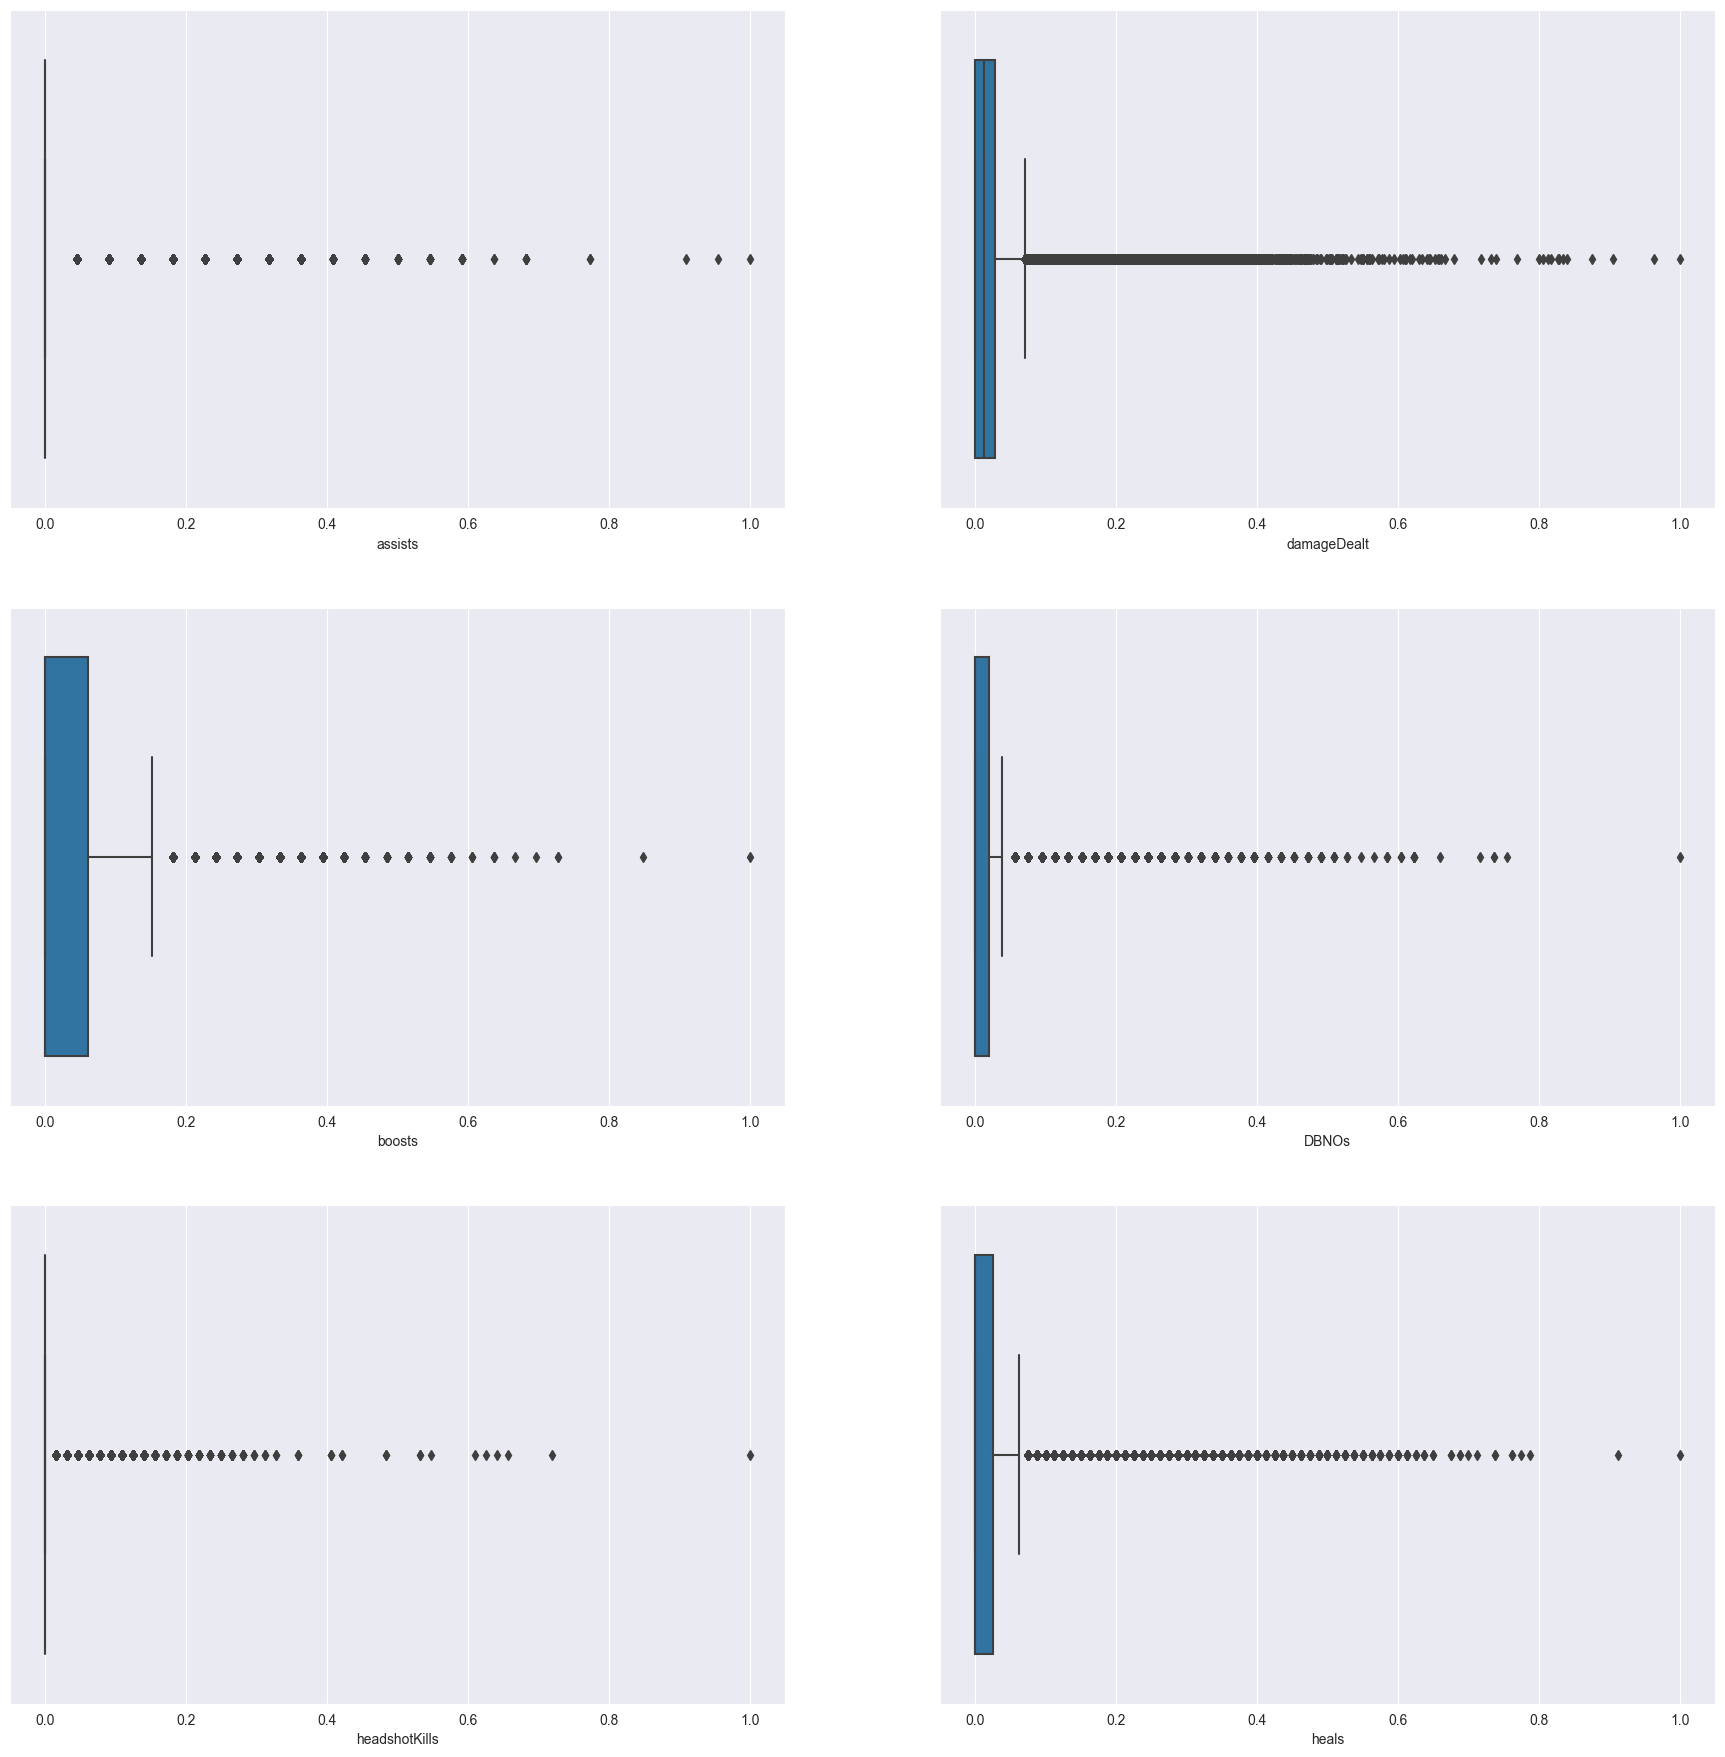

In [185]:
fig,((ax1, ax2), (ax3, ax4), (ax5, ax6))= plt.subplots(ncols=2, nrows=3, figsize=(22,22))

sns.boxplot(data=TrainData, x='assists', ax=ax1);

sns.boxplot(data=TrainData, x= 'damageDealt', ax=ax2);

sns.boxplot(data= TrainData, x= 'boosts', ax=ax3);

sns.boxplot(data=TrainData, x='DBNOs', ax=ax4);

sns.boxplot(data=TrainData, x='headshotKills', ax=ax5);

sns.boxplot(data= TrainData, x='heals', ax=ax6);




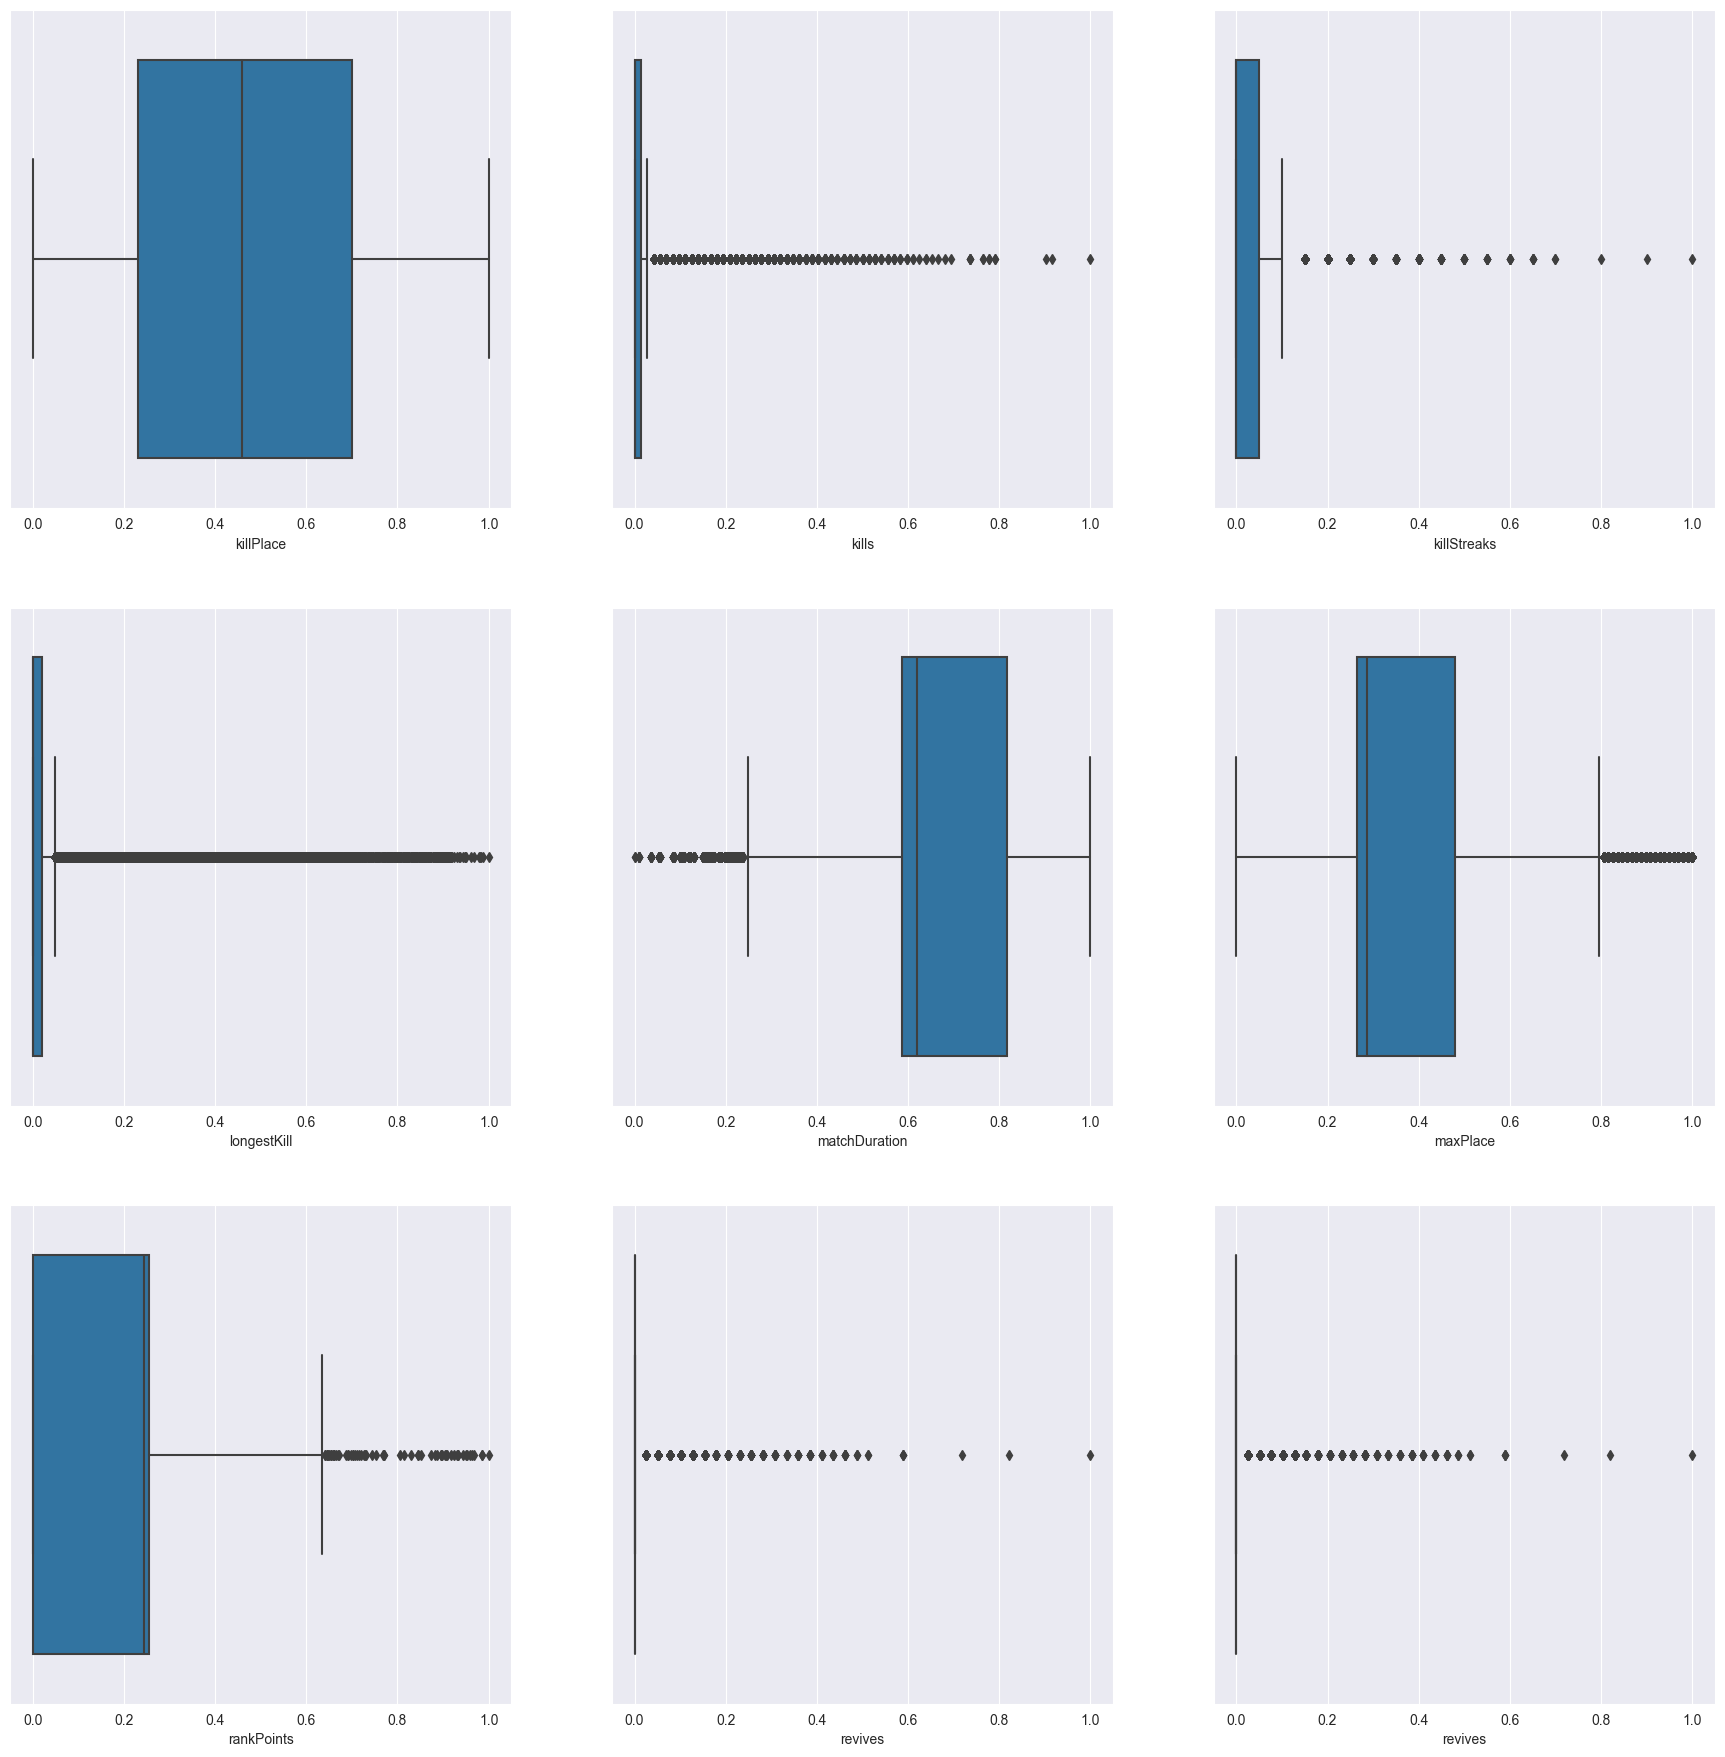

In [186]:
fig,((ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15))= plt.subplots(ncols=3, nrows=3, figsize=(22, 22))

sns.boxplot(data=TrainData, x='killPlace', ax=ax7);

sns.boxplot(data=TrainData, x='kills', ax=ax8);

sns.boxplot(data=TrainData, x='killStreaks', ax=ax9);

sns.boxplot(data=TrainData, x = 'longestKill', ax=ax10);

sns.boxplot(data=TrainData, x='matchDuration', ax=ax11);

sns.boxplot(data=TrainData, x = 'maxPlace', ax=ax12);

sns.boxplot(data=TrainData, x= 'rankPoints', ax=ax13);

sns.boxplot(data=TrainData, x='revives', ax=ax14);

sns.boxplot(data=TrainData, x= 'revives', ax=ax15);

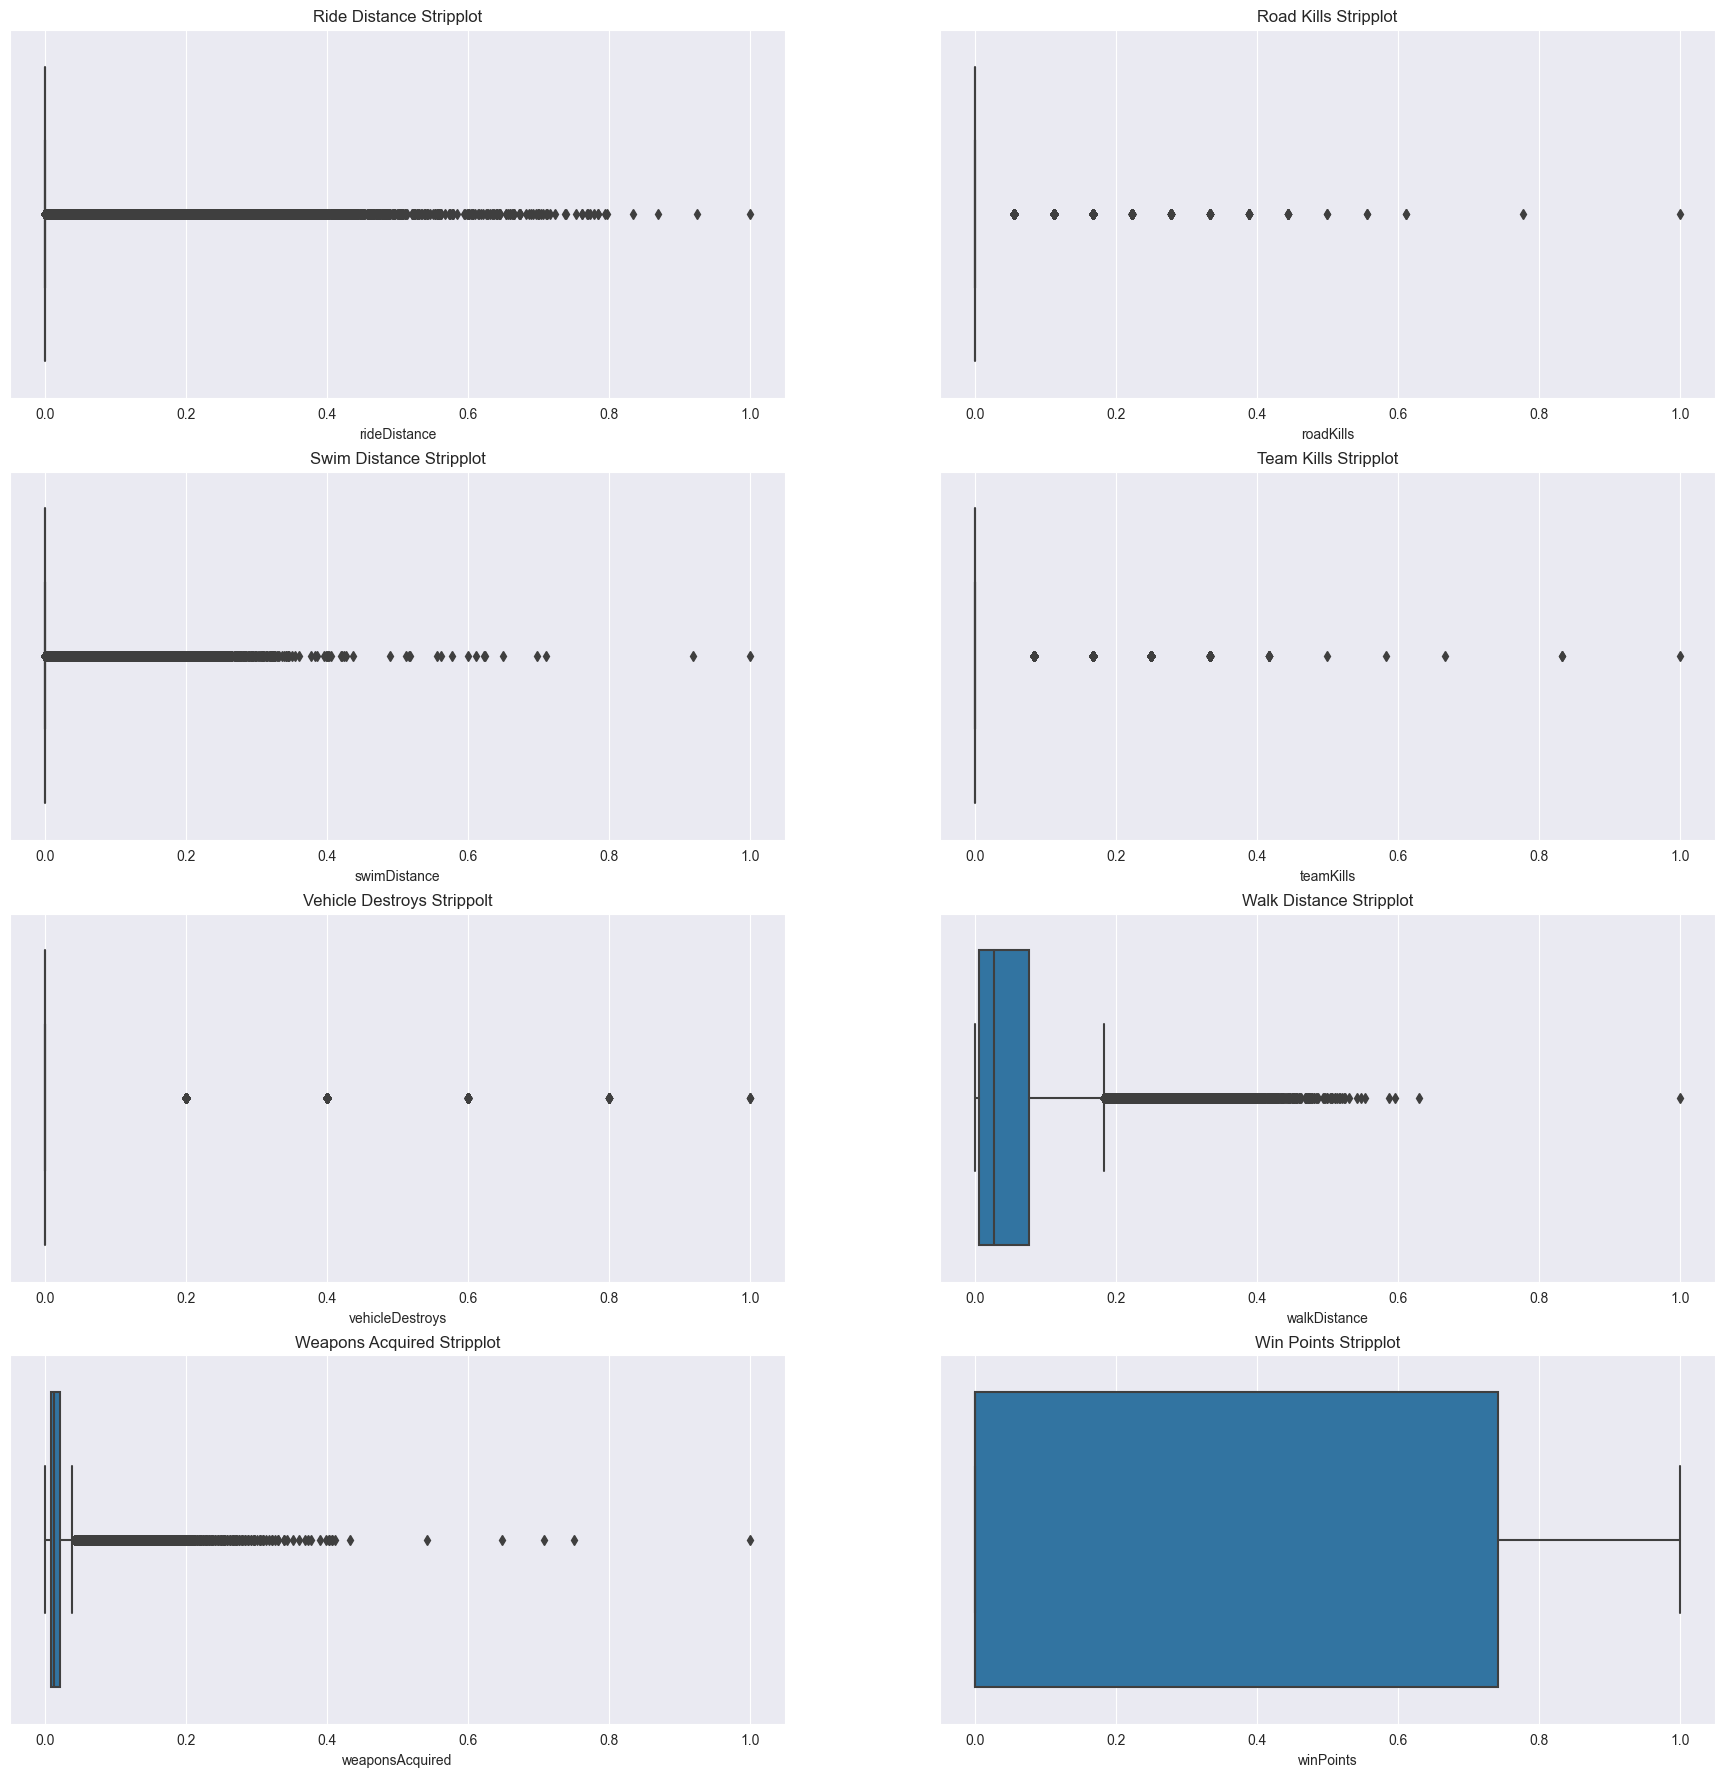

In [187]:
fig,((ax16, ax17), (ax18, ax19), (ax20, ax21),(ax22, ax23))= plt.subplots(ncols=2, nrows=4, figsize=(22,22))

sns.boxplot(data=TrainData, x='rideDistance', ax=ax16).set_title("Ride Distance Stripplot");

sns.boxplot(data=TrainData, x= 'roadKills', ax=ax17).set_title("Road Kills Stripplot");

sns.boxplot(data= TrainData, x= 'swimDistance', ax=ax18).set_title('Swim Distance Stripplot');

sns.boxplot(data=TrainData, x='teamKills', ax=ax19).set_title('Team Kills Stripplot');

sns.boxplot(data=TrainData, x='vehicleDestroys', ax=ax20).set_title('Vehicle Destroys Strippolt');

sns.boxplot(data= TrainData, x='walkDistance', ax=ax21).set_title('Walk Distance Stripplot');

sns.boxplot(data=TrainData, x='weaponsAcquired', ax=ax22).set_title('Weapons Acquired Stripplot');

sns.boxplot(data=TrainData, x='winPoints', ax=ax23).set_title('Win Points Stripplot');

# Split The Data Into X And y

In [188]:
X = TrainData.drop(['winPlacePerc'], inplace=False, axis=1)
y = TrainData['winPlacePerc']

# Models

**A. Decision Tree**

In [189]:
kf = KFold(n_splits=3)
meanabsoluteerrorDT = []
meansquarederrorDT = []


for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    DTParam = {
                    'max_depth':[ 5, 6, 7, 8, 9, 10],     
              }
 
    DTGrid = GridSearchCV(estimator=DecisionTreeRegressor(random_state = 0, criterion='squared_error'), 
                                param_grid=DTParam,
                                cv=2,
                                refit = True,
                                verbose = -1,
                                return_train_score = True,
                                )

    # Fit The Decision Tree
    DTGrid.fit(X_train, y_train)
    y_pred = DTGrid.predict(X_test)

    meanabsoluteerrorDT.append(mean_absolute_error(y_test, y_pred))
    maeDT = pd.DataFrame(meanabsoluteerrorDT, columns=['Mean Absulote Error'])


    meansquarederrorDT.append(mean_squared_error(y_test, y_pred))
    mseDT = pd.DataFrame(meansquarederrorDT, columns=['r'])


print(" ")
print("The Best Decision Tree Parameters Are:", DTGrid.best_params_)
print(" ")
print("Decision Tree Mean Absolute Error:", np.mean(maeDT))
print('')
print('Decision Tree Mean Squred Error:', np.mean(mseDT))

 
The Best Decision Tree Parameters Are: {'max_depth': 10}
 
Decision Tree Mean Absolute Error: Mean Absulote Error    0.069507
dtype: float64

Decision Tree Mean Squred Error: r    0.009629
dtype: float64


**C. Linear Regression**

In [190]:
kf = KFold(n_splits=3)
meanabsoluteerrorLR = []
meansquarederrorLR = []

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lr =LinearRegression()

    # Fit The Decision Tree
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    meanabsoluteerrorLR.append(mean_absolute_error(y_test, y_pred))
    maeLR = pd.DataFrame(meanabsoluteerrorLR, columns=['Mean Absulote Error'])


    meansquarederrorLR.append(mean_squared_error(y_test, y_pred))
    mseLR = pd.DataFrame(meansquarederrorLR, columns=['Mean Squred Error'])

print(" ")
print('Linear Regression Mean Absolutle Error Is', maeLR.mean())
print(" ")
print('Linear Regression Mean Squrad Error Is', mseLR.mean())

 
Linear Regression Mean Absolutle Error Is Mean Absulote Error    0.092417
dtype: float64
 
Linear Regression Mean Squrad Error Is Mean Squred Error    0.0161
dtype: float64


**C. Random forest**

In [191]:
kf = KFold(n_splits=3)
meanabsoluteerrorRF = []
meansquarederrorRF = []

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    RFDTParam = {
                    
                    'max_depth':[ 5, 6, 7, 8, 9, 10],     
              }
 
    RFGrid = GridSearchCV(estimator=RandomForestRegressor(random_state = 0, n_estimators=10, criterion='squared_error'), 
                                param_grid=RFDTParam,
                                cv=2,
                                refit = True,
                                verbose = -1,
                                return_train_score = True,
                                )

    
    RFGrid.fit(X_train, y_train)
    y_pred = RFGrid.predict(X_test)

    meanabsoluteerrorRF.append(mean_absolute_error(y_test, y_pred))
    maeRF = pd.DataFrame(meanabsoluteerrorRF, columns=['Mean Absulote Error'])

    meansquarederrorRF.append(mean_squared_error(y_test, y_pred))
    mseRF = pd.DataFrame(meansquarederrorRF, columns=['Mean Squred Error'])


print(" ")
print("The Best Random Forest Parameters Are:", DTGrid.best_params_)
print(" ")
print('Random Forest Mean Absolutle Error Is', maeRF.mean())
print(" ")
print('Random Forest Mean Squred Erroe Error Is', mseRF.mean())


 
The Best Random Forest Parameters Are: {'max_depth': 10}
 
Random Forest Mean Absolutle Error Is Mean Absulote Error    0.068138
dtype: float64
 
Random Forest Mean Squred Erroe Error Is Mean Squred Error    0.009233
dtype: float64
